**sửa địa chỉ nguyễn sơn long biên**

homedy

**Số dân:	Diện tích	Mật độ dân số:	Số BĐS đang bán**

sns plt

histogram, bar

du lieu ngoai thanh

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import codecs, re, json ,math, unicodedata
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Lưu trữ và xử lý dữ liệu lớn/data/nga

Mounted at /content/drive
/content/drive/My Drive/Lưu trữ và xử lý dữ liệu lớn/data/nga


In [ ]:
# %cd /content/drive/My Drive/Lưu trữ và xử lý dữ liệu lớn/data/nga
!ls

abz.vn.csv	 alonhadat.com.vn.csv	chotot.csv
alonhadat11.csv  batdongsan.com.vn.csv	chototDSProject.csv
alonhadat1.csv	 chotot2.csv		nga_LTVXLDLL.ipynb


## Clean

In [ ]:
address1 = json.load(open("../../address.txt","r", encoding="utf8"))
address = dict()
for district in address1.keys():
    address[unicodedata.normalize("NFD",district)]=dict()
    for key in address1[district].keys():
        address[unicodedata.normalize("NFD",district)][unicodedata.normalize("NFD",key)]=[unicodedata.normalize("NFD",item) for item in address1[district][key]]


In [ ]:
address.keys()

dict_keys(['ba đình', 'cầu giấy', 'đống đa', 'hà đông', 'hai bà trưng', 'hoàn kiếm', 'hoàng mai', 'long biên', 'tây hồ', 'thanh xuân', 'sơn tây', 'ba vì', 'chương mỹ', 'đan phượng', 'đông anh', 'gia lâm', 'hoài đức', 'mê linh', 'mỹ đức', 'phú xuyên', 'phúc thọ', 'quốc oai', 'sóc sơn', 'thạch thất', 'thanh oai', 'thanh trì', 'thường tín', 'nam từ liêm', 'ứng hòa', 'bắc từ liêm'])

In [ ]:
address['thanh oai']['ward'].append(unicodedata.normalize("NFD","thụy khuê"))
address['hoàn kiếm']['street'].append(unicodedata.normalize("NFD","láng"))
address['đống đa']['street'].append(unicodedata.normalize("NFD","nguyễn huy tưởng"))
address['hà đông']['ward'].append(unicodedata.normalize("NFD","mỗ lao"))
address['hai bà trưng']['ward'].append(unicodedata.normalize("NFD","vân hồ 3"))


In [ ]:
for district in address.keys():
    district = unicodedata.normalize("NFD",district)
    for key in address[district].keys():
        key = unicodedata.normalize("NFD",key)
        address[district][key] = {unicodedata.normalize("NFD",value) for value in address[district][key]}

In [ ]:
address['long biên']['street']

In [ ]:
address_data = dict()

### Abz.vn

In [ ]:
abz = pd.read_csv("abz.vn.csv", encoding="utf-8")
abz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30819 entries, 0 to 30818
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      30819 non-null  int64  
 1   title           30775 non-null  object 
 2   Giá :           26826 non-null  object 
 3   Diện tích :     27862 non-null  object 
 4   Ngày đăng :     30819 non-null  object 
 5   Lượt xem :      30819 non-null  int64  
 6   Mã tin :        30819 non-null  int64  
 7   Khu vực :       30819 non-null  object 
 8   description     30819 non-null  object 
 9   Tên liên hệ:    30232 non-null  object 
 10  Điện thoại 01:  30521 non-null  object 
 11  Điện thoại 02:  9711 non-null   object 
 12  Email:          30537 non-null  object 
 13  Số phòng ngủ :  15709 non-null  float64
 14  Tầng :          17423 non-null  float64
 15  Số toilet :     13248 non-null  float64
dtypes: float64(3), int64(3), object(10)
memory usage: 3.8+ MB


In [ ]:
abz.drop(['Unnamed: 0','Lượt xem :','Mã tin :','Điện thoại 02:','Điện thoại 01:','Email:','Tên liên hệ:'], axis=1, inplace=True)

In [ ]:
abz.head(2)

,title,Giá :,Diện tích :,Ngày đăng :,Khu vực :,description,Số phòng ngủ :,Tầng :,Số toilet :
0,"Cần bán gấp 38m2 đất thổ cư tại Đông La, giá s...",589 triệu,38 m2,21/10/2019,Bán đất tại Huyện Hoài Đức Hà Nội,"['Cần bán đất thổ cư tại xóm 3, Đồng Nhân, Đôn...",NaN,NaN,NaN
1,Nhà Ngõ Hòa Bình/ Minh Khai - 1.85 tỷ - 30m2 –...,1.85 tỷ,30 m2,02/09/2020,Bán nhà riêng tại Quận Hai Bà Trưng Hà Nội,"['Nhà rất đẹp, ở luôn - giá hợp lý 1.85 Tỷ.', ...",2.0,4.0,NaN


In [ ]:
abz['Ngày đăng :'][8000]

'02/06/2020'

In [ ]:
abz['Ngày đăng :'] = pd.to_datetime(abz['Ngày đăng :'], infer_datetime_format=True)

#### Title

In [ ]:
abz.loc[abz['title'].isnull()]

,title,Giá :,Diện tích :,Ngày đăng :,Khu vực :,description,Số phòng ngủ :,Tầng :,Số toilet :
933,NaN,NaN,5890 m2,2020-08-04,Bán đất tại Huyện Quốc Oai Hà Nội,"['Nóng hơn bao giờ hết mùa covid! Chỉ gần1,x t...",NaN,NaN,NaN
2203,NaN,6.20 tỷ,50 m2,2020-05-29,Bán nhà riêng tại Quận Ba Đình Hà Nội,"['❤️ Bán nhà 5 tầng ngõ 477 KIM MÃ , 20 NGUYỄN...",NaN,5.0,NaN
2515,NaN,12 tỷ,90 m2,2020-05-27,Bán nhà riêng tại MIPEC Towers,"['⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐', 'Đ/c ...",NaN,3.0,NaN
2516,NaN,6.50 tỷ,36 m2,2020-06-04,Bán nhà riêng tại Quận Đống Đa Hà Nội,"['❤️ Bán nhà 5 tầng ngõ 178 TÂY SƠN , Quận ĐỐN...",NaN,NaN,NaN
2936,NaN,2.00 tỷ,69 m2,2017-12-15,Tất cả các loại nhà bán tại Mỹ Đình Plaza 2,"['Đ/c: Số 2 Nguyễn Hoàng, phường Mỹ Đình 2, qu...",2.0,16.0,2.0
3218,NaN,810 triệu,30 m2,2020-06-03,Bán đất tại Quận Long Biên Hà Nội,['* Cần bán đất chia lô tại tổ 5 phường Phúc L...,NaN,NaN,NaN
3510,NaN,5.30 tỷ,40 m2,2020-05-21,Bán nhà riêng tại Quận Đống Đa Hà Nội,"['❤️ Bán nhà 4 tầng ngõ 203 Chùa Bộc , Quận Đố...",4.0,4.0,4.0
4717,NaN,3.10 tỷ,35 m2,2020-07-05,Bán nhà riêng tại Quận Nam Từ Liêm Hà Nội,[],NaN,5.0,NaN
8000,NaN,2.30 tỷ,65 m2,2020-06-02,Bán nhà riêng tại Quận Long Biên Hà Nội,"['Bán nhà 3 tầng tại Thượng Thanh, Long Biên, ...",3.0,3.0,3.0
8102,NaN,3.90 tỷ,35 m2,2020-05-24,Bán nhà riêng tại Quận Cầu Giấy Hà Nội,[],5.0,5.0,NaN


In [ ]:
abz.loc[abz['Giá :'].isnull()]

,title,Giá :,Diện tích :,Ngày đăng :,Khu vực :,description,Số phòng ngủ :,Tầng :,Số toilet :
7,"Sở hữu ngay nhà và đất chỉ với 2,8 tỷ - tặng n...",NaN,NaN,2018-06-02,"Bán nhà biệt thự, liền kề tại Huyện Hoài Đức H...",['- Chủ đầu tư: Công ty cổ phần đầu tư và phát...,NaN,NaN,NaN
17,Bán căn góc 3PN chung cư Viễn Đông Star chỉ h...,NaN,90 m2,2020-06-01,Bán loại bất động sản khác tại Eco Green Tower,"['Diện tích 90.6m2 gồm 3 phòng ngủ, 1 phòng kh...",3.0,11.0,2.0
19,"Bán đất mặt phố Phan Kế Bính, Ba Đình, 90m2, g...",NaN,90 m2,2018-03-14,Bán đất nền dự án tại Quận Ba Đình Hà Nội,"['Bán đất mặt phố Phan Kế Bính, Ba Đình, 90m2,...",NaN,NaN,NaN
45,Bán căn biệt thự mặt hồ Tây vị trí đắc địa bậc...,NaN,NaN,2017-12-18,"Bán nhà biệt thự, liền kề tại Quận Tây Hồ Hà Nội",['Bán căn biệt thự mặt hồ Tây vị trí đắc địa b...,NaN,NaN,NaN
54,Siêu hot: Ngõ ô tô tải tránh ba gác- 58m2- SDC...,NaN,58 m2,2020-07-31,Bán nhà riêng tại Quận Đống Đa Hà Nội,"['Nằm trên con đường Thái Thịnh, trung tâm quậ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30779,Chính chủ cần bán gấp nhà phố Kim Giang 44m nh...,NaN,NaN,2018-07-24,Bán nhà riêng tại Quận Hoàng Mai Hà Nội,['Chính chủ cần bán gấp nhà phố Kim Giang 44m ...,NaN,NaN,NaN
30782,Chính chủ bán 76m2 đất đấu giá thuộc thôn Đồng...,NaN,-1 m2,2018-01-13,Bán đất nền dự án tại Huyện Đông Anh Hà Nội,['Chính chủ bán 76m2 đất đấu giá thuộc thôn Đồ...,NaN,NaN,NaN
30788,Sở Hữu CH 70m2 2 Ngủ 2 WC cách Aeon Mall 1km C...,NaN,70 m2,2018-02-01,Bán căn hộ chung cư tại Quận Long Biên Hà Nội,['Nhận Hồ Sơ Mua Nhà Xã Hội - VÀO TÊN TRỰC TIẾ...,NaN,NaN,NaN
30790,Tôi cần bán gấp 108m2 đất có nhà cấp 4 thô...,NaN,108 m2,2018-02-01,Bán đất nền dự án tại Huyện Đông Anh Hà Nội,['Tôi cần bán gấp 108m2 đất có nhà cấp 4 t...,NaN,NaN,NaN


#### Price

In [ ]:
abz.iloc[7]

title             Sở hữu ngay nhà và đất chỉ với 2,8 tỷ - tặng n...
Giá :                                                           NaN
Diện tích :                                                     NaN
Ngày đăng :                                     2018-06-02 00:00:00
Khu vực :         Bán nhà biệt thự, liền kề tại Huyện Hoài Đức H...
description       ['- Chủ đầu tư: Công ty cổ phần đầu tư và phát...
Số phòng ngủ :                                                  NaN
Tầng :                                                          NaN
Số toilet :                                                     NaN
Name: 7, dtype: object

In [ ]:
abz.iloc[7]['description'], abz.iloc[7]['Khu vực :']

("['- Chủ đầu tư: Công ty cổ phần đầu tư và phát triển Lũng Lô 5 – Bộ Quốc Phòng', '- Diện tích: 85m2, mặt đường 13m.', '- Hướng: Tây Tây Bắc', '- Giá: 25tr/m2, hỗ trợ vay vốn 70% giá trị hợp đồng với lãi suất 0% trong năm đầu tiên.', '- Dự án bao gồm công viên, trường học, khu vui chơi, bể bơi, khu mua sắm, …. và nhiều tiện ích khác.', '- An ninh đảm bảo, có chỗ để ô tô.', '- Dự án cách đường 32 100m, cách trung tâm Hà Nội 15p đi xe thuận tiện cho việc đi lại.', 'Để biết thêm thông tin chi tiết về dự án xin liên hệ SĐT: 01665 062 641']",
 'Bán nhà biệt thự, liền kề tại Huyện Hoài Đức Hà Nội')

In [ ]:
abz.iloc[30779]['title'], abz.iloc[30779]['description']

('Chính chủ cần bán gấp nhà phố Kim Giang 44m nhỉnh 3 tỷ, 0988774810',
 "['Chính chủ cần bán gấp nhà phố Kim Giang 44m nhỉnh 3 tỷ, 0988774810', '+ 44m x 4 tầng, vuông như phân lô.', '+ Thiết kế mỗi tầng 2 phòng tổng có 4 phòng ngủ.', '+ Nhà ở hay kinh doanh đều quá đỉnh kinh doanh.', '+ Nhà cách điểm dừng đỗ ô tô khoảng 40m, ngõ trước nhà 3m xe ba gác đi lại thoải mái, 5 phút ra đến Ngã Tư Sở, giao thông thuận tiện, đường thông nhiều hướng.', '+ Gần nhà văn hóa khu dân cư, thể dục thể thao, để xe ô tô thuận tiện.', '+ Chủ nhà Đại tá Quân đội đã về hưu bán đi sang ở với con.', 'Giá 3.4 tỷ (có thương lượng)', 'Liên hệ ngay Mr. Chung để được tư vấn hoàn toàn miễn phí 0988774810']")

In [ ]:
abz.iloc[30788]['title'], abz.iloc[30788]['description']

('Sở Hữu CH 70m2 2 Ngủ 2 WC cách Aeon Mall 1km Chỉ với 1 Tỉ Mr Phúc 0962680278 - 0932259904',
 "['Nhận Hồ Sơ Mua Nhà Xã Hội - VÀO TÊN TRỰC TIẾP - KÝ HỢP ĐỒNG MUA BÁN tại VĂN PHÒNG CHỦ ĐẦU TƯ', 'Dự Án CT2A Thạch Bàn Long Biên cách Phố cổ 15 phút xe máy', 'Thiết kế hoàn hảo.Hạ tầng cao cấp giá Rẻ.Cơ Hội Ký Hợp Đồng TRƯỚC TẾT', 'Bàn giao quý 4 2018.', 'Ngân hàng BIDV bảo lãnh hỗ trợ vay vốn tối đa 70% GTCH', 'Tư Vấn Hồ Sơ - Mr Phúc 0962680278 - 0932259904', 'Tên dự án: Công trình hỗn hợp dịch vụ công cộng văn phòng và nhà ở Ct2a Thạch Bàn – Bộ Quốc Phòng.', 'Chủ đầu tư: Công ty đầu tư phát triển nhà và đô thị Bộ Quốc Phòng.', 'Địa điểm: Phường Thạch Bàn, quận Long Biên, thành phố Hà Nội.', 'Quy mô dự án: Tòa tháp đôi cao 27 tầng, gồm 432 căn hộ.', 'Đơn vị thiết kế: Công ty tư vấn Đại học Xây Dựng Hà Nội.', 'Diện tích đất xây dựng: Tổng diện tích là 14,2 ha.', 'Mật độ xây dựng : 30% diện tích đất xây dựng.', 'Tiến Độ Đóng Tiền', '+ Đợt 1 đóng 55% giá trị căn hộ khi vào hợp đồng mua bán.', 

In [ ]:
not_price_unit = []
price_unit = set()
for idx, price in abz['Giá :'].items():
    try:
        if isinstance(price, float):
            continue
        price_unit.add(price.split()[1])
    except:
        not_price_unit.append(idx)
        print(idx,price)
print(price_unit)

902 1000
1831 1000
2030 1
2308 -10000000
3013 1000
3092 1000
3672 1
3895 -30500000
3985 1000
4097 1000
4477 1
4647 3.1
4779 1
5132 -950000000
7051 1000
8449 -1700000000
8552 1000
8693 1000
8723 1
8859 1000
9196 -4000000
9777 1
10044 1
11920 1
12104 -3400000
12299 10
13235 1000
13295 -5000000
13984 1
14847 1
16050 18000000
16641 1
17127 1000
18306 3.4
18447 -1200000000
18508 1000
19997 -1500000000
21253 1
21390 1
22918 1000
23071 1
24089 -500000000
24823 1
25022 1000
26004 1000
26754 1
27172 1
29999 1
30064 2.95
30098 -1700000000
30169 1000
30470 1000
{'triệu', 'tỷ', 'đồng'}


In [ ]:
abz.iloc[2308]

title             Cách đăng tin Nhà đất tiện lợi nhất trong thị ...
Giá :                                                     -10000000
Diện tích :                                                   68 m2
Ngày đăng :                                     2019-04-10 00:00:00
Khu vực :                 Bán nhà mặt phố tại Huyện Đông Anh Hà Nội
description       ['Giải pháp rao vặt bất động sản nhanh nhất tr...
Số phòng ngủ :                                                  NaN
Tầng :                                                          NaN
Số toilet :                                                     NaN
Name: 2308, dtype: object

In [ ]:
abz.iloc[2308]['title'], abz.iloc[2308]['description']

('Cách đăng tin Nhà đất tiện lợi nhất trong thị trường sôi động đầu năm',
 "['Giải pháp rao vặt bất động sản nhanh nhất trong thị trường sôi động đầu năm', 'Phần mềm đăng tin tự động trên 280 Website chuyên về bất động sản .', 'Chi tiết xem tại : http://pngocluan.blogspot.com/2014/07/phan-mem-ang-tin-bat-ong-san-ang-tin-tu.html', 'Video hướng dẫn sử dụng  : https://www.youtube.com/watch?v=A284Fs8vHPA', 'Chức năng của phần mềm đăng tin Bất Động Sản', 'Tạo tài khoản tự động: bạn chỉ việc tạo sẳn một thông tin trong phần mềm, phần mềm sẽ dùng thông tin đó đăng ký thành viên trên rất nhiều trang rao vặt bất động sản. Danh sách các trang web có sẳn trong phần mềm.', 'Kích hoạt email tự động: sau khi tạo tài khoản thay vì bạn phải đăng nhập vào mail click link để xác nhận đăng ký tài khoản thành công cho từng trang web thì với phần mềm này bạn chỉ cần click 1 cú chuột phần mềm sẽ tự kích hoạt thay bạn (dĩ nhiên là bạn phải cung cấp mật khẩu email cho phần mềm)', 'Đăng tin tự động: bạn soạn n

In [ ]:
abz.iloc[19997]['title'], abz.iloc[19997]['description']


('Chỉ cần 380 triệu ban đầu sở hữu ngay căn hộ trung tâm quận Thanh Xuân - Trả góp 3.5 triệu/ tháng',
 "['Chỉ cần 380 triệu ban đầu sở hữu ngay căn hộ trung tâm QUẬN THANH XUÂN. Gọi ngay 0907023278 Quên đi nỗi lo mỗi tháng đóng 4 - 5 triệu tiền thuê nhà lãng phí mỗi tháng trong căn phòng trọ chật chội . Quên đi những tiếng ồn ào, còi xe ầm ĩ, bụi bặm Quên đi những năm tháng đi đường vài tiếng vì tắc đường. Gia Đình + Vợ con bạn được sống trong chính ngôi nhà của chính bạn và được hưởng 1 không gian sống xanh , tiện nghi đầy đủ và rất nhiều dịch vụ khép kín . Sở hữu căn hộ trả góp chỉ với 3,5 triệu/ tháng, bạn đã trở thành người có nhà Hà Nội, có mái ấm gia đình riêng, được tận hưởng vô vàn tiện ích vui chơi, mua sắm, thể thao... đặc biệt được sống trong khu đô thị Xanh bậc nhất Hà Nội . -------------------------------------------------------------------------------------------------- GIÁ BÁN CHƯA BAO GIỜ HẤP DẪN ĐẾN THẾ! Chung cư 44 Triều Khúc- đối diện ngay khu đô thị Pandora Triều Kh

In [ ]:
abz.iloc[2030]['title'], abz.iloc[2030]['description']


('Bán Gấp nhà gara ôtô 7 chỗ, Nguyễn Khánh Toàn, Cầu Giấy, Dt 55m2x4 tầng, giá 6,3 tỷ.',
 "['- Bán nhà Nguyễn Khánh Toàn, Có gara, Cầu Giấy: Diện tích 55m2, nhà 4 tầng, 4 phòng ngủ, ô tô 7 chỗ vào nhà.', '- Nhà thoáng trước sau, thiết kế hiện đại', '- Ngõ rộng ô tô, sạch sẽ, dân trí cao.', '- Trước nhà có khuôn viên để xe oto và vui chơi cho các gia đình.', '- Khu vực giáp ranh Cầu Giấy với Ba Đình, Tây Hồ nên rất phát triển, tiện ích rất nhiều: Trường học lớn, bệnh viện, chợ, Công viên, Ga tàu, nhà hàng, siêu thị...', '- Giáp các tuyến phố lớn: Đào Tấn (Lottle), Liễu Giai, Nguyễn Chí Thanh, Kim Mã, Bưởi, Quan Hoa, Cầu Giấy...', '- Vị trí siêu đẹp có thể để ở, kinh doanh văn phòng, kinh doanh...…', '- Sổ đỏ chính chủ.', '- Giá: 6,3 tỷ(có thương lượng).', '- Mua nhà liên hệ: Ngọc Tùng 0963 597 080', '- Chuyên nhà đẹp khu vực Cầu Giấy.', '- Khách hàng sẽ mê khi ngắm nhìn ngôi nhà, trực tiếp cảm nhận vẻ đẹp không thể bỏ qua với tầm tiền nhỉnh 6 tỷ']")

In [ ]:
abz.iloc[30064]['title'], abz.iloc[30064]['description']


('Nhà Minh Khai, Nhà Kim Ngưu, nhà Hai Bà Trưng, nhà 2 tỷ, Nhà 3 tỷ',
 "['-Cần bán nhà gấp để chuyển lên chung cư sinh sống, nên tôi muốn bán lại căn nhà gần phố Minh Khai Dt 43m2 x 3T, mặt tiền 4m.', '- Nội thất cơ bản đầy đủ, sàn gỗ, thiết bị vệ sinh cao cấp.', '-Vị trí đẹp di chuyển thuận tiện, ngõ thông sang phố Kim Ngưu, sân cổng riêng để đc nhiều xe máy, an ninh tuyệt đối.', '- Nhà xây khung cột chắc chắn, thiết kế hiện đại, mua về chỉ việc ở ngay.', '- Thiết kế cơ bản: Phòng khách + bếp, 4 Phòng rộng + 3 WC.', 'Giá: 2,95 tỷ.( có thương lượng )', 'Liên hệ xem nhà: Mr.Hiếu 0944045885. MTG']")

In [ ]:
abz.iloc[26004]['title'], abz.iloc[26004]['description']


('Căn hộ Penhouse giá chỉ 4.5 tỷ- chung cư Goldseason 47 Nguyễn Tuân- 0942388266',
 "['Đại diện văn phòng bán hàng chủ đầu tư TNR Holdings: 0942388266', '- Dự án: Goldseason.- Vị trí: Số 47 Nguyễn Tuân, Thanh Xuân, Hà Nội.- Chủ đầu tư: TNR holdings.- Nhà thầu xây dựng: Hòa Bình.- Mức độ hoàn thiện: Đã hoàn thiện và đi vào hoạt động từ tháng 2/2019.- Pháp lí: Sổ hồng vĩnh viễn.- Tầng: 34.- Diện tích căn hộ penthouse: 170m2.- Bàn giao: Thô.- Giá 4.5 tỷ- Tiến độ đóng tiền ưu đãi:+ Ký hợp đồng: Đóng 30%.+ Ngày 15/09/2019: Đóng 20%.+ Ngày 15/03/2020: Đóng 25%.+ Ngày 15/09/2020: Đóng 20%.']")

In [ ]:
s = "2  triệu, Nhà 3 tỷ 380 triệu 3.4 tỷ 3,500triệu - 2 triệu 3tr 2 tr"
re.findall("[\d\.\,\s-]+\s*triệu", s)

['2  triệu', ' 380 triệu', ' 3,500triệu', ' - 2 triệu']

In [ ]:
price_unit_list = ['tỷ', 'triệu', 'đồng']
remove_idx = []
for idx in not_price_unit:
    check = True
    title = abz.iloc[idx]['title'].lower()
    description = abz.iloc[idx]['description'].lower()
    # chua xu ly TH viet tat trieu = tr
    for unit in price_unit_list:
        if (unit in description):
            prices = re.findall("[\d\.\,\s-]+\s*"+unit,description)
            value = 0
            for price in prices:
                try:
                    value = float(price.split(unit)[0].split('-')[-1].replace(",",".").replace("-"," ").strip()) # 3-5 trieu
                except:
                    # 3 - 5 trieu
                    if len(re.findall("\.",price.split(unit)[0].split('-')[-1].replace(",",".").replace("-","").strip()))>1:
                        # print(price)
                        value = float(price.split(unit)[0].split('-')[-1].replace(",","").replace("-","").replace(".","").strip())
                        
                        # value = float()[0])
                    # pass
            abz['Giá :'][idx] = str(value)+" "+unit
            print(idx, value, prices, description)
            check=False
            break
        if (unit in title) :
            prices = re.findall("[\d\.\,\s-]+\s*"+unit,title)
            value = 0
            for price in prices:
                try:
                    value = float(price.split(unit)[0].split('-')[-1].replace(",",".").replace("-","").strip())
                except:
                    pass
            abz['Giá :'][idx] = str(value)+" "+unit
            check = False
            print(idx, value, prices, title)
            break
    if check:
        remove_idx.append(idx)
print(remove_idx)


902 2.6 [' 2.3 tỷ', ' - 2.6 tỷ'] ['bán suất ngoại giao chung cư goldseason 47 nguyễn tuân với chiết khấu 5% gtch, khách hàng chỉ cần đóng 20% ký hđmb, phần còn lại sẽ đóng nốt trong vòng 2 năm liên hệ: 0942 388 266tiến độ thanh toán cực kỳ ưu đãi.đợt 1: ký hđmb - đóng 20%.bàn giao căn hộ: dự kiến 15/03/2019.đợt 2: 30/4/2019 - đóng 30%.đợt 3: 15/8/2019 - đóng 20%.đợt 4: 15/12/2020 - đóng 30%.* giá bán: 2.3 tỷ - 2.6 tỷ/căn.* xem căn hộ thực tế tại dự án.* khách hàng sở hữu căn hộ tnr goldseason tiêu chuẩn 5* được hưởng ưu đãi đặc quyền miễn phí trọn đời:- thẻ bể bơi tràn nhiệt đới miễn phí.- thẻ tập gym và yoga - miễn phí.- phòng xông hơi và bể sục - miễn phí.- phòng giải trí (bia, bóng bàn, bi lắc... ) - miễn phí.- phòng vui chơi và phát triển thể chất trẻ em - miễn phí.- phòng họp, hội thảo - miễn phí.- thư viện và phòng đọc sách hiện đại - miễn phí.- dịch vụ giặt là, đi chợ giúp gia đình miễn phí.- phòng giải trí cộng đồng miễn phí.đại diện phòng bán hàng chủ đầu tư.hotline: 0942 388 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
abz.drop(abz.index[remove_idx], inplace=True)

In [ ]:
abz.loc[abz['Giá :'].isnull()]

,title,Giá :,Diện tích :,Ngày đăng :,Khu vực :,description,Số phòng ngủ :,Tầng :,Số toilet :
7,"Sở hữu ngay nhà và đất chỉ với 2,8 tỷ - tặng n...",NaN,NaN,2018-06-02,"Bán nhà biệt thự, liền kề tại Huyện Hoài Đức H...",['- Chủ đầu tư: Công ty cổ phần đầu tư và phát...,NaN,NaN,NaN
17,Bán căn góc 3PN chung cư Viễn Đông Star chỉ h...,NaN,90 m2,2020-06-01,Bán loại bất động sản khác tại Eco Green Tower,"['Diện tích 90.6m2 gồm 3 phòng ngủ, 1 phòng kh...",3.0,11.0,2.0
19,"Bán đất mặt phố Phan Kế Bính, Ba Đình, 90m2, g...",NaN,90 m2,2018-03-14,Bán đất nền dự án tại Quận Ba Đình Hà Nội,"['Bán đất mặt phố Phan Kế Bính, Ba Đình, 90m2,...",NaN,NaN,NaN
45,Bán căn biệt thự mặt hồ Tây vị trí đắc địa bậc...,NaN,NaN,2017-12-18,"Bán nhà biệt thự, liền kề tại Quận Tây Hồ Hà Nội",['Bán căn biệt thự mặt hồ Tây vị trí đắc địa b...,NaN,NaN,NaN
54,Siêu hot: Ngõ ô tô tải tránh ba gác- 58m2- SDC...,NaN,58 m2,2020-07-31,Bán nhà riêng tại Quận Đống Đa Hà Nội,"['Nằm trên con đường Thái Thịnh, trung tâm quậ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30779,Chính chủ cần bán gấp nhà phố Kim Giang 44m nh...,NaN,NaN,2018-07-24,Bán nhà riêng tại Quận Hoàng Mai Hà Nội,['Chính chủ cần bán gấp nhà phố Kim Giang 44m ...,NaN,NaN,NaN
30782,Chính chủ bán 76m2 đất đấu giá thuộc thôn Đồng...,NaN,-1 m2,2018-01-13,Bán đất nền dự án tại Huyện Đông Anh Hà Nội,['Chính chủ bán 76m2 đất đấu giá thuộc thôn Đồ...,NaN,NaN,NaN
30788,Sở Hữu CH 70m2 2 Ngủ 2 WC cách Aeon Mall 1km C...,NaN,70 m2,2018-02-01,Bán căn hộ chung cư tại Quận Long Biên Hà Nội,['Nhận Hồ Sơ Mua Nhà Xã Hội - VÀO TÊN TRỰC TIẾ...,NaN,NaN,NaN
30790,Tôi cần bán gấp 108m2 đất có nhà cấp 4 thô...,NaN,108 m2,2018-02-01,Bán đất nền dự án tại Huyện Đông Anh Hà Nội,['Tôi cần bán gấp 108m2 đất có nhà cấp 4 t...,NaN,NaN,NaN


In [ ]:
# chua xu ly tr/m2, trieu / m2,..
price_unit_list = ['tỷ', 'triệu', 'đồng']
for idx in abz.loc[abz['Giá :'].isnull()].index:
    title = ""
    try:
        description = abz.iloc[idx]['description'].lower()
        title = abz.iloc[idx]['title'].lower()
    except:
        pass
    # chua xu ly TH viet tat trieu = tr
    # 2, 2,3 tỷ
    for unit in price_unit_list:
        if (unit in description):
            prices = re.findall("\d+[\d\.\,\s-]+\s*"+unit,description)
            value = 0
            for price in prices:
                try:
                    value = float(price.split(unit)[0].split('-')[-1].replace(",",".").replace("-"," ").strip()) # 3-5 trieu
                except:
                    # 3 - 5 trieu; 2, 3,4 ty
                    price = re.findall("[\d\.\,]+", price.split(unit)[0])[-1]
                    if len(re.findall("\.",price))>1 or len(re.findall(",",price))>1:
                        # print(price)
                        value = float(price.replace(",","").replace(".","").strip())
                    else:
                        price = float(price.replace(",","."))
                        
                        # value = float()[0])
                    # pass
            if value >0:
                abz['Giá :'][idx] = str(value)+" "+unit
            # if value ==0 and len(prices) >0:
            #     print(idx, value, prices, description) # ['176 6 6 110 tỷ'], ['5 6 tỷ'], ['2, 2,3 tỷ']
            print(idx, value, prices, description)
            break
        if (unit in title) :
            prices = re.findall("\d+[\d\.\,\s-]+\s*"+unit,title)
            value = 0
            for price in prices:
                try:
                    value = float(price.split(unit)[0].split('-')[-1].replace(",",".").replace("-"," ").strip()) # 3-5 trieu
                except:
                    # 3 - 5 trieu; 2, 3,4 ty
                    price = re.findall("[\d\.\,]+", price.split(unit)[0])[-1]
                    if len(re.findall("\.",price))>1 or len(re.findall(",",price))>1:
                        # print(price)
                        value = float(price.replace(",","").replace(".","").strip())
                    else:
                        price = float(price.replace(",","."))
            if value >0:
                abz['Giá :'][idx] = str(value)+" "+unit
            print(idx, value, prices, title)
            break

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
abz.drop(abz[abz['Giá :'].isnull()].index, inplace=True)
abz.reset_index(drop=True, inplace=True)

In [ ]:
not_price_unit = []
price_unit = set()
for idx, price in abz['Giá :'].items():
    try:
        if isinstance(price, float):
            not_price_unit.append(idx)
            continue
        price_unit.add(price.split()[1])
    except:
        not_price_unit.append(idx)
        # print(idx,price)

In [ ]:
for idx, item in abz['Giá :'].items():
    try:
        unit = item.split()[1].strip()
        price = float(item.split()[0].strip().replace(',','.'))
        if unit == 'triệu':
            pass
            # print(price)
        if unit == 'tỷ':
            # print(price)
            pass
            # return price*1000
        if unit == 'đồng':
            # print(price)
            pass
            # return price/1000
    except:
        if isinstance(item, float):
            continue
        print(item)

In [ ]:
def Price(seri):
    try:
        unit = seri['Giá :'].split()[1].strip()
        price = float(seri['Giá :'].split()[0].strip().replace(',','.'))
        if unit == 'triệu':
            return price
        if unit == 'tỷ':
            return price*1000
        if unit == 'đồng':
            return price/1000
    except:
        return 0.0
abz['price'] = abz.apply(Price, axis=1)

In [ ]:
abz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30005 entries, 0 to 30004
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           29964 non-null  object        
 1   Giá :           30005 non-null  object        
 2   Diện tích :     27178 non-null  object        
 3   Ngày đăng :     30005 non-null  datetime64[ns]
 4   Khu vực :       30005 non-null  object        
 5   description     30005 non-null  object        
 6   Số phòng ngủ :  15532 non-null  float64       
 7   Tầng :          17307 non-null  float64       
 8   Số toilet :     13087 non-null  float64       
 9   price           30005 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 2.3+ MB


#### Dien tich

In [ ]:
len(abz.loc[abz['Diện tích :'].isnull()])

2827

In [ ]:
set_unit = set()
not_area_list=[]
set_unit.add('m2')
for idx, item in abz['Diện tích :'].items():
    if isinstance(item, float):
        not_area_list.append(idx)
        continue
    try:
        area = float(item.split()[0].strip())
        set_unit.add(item.split()[1].strip())
    except:
        if 'm2' in area:
            continue
        print(item)
print(set_unit)

{'m2'}


In [ ]:
abz['area'] = None

In [ ]:
set_unit.add('m2')
for idx, item in abz['Diện tích :'].items():
    if isinstance(item, float): # nan
        # print(item)
        match = re.search('(\d+(\.|,)*\d+\s*m2)',str(abz.iloc[idx]['title']).lower())
        if match:
            # print(match.group())
            abz['area'][idx]=float(match.group().replace("m2",'').replace(',','.').replace('-','').strip())
            continue
        else:
            match = re.search('(\d+(\.|,)*\d+\s*m2)',str(abz.iloc[idx]['description'].lower()))
            if not match:
                # print(abz.iloc[idx]['title'],abz.iloc[idx]['description'] )
                continue
            abz['area'][idx]=float(match.group().replace("m2",'').replace('-','').replace(',','.').strip())
    else:
        abz['area'][idx] = float(item.replace("m2",'').replace('-','').replace(',','.').strip())
            # print(match.group())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
len(abz.loc[abz['area'].isnull()])

712

In [ ]:
s = '5.6m2 56 m2 54m2 5,1 m2 8tr/m2 8m 7m 6M2 7 ty/m2'
# s='56m2'
print(re.findall('(\d+(\.|,)*\d+\s*m2)',s))

[('5.6m2', '.'), ('56 m2', ''), ('54m2', ''), ('5,1 m2', ',')]


In [ ]:
abz.drop(abz[abz['area'].isnull()].index, inplace=True)
abz.reset_index(drop=True, inplace=True)

#### Phong ngu

In [ ]:
abz['Số phòng ngủ :'].fillna(0, inplace=True)

In [ ]:
abz = abz.astype({"Số phòng ngủ :":'int16'})

In [ ]:
abz.reset_index(drop=True, inplace=True)

In [ ]:
len(abz.loc[abz['Số phòng ngủ :']==0])

13892

In [ ]:
abz['Số phòng ngủ :'].unique()

array([   0,    2,    1,    6,    3,    4,    5,    9,    8,   15,    7,
         21,   22,   10,   18,   26,   12,   23,   43,   16,   13,   88,
         17,   11,   65,   20,   14,   29,   19,   27,   32,   36,   25,
         34,   28,   30,  103,   45,   33,   50, 1107,  160,   44,   91,
         24], dtype=int16)

In [ ]:
i = 0
for idx, item in abz['Số phòng ngủ :'].items():
    if item == 0:
        match = re.search('\d+(\s*(phòng)*\s*)?(ngủ|pn)',str(abz.iloc[idx]['title']).lower())
        if match:
            abz['Số phòng ngủ :'][idx]=int(re.search('\d+',match.group()).group())
            # print(match.group(),'----',int(re.search('\d+',match.group()).group()))
            continue
        else:
            match = re.search('\d+(\s*(phòng)*\s*)?(ngủ|pn)',str(abz.iloc[idx]['description']).lower())
            if match:
                abz['Số phòng ngủ :'][idx]=int(re.search('\d+',match.group()).group())
                # print(match.group(),'----',int(re.search('\d+',match.group()).group()))
                continue
        i+=1
        
        # 'Tầng 2: 2 ngủ', 'Tầng 3: 1 ngủ
        # mỗi tầng 2 phòng, tổng 3 phòng ngủ, 3 wc
        # tầng 3,4: mỗi tầng 2 phòng ngủ'
        # Full nội thất: 2,8 tỷ/2PN và 3,7 tỷ/3PN.', 'Nhận thô: từ 2,4 tỷ/2PN và 3.4 tỷ/3PN.
        # Diện tích đa dạng: 70m2,73m2,76m2,85m2,95m2,107m2.
        # căn hộ 2PN 2VS
        # 2PN 74M2 CHỈ 1,85 TỈ. CĂN 3PN 105M2 CHỈ 2.6 TỈ
        # căn 2Pn - 80m2 - 2.8 tỷ, căn 3Pn - 100m2 - 3,4 tỷ
print(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


8743


In [ ]:
abz['Số phòng ngủ :'].unique()

array([   0,    2,    1,    6,    3,    4,    5,    9,    8,   15,    7,
         21,   22,   10,   18,   26,   12,   23,   43,   16,   13,   88,
         17,   11,   65,   20,   14,   29,   19,   27,   32,   36,   25,
         34,   28,   30,  103,   45,   33,   50, 1107,  160,   44,   91,
         24], dtype=int16)

In [ ]:
abz['Số phòng ngủ :'] = abz['Số phòng ngủ :'].replace(0, np.nan)

#### Tang

In [ ]:
len(abz.loc[abz['Tầng :'].isnull()])

12141

In [ ]:
abz['Tầng :'].fillna(0, inplace=True)

In [ ]:
abz = abz.astype({"Tầng :":'int16'})

In [ ]:
i=0
for idx, item in abz['Tầng :'].items():
    if item == 0:
        match = re.search('\d+\s*?(tầng|t)\W',str(abz.iloc[idx]['title']).lower())
        if match:
            abz['Tầng :'][idx]=int(re.search('\d+',match.group()).group())
            # print(match.group(),'----',int(re.search('\d+',match.group()).group()))
            continue
        else:
            match = re.search('\d+\s*?(tầng|t)\W',str(abz.iloc[idx]['description']).lower())
            if match:
                abz['Tầng :'][idx]=int(re.search('\d+',match.group()).group())
                # print(match.group(),'----',int(re.search('\d+',match.group()).group()))
                continue
        i+=1
print(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


5263


In [ ]:
abz['Tầng :'] = abz['Tầng :'].replace(0, np.nan)

#### Toilet

In [ ]:
len(abz.loc[abz['Số toilet :'].isnull()])

16337

In [ ]:
abz['Số toilet :'].fillna(0, inplace=True)
abz = abz.astype({'Số toilet :':'int16'})

In [ ]:
for idx, item in abz['Số toilet :'].items():
    if item == 0:
        # print(abz.iloc[idx]['title'])
        print(abz.iloc[idx]['description'])
        # 'Tầng 1 : phòng khách + bếp + vs', 'Tầng 2,3 : mỗi tầng 02 phòng ngủ + vs'
        # Tầng 1.thông sàn.WC.', 'Tầng 2.Bếp.và 1 PN.WC.', 'Tầng 3.2PN.WC.', 'Tầng 4.2PN.WC.', 'Tầng 5.phòng thờ.sân phơi'
        # 5 phòng ngủ - 3 Phòng vệ sinh
        #  Tầng 1 : Khách, bếp, vệ sinh.', '+ Tầng 2,3,4 : P. Ngủ + vsinh. (2)
        # chung cu



Output hidden; open in https://colab.research.google.com to view.

#### Phân khúc

In [ ]:
abz['type'] = None

In [ ]:
type_housing = set()
for idx, item in abz['Khu vực :'].items():
    type_housing.add(item.split(" tại ")[0].strip())
    abz['type'][idx] = item.split(" tại ")[0].strip()
print(type_housing)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


{'Bán đất nền dự án', 'Tất cả các loại đất bán', 'Bán kho, nhà xưởng', 'Tất cả các loại nhà bán', 'Bán đất', 'Cho thuê căn hộ chung cư', 'Bán căn hộ chung cư', 'Bán trang trại, khu nghỉ dưỡng', 'Bán nhà riêng', 'Bán nhà biệt thự, liền kề', 'Bán loại bất động sản khác', 'Cho thuê nhà riêng', 'Bán nhà mặt phố'}


#### Dia chi

In [ ]:
abz['Khu vực :'][0]

'Bán đất tại Huyện Hoài Đức Hà Nội'

In [ ]:
abz.iloc[0], abz.iloc[0]['description']

(title             Cần bán gấp 38m2 đất thổ cư tại Đông La, giá s...
 Giá :                                                     589 triệu
 Diện tích :                                                   38 m2
 Ngày đăng :                                     2019-10-21 00:00:00
 Khu vực :                         Bán đất tại Huyện Hoài Đức Hà Nội
 description       ['Cần bán đất thổ cư tại xóm 3, Đồng Nhân, Đôn...
 Số phòng ngủ :                                                  NaN
 Tầng :                                                          NaN
 Số toilet :                                                       0
 price                                                           589
 area                                                             38
 type                                                        Bán đất
 Name: 0, dtype: object,
 "['Cần bán đất thổ cư tại xóm 3, Đồng Nhân, Đông La, Hoài Đức,HN.', 'Có diện tích là 38m2 , ngang 3,5m ,chiều sâu 11m , mảnh đất này rất là đẹp vu

In [ ]:
abz['description'] = abz['description'].str.normalize("NFD")
abz['Khu vực :'] = abz['Khu vực :'].str.normalize("NFD")
abz['title'] = abz['title'].str.normalize("NFD")

In [ ]:
abz['street']= None
abz['ward'] = None
abz['district']= None

In [ ]:
check_district= True
for idx, item in abz['Khu vực :'].items():
    for district in address.keys():
        if district in item.lower():
            abz['district'][idx] = district
            break
        if district in abz.iloc[idx]['description'].lower():
            abz['district'][idx] = district
            check_district = False
            break


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for idx in abz.loc[abz['district'].isnull()].index:
    item = str(abz['title'][idx]).lower()+' '+abz['description'][idx].lower()
    for district in address.keys():
        if district in item:
            abz['district'][idx] = district
            break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
abz.drop(index=abz.loc[abz['district'].isnull()].index, inplace=True)
abz.reset_index(drop=True, inplace=True)

In [ ]:
for idx in range(len(abz)):
    check = True
    for ward in address[abz['district'][idx]]['ward']:
        if ward in abz['Khu vực :']:
            abz['ward'][idx] = ward
            check = False
            break
    if check:
        item = str(abz['title'][idx]).lower()+' '+abz['description'][idx].lower()
        for ward in address[abz['district'][idx]]['ward']:
            if ward in item:
                abz['ward'][idx] = ward
                break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
len(abz[abz['ward'].isnull()])

12311

In [ ]:
for idx in range(len(abz)):
    check = True
    for street in address[abz['district'][idx]]['street']:
        if street in abz['Khu vực :']:
            abz['street'][idx] = street
            check = False
            break
    if check:
        item = str(abz['title'][idx]).lower()+' '+abz['description'][idx].lower()
        for street in address[abz['district'][idx]]['street']:
            if street in item:
                abz['street'][idx] = street
                break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# fill gia tri ward dua vao street

# def Fill_Ward_BasedOn_Street(seri):


In [ ]:
abz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28118 entries, 0 to 28117
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           28078 non-null  object        
 1   Giá :           28118 non-null  object        
 2   Diện tích :     26107 non-null  object        
 3   Ngày đăng :     28118 non-null  datetime64[ns]
 4   Khu vực :       28118 non-null  object        
 5   description     28118 non-null  object        
 6   Số phòng ngủ :  19521 non-null  float64       
 7   Tầng :          23204 non-null  float64       
 8   Số toilet :     28118 non-null  int16         
 9   price           28118 non-null  float64       
 10  area            28118 non-null  object        
 11  type            28118 non-null  object        
 12  street          26990 non-null  object        
 13  ward            15807 non-null  object        
 14  district        28118 non-null  object        
dtypes:

#### Dự án

In [ ]:
for idx, item in abz['Khu vực :'].items():
    for ward in address.keys():
        if ward in item.lower():
            # print(item)
            if item.lower().split()[-2:] == ['hà', 'nội']:
                pass
            else:
                print(abz['Khu vực :'][idx]) 
            break
    

Streaming output truncated to the last 5000 lines.
Bán nhà riêng tại Quận Cầu Giấy Hà Nội
Bán nhà riêng tại Quận Hoàng Mai Hà Nội
Bán nhà riêng tại Quận Cầu Giấy Hà Nội
Bán nhà mặt phố tại Quận Hoàn Kiếm Hà Nội
Bán nhà riêng tại Quận Cầu Giấy Hà Nội
Bán nhà mặt phố tại Quận Thanh Xuân Hà Nội
Bán nhà riêng tại Quận Tây Hồ Hà Nội
Bán nhà mặt phố tại Quận Hai Bà Trưng Hà Nội
Bán nhà riêng tại Quận Hai Bà Trưng Hà Nội
Bán nhà biệt thự, liền kề tại Quận Hà Đông Hà Nội
Bán nhà mặt phố tại Quận Hoàng Mai Hà Nội
Bán căn hộ chung cư tại Quận Hoàng Mai Hà Nội
Bán nhà riêng tại Quận Tây Hồ Hà Nội
Bán nhà riêng tại Quận Hoàng Mai Hà Nội
Bán nhà riêng tại Quận Đống Đa Hà Nội
Bán nhà riêng tại Quận Thanh Xuân Hà Nội
Bán nhà riêng tại Quận Long Biên Hà Nội
Bán nhà riêng tại Quận Hoàng Ma

In [ ]:
abz['project']= None


In [ ]:
abz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28118 entries, 0 to 28117
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           28078 non-null  object        
 1   Giá :           28118 non-null  object        
 2   Diện tích :     26107 non-null  object        
 3   Ngày đăng :     28118 non-null  datetime64[ns]
 4   Khu vực :       28118 non-null  object        
 5   description     28118 non-null  object        
 6   Số phòng ngủ :  19521 non-null  float64       
 7   Tầng :          23204 non-null  float64       
 8   Số toilet :     28118 non-null  int16         
 9   price           28118 non-null  float64       
 10  area            28118 non-null  object        
 11  type            28118 non-null  object        
 12  street          26990 non-null  object        
 13  ward            15807 non-null  object        
 14  district        28118 non-null  object        
 15  pr

In [ ]:
abz.head(2)

,title,Giá :,Diện tích :,Ngày đăng :,Khu vực :,description,Số phòng ngủ :,Tầng :,Số toilet :,price,area,type,street,ward,district,project
0,Cần bán gấp 38m2 đất thổ cư tại Đô...,589 triệu,38 m2,2019-10-21,Bán đất tại Huyện Hoài Đức Hà Nội,"['Cần bán đất thổ cư tại xóm 3, Đồ...",NaN,NaN,0,589.0,38,Bán đất,lê trọng tấn,đông la,hoài đức,None
1,Nhà Ngõ Hòa Bình/ Minh Khai - 1.85 tỷ - 3...,1.85 tỷ,30 m2,2020-09-02,Bán nhà riêng tại Quận Hai Bà Trưng Ha...,"['Nhà rất đẹp, ở luôn - giá hợp lý ...",2.0,4.0,0,1850.0,30,Bán nhà riêng,minh khai,minh khai,hai bà trưng,None


### Alonhadat

In [ ]:
alonhadat = pd.read_csv("alonhadat.com.vn.csv", encoding="utf-8")
alonhadat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132153 entries, 0 to 132152
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        132153 non-null  int64  
 1   title             132153 non-null  object 
 2   Ngày đăng         132153 non-null  object 
 3   description       132153 non-null  object 
 4   Giá:              132153 non-null  object 
 5   Diện tích:        132153 non-null  object 
 6   Địa chỉ tài sản:  132153 non-null  object 
 7   Mã tin            132153 non-null  int64  
 8   Hướng             13301 non-null   object 
 9   Phòng ăn          0 non-null       float64
 10  Loại tin          132153 non-null  object 
 11  Đường trước nhà   129747 non-null  object 
 12  Nhà bếp           0 non-null       float64
 13  Loại BDS          132153 non-null  object 
 14  Pháp lý           100423 non-null  object 
 15  Sân thượng        0 non-null       float64
 16  Chiều ngang       82

In [ ]:
alonhadat['Loại tin'].unique()

array(['Cần bán'], dtype=object)

In [ ]:
alonhadat.drop(['Unnamed: 0','Loại tin', 'Mã tin','Chính chủ','Chổ để xe hơi','Sân thượng','Nhà bếp','Phòng ăn'], axis=1, inplace=True)

In [ ]:
alonhadat.head()

,title,Ngày đăng,description,Giá:,Diện tích:,Địa chỉ tài sản:,Hướng,Đường trước nhà,Loại BDS,Pháp lý,Chiều ngang,Số lầu,Chiều dài,Số phòng ngủ,Thuộc dự án
0,"Bán nhà 50m2 Thanh Xuân, Ngõ Ba Gác, 2 mặt tho...",19/09/2020,"['+ Vị trí cực đẹp ngõ rộng thông thoáng, cách...","3,3 tỷ",50 m 2,"Đường Khương Đình, Phường Khương Đình, Quận Th...",Đông Nam,"2,5m",Nhà mặt tiền,Sổ hồng/ Sổ đỏ,NaN,4.0,NaN,4.0,NaN
1,"Bán nhà Thạch Bàn 38m2, 5 tầng, MT3.8m, 2.79 t...",17/09/2020,['NHÀ ĐẸP - CÁCH Ô TÔ 10 M - TRUNG TÂM - ...,"2,79 tỷ",38 m 2,"Đường Thạch Bàn, Phường Thạch Bàn, Quận Long B...",NaN,"2,5m",Nhà trong hẻm,Sổ hồng/ Sổ đỏ,"3,8m",5.0,NaN,3.0,NaN
2,"BÁN CĂN DUY NHẤT TẠI MP HỒ HOÀNG CẦU, ĐỐNG ĐA,...",Hôm qua,"['BÁN CĂN DUY NHẤT TẠI MP HỒ HOÀNG CẦU, ĐỐNG Đ...","11,8 tỷ",47 m 2,"Phố Mai Anh Tuấn, Phường Ô Chợ Dừa, Quận Đốn...",NaN,15m,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4m,5.0,12m,3.0,NaN
3,"Tìm đâu ra nhà trung tâm quận HBT, phố Bạch Ma...",19/09/2020,['- Cần bán căn nhà phố Bạch Mai 4 tầng DT: 28...,"2,4 tỷ",28 m 2,"Phố Bạch Mai, Phường Bạch Mai, Quận Hai Bà Tr...",NaN,4m,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,"3,5m",4.0,NaN,3.0,NaN
4,Bán nhà xây mới 40.9m2x 4.5 tầng Xuân Phương ....,19/09/2020,['- DT: 40.9m2*4.5T\n- MT: 3.8m ( Vuông)\n- Hư...,"3,8 tỷ",41 m 2,"Đường Phương Canh, Phường Phương Canh, Quận Na...",Tây Bắc,4m,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,"3,8m",4.0,11m,4.0,NaN


In [ ]:
alonhadat['Ngày đăng'].unique()

array(['19/09/2020', '17/09/2020', 'Hôm qua', '28/07/2020', 'Hôm nay',
       '18/09/2020', '21/09/2020', '16/09/2020', '04/09/2020',
       '29/08/2020', '07/09/2020', '19/08/2020', '11/09/2020',
       '30/08/2020', '15/09/2020', '06/09/2020', '29/07/2020',
       '08/09/2020', '31/08/2020', '13/08/2020', '07/08/2020',
       '21/08/2020', '20/09/2020', '26/08/2020', '22/08/2020',
       '08/08/2020', '14/08/2020', '10/09/2020', '03/08/2020',
       '14/09/2020', '15/08/2020', '12/08/2020', '13/09/2020',
       '23/08/2020', '01/08/2020', '12/09/2020', '03/09/2020',
       '05/09/2020', '09/09/2020', '04/08/2020', '18/08/2020',
       '17/08/2020', '27/08/2020', '20/08/2020', '24/08/2020',
       '10/08/2020', '02/09/2020', '11/08/2020', '30/07/2020',
       '09/08/2020', '31/07/2020', '01/09/2020', '25/08/2020',
       '28/08/2020', '06/08/2020', '16/08/2020', '05/08/2020',
       '27/07/2020', '02/08/2020', '23/09/2020', '26/07/2020',
       '22/09/2020', '25/07/2020', '22/07/2020'

In [ ]:
alonhadat['Ngày đăng'].loc[alonhadat['Ngày đăng']=='Hôm nay']='26/09/2020'
alonhadat['Ngày đăng'].loc[alonhadat['Ngày đăng']=='Hôm qua']='25/09/2020'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
alonhadat['Ngày đăng'] = pd.to_datetime(alonhadat['Ngày đăng'], infer_datetime_format=True)

In [ ]:
alonhadat.reset_index(drop=True, inplace=True)

#### Dien tich

In [ ]:
alonhadat['Diện tích:'].unique()

array(['50 m 2', '38 m 2', '47 m 2', '28 m 2', '41 m 2', '45 m 2',
       '52 m 2', '40 m 2', '55 m 2', '46 m 2', '125 m 2', '112 m 2',
       '35 m 2', '80 m 2', '65 m 2', '117 m 2', '172 m 2', '23 m 2',
       '32 m 2', '33 m 2', '30 m 2', '60 m 2', '54 m 2', '56 m 2',
       '90 m 2', '260 m 2', '15 m 2', '75 m 2', '70 m 2', '49 m 2',
       '73 m 2', '37 m 2', '20 m 2', '62 m 2', '83 m 2', '2.250 m 2',
       '48 m 2', '85 m 2', '116 m 2', '31 m 2', '61 m 2', '110 m 2',
       '800 m 2', '36 m 2', '42 m 2', '200 m 2', '100 m 2', '24 m 2',
       'KXĐ', '53 m 2', '34 m 2', '26 m 2', '27 m 2', '43 m 2', '69 m 2',
       '103 m 2', '96 m 2', '120 m 2', '390 m 2', '226 m 2', '25 m 2',
       '145 m 2', '66 m 2', '157 m 2', '1.000 m 2', '59 m 2', '39 m 2',
       '137 m 2', '82 m 2', '109 m 2', '129 m 2', '136 m 2', '44 m 2',
       '78 m 2', '95 m 2', '92 m 2', '210 m 2', '5.663 m 2', '89 m 2',
       '710 m 2', '74 m 2', '140 m 2', '21 m 2', '1.175 m 2', '150 m 2',
       '58 m 2', '6

In [ ]:
unit_area = set()
idx_noArea = []
for idx, item in alonhadat['Diện tích:'].items():
    try:
        unit = ''.join(item.split()[1:])
        unit_area.add(unit)
        # unit_area.add(len(item.split()))
        area = float(item.split()[0])
        if len(item.split())==1:
            print(item)
            print('------------')
        # print(unit)
    except:
        print(item)
        idx_noArea.append(idx)
print(unit_area)

KXĐ
KXĐ
KXĐ
KXĐ
3.000.000 m 2
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
2.200.000 m 2
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
KXĐ
{'', 'm2'}


In [ ]:
for idx in idx_noArea:
    print(alonhadat.iloc[idx]['Diện tích:'])
    print(alonhadat.iloc[idx]['title'])
    print(alonhadat.iloc[idx]['description'], end="\n\n")

KXĐ
Hoàng Ngân, Thanh Xuân, kinh doanh siêu đỉnh, 7 tầng thang máy giá chỉ 15 tỷ.
['Vị trí đẹp nhu cầu thuê nhà cực cao, cách ô tô vài bước, nhà thiết kế 7 tầng thang máy xịn, nhà tổng có 23 phòng set up full điều hòa, ti vi, tủ lạnh, giường tủ, ghế sofa, máy giặt... \n Mặt tiền rộng, siêu thoáng. Tất cả các phòng đều có ban công, cửa sổ đón ánh sáng tự nhiên. \nGiá : 15 Tỷ ( Có thương lượng )\nGọi ngay Mr Long ( Zalo , messenger ).Thương lượng trực tiếp chủ nhà. Hỗ trợ MIỄN PHÍ 100% xem, mua và vào sổ,…Xem nhà 24/24']

KXĐ
ĐƯỜNG VÀO ĐẸP - GẦN TAXI DT**, 3 tầng,MT 4.1m,giá 1.65 tỷ Bạch Đằng
['+ Nhà chủ tự xây chắc chắn.\n- Tầng 1: phòng khách, bếp.\n- Gác xép: Phòng ngủ.\n- Tầng 2: 2 phòng ngủ.\n- Tầng 3: phòng rộng + sân phơi +Wc\n+ Đường vào nhà đẹp, gần taxi đỗ.\n+ Sổ đỏ chủ đang làm. 3 tháng nữa có sổ. Chủ chịu tiền làm sổ.\n+Liên Hệ : Nguyễn Tuấn , miễn trung gian môi giới làm phiền.']

KXĐ
TRUNG TÂM ĐỐNG ĐA,Phạm Ngọc Thạch DT00m2, 3t,MT 2.7m,giá 1.85 tỷ Đống Đa
['- Nhà nằ

In [ ]:
alonhadat.drop(alonhadat.index[idx_noArea], inplace=True)
alonhadat.reset_index(drop=True, inplace=True)

In [ ]:
def Area(seri):
    return float(seri['Diện tích:'].split()[0])
alonhadat['area'] = alonhadat.apply(Area, axis=1)

#### Gia

In [ ]:
alonhadat['Giá:'].unique()

array(['3,3 tỷ', '2,79 tỷ', '11,8 tỷ', ..., '2,179 tỷ',
       '6,6 triệu /\xa0m 2', '6,234 triệu /\xa0m 2'], dtype=object)

In [ ]:
unit_price = set()
idx_price_ngan = []
remove_idx = []
for idx, item in alonhadat['Giá:'].items():
    try:
        unit = ' '.join(item.split()[1:])
        price = float(item.split()[0].replace(",","."))
        unit_price.add(unit)
        # print(unit, price)
        if 'ngàn' in unit:
            idx_price_ngan.append(idx)
            continue
        # print(idx, item)

    except:

        if item.lower() != 'thỏa thuận':
            print(item)
        else:
            remove_idx.append(idx)
print(unit_price)
print(idx_price_ngan)
print(remove_idx)

{'tỷ 6 ngàn', 'tỷ / m 2', 'triệu / m 2', 'tỷ', 'ngàn', 'tỷ 5 ngàn', 'ngàn / m 2', 'tỷ 9 ngàn', 'triệu', 'tỷ 3 ngàn'}
[6401, 17751, 31756, 48304, 51997, 60471, 74282, 76274, 76546, 77153, 80034, 85736, 86768, 90717, 112616, 112676, 124617]
[667, 4697, 8515, 11963, 12454, 15298, 15730, 16831, 18382, 23760, 24196, 26922, 32323, 37630, 39265, 40277, 44708, 45034, 46353, 46913, 57568, 58745, 61670, 62031, 63618, 64808, 65318, 67713, 68928, 80260, 80501, 82427, 84675, 88066, 93804, 96416, 99052, 100226, 100860, 102435, 106257, 106873, 107368, 112157, 113340, 114740, 116627, 117674, 119996, 122204, 123555, 124968]


In [ ]:
for idx in idx_price_ngan:
    print(alonhadat.iloc[idx]['Giá:'])
    print(alonhadat.iloc[idx]['title'])
    print(alonhadat.iloc[idx]['description'], end="\n\n")
"""
15 ngàn, 70m2 x 5 -12 tỷ
450 tỷ 5 ngàn, 45 tỷ
11 tỷ 6 ngàn, 11.6 tỷ
39 tỷ 3 ngàn, 3.9 tỷ
3 ngàn, 3.4 TỶ
Gía trong bản ghi khác giá trong phần miêu tả
"""

1 ngàn
BÁN ĐẤT ĐẤU GIÁ VÂN NỘI, VÍ TRÍ ĐẸP, SINH LỜI NGAY. CẦU NHẬT TÂN 1.5KM
['Bán đất đấu giá X4 Thôn Đầm, X5 Thôn Đông Tây, xã Vân Nội, Đông Anh.\n-  X4 THÔN ĐẦM: 85m2 MT 5m hướng Bắc Lô 2 mặt đường trước sau, 85m2 MT 5M hướng Đông. \n-  X5 THÔN ĐÔNG TÂY: 68.8M2 MT 5.6m hướng Nam.\n Đường trước 10m + vỉa hè. Cạnh Đầm Vân Trì, sân gold Vân Trì, 150m ra đường Võ Nguyên Giáp, cầu Nhật Tân chỉ 1.5km.\n- Đường ô tô tránh nhau, vị trí tiềm năng tăng giá.\n- Cơ hội cực tốt cho nhà đầu tư tại thời điểm này. Mời quý khách hàng liên hệ để có giá tốt.']

5 tỷ 5 ngàn
Nhà mặt ngõ Tây Sơn 51 xây 6 tầng giá nhỉnh 5 tỷ
['Nhà mặt ngõ Tây Sơn 51 xây 6 tầng giá nhỉnh 5 tỷ\n- Ngõ ngắn rộng 3m, thông sang phố Nguyễn Văn Tuyết, cách phố 30m.\n- Vị trí gần Ngã Tư Sở, gần trường ĐH Công Đoàn, ĐH Thủy Lợi. Xung quanh đầy đủ tiện ích.\n- Nhà mới xây được hơn 3 năm, lô góc, nở hậu, thiết kế 6 tầng, cầu thang giữa.\n+ Tầng 1: Phòng khách, chỗ để xe.\n+ Tầng 2: Phòng bếp và 1 phòng ngủ, vs\n+ Tầng 3,4,5: Mỗi tầ

'\n15 ngàn, 70m2 x 5 -12 tỷ\n450 tỷ 5 ngàn, 45 tỷ\n11 tỷ 6 ngàn, 11.6 tỷ\n39 tỷ 3 ngàn, 3.9 tỷ\n3 ngàn, 3.4 TỶ\nGía trong bản ghi khác giá trong phần miêu tả\n'

In [ ]:
price_area = set()
unit_area = set()
other_area = set()
idx_other_area= []
for idx, item in alonhadat['Giá:'].items():
    noValue = len(item.split())
    if '/' in item:
        unit = item.split()[-4]
        price_area.add(''.join(item.split()[-4:]))
    elif noValue <2:
        print(item)
    elif noValue == 2:
        unit_area.add(item.split()[-1])
    elif noValue>2:
        other_area.add(item)
        print(idx)
        idx_other_area.append(idx)
        # print('--',item)

print(price_area)
print(unit_area)
print(other_area)

17751
48304
76274
77153
90717
112676
{'triệu/m2', 'ngàn/m2', 'tỷ/m2'}
{'ngàn', 'triệu', 'tỷ', 'thuận'}
{'11 tỷ 6 ngàn', '5 tỷ 5 ngàn', '450 tỷ 5 ngàn', '39 tỷ 3 ngàn', '6 tỷ 9 ngàn'}


In [ ]:
alonhadat.iloc[17743],alonhadat.iloc[48284], alonhadat.iloc[76245], alonhadat.iloc[77124], alonhadat.iloc[90683]

(title               9tỷ Hồ Đắc Di 75m2 x 3T mặt tiền 3.1m gần chơ...
 Ngày đăng                                         2020-09-19 00:00:00
 description         ['Khu kinh doanh buôn bán nhộn nhịp cả ngày đê...
 Giá:                                                             9 tỷ
 Diện tích:                                                     75 m 2
 Địa chỉ tài sản:    Phố Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa,...
 Hướng                                                             NaN
 Đường trước nhà                                                    4m
 Loại BDS                                                 Nhà mặt tiền
 Pháp lý                                                           NaN
 Chiều ngang                                                      3,1m
 Số lầu                                                              3
 Chiều dài                                                         NaN
 Số phòng ngủ                                                        3
 Thuộc

In [ ]:
for idx in idx_other_area:
    alonhadat['Giá:'][idx] = " ".join(alonhadat['Giá:'][idx].split()[:2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def Price(seri):
    price = seri['Giá:'].split()[0].replace(',','.')
    if '/' in seri['Giá:']:
        unit = seri['Giá:'].split()[-4]
        if unit == 'tỷ':
            return float(price)*1000*seri['area']
        if unit == 'triệu':
            return float(price)*seri['area']
        if unit == 'ngàn':
            return float(price)/1000*seri['area']
    unit = seri['Giá:'].split()[-1]
    if unit == 'tỷ':
        return float(price)*1000
    if unit == 'triệu':
        return float(price)
    if unit == 'ngàn':
        return float(price)/1000
alonhadat['price'] = alonhadat.apply(Price, axis=1)

In [ ]:
alonhadat.drop(alonhadat.index[remove_idx], inplace=True)
alonhadat.reset_index(drop=True, inplace=True)

#### Phap ly

In [ ]:
alonhadat['Pháp lý'].unique()

array(['Sổ hồng/ Sổ đỏ', nan, 'Giấy tờ hợp lệ', 'Giấy phép XD',
       'Giấy phép KD'], dtype=object)

In [ ]:
phap_ly = ['sổ hồng','sổ đỏ','giấy tờ hợp lệ','giấy phép xd','giấy phép kd','chính chủ']

In [ ]:
for idx in alonhadat[alonhadat['Pháp lý'].isnull()].index:
    check = True
    for value in phap_ly:
        if value in alonhadat['description'][idx].lower():
            check = False
            break
    if check:
        print(idx, alonhadat['description'][idx])


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
alonhadat.drop('Pháp lý', axis=1, inplace=True)

In [ ]:
alonhadat['Loại BDS'].unique()

array(['Nhà mặt tiền', 'Nhà trong hẻm', 'Đất thổ cư, đất ở',
       'Nhà hàng, khách sạn', 'Đất nền, liền kề, đất dự án',
       'Căn hộ chung cư', 'Phòng trọ, nhà trọ', 'Mặt bằng',
       'Biệt thự, nhà liền kề', 'Văn phòng', 'Kho, xưởng',
       'Các loại khác', 'Đất nông, lâm nghiệp', 'Shop, kiot, quán',
       'Trang trại'], dtype=object)

#### Phong ngu

In [ ]:
alonhadat['Số phòng ngủ'].unique()

array([4.00e+00, 3.00e+00, 2.00e+00,      nan, 5.00e+00, 9.00e+00,
       1.00e+01, 6.00e+00, 1.00e+00, 8.00e+00, 1.40e+02, 1.10e+01,
       1.20e+01, 7.00e+00, 5.00e+01, 1.30e+01, 2.90e+01, 1.60e+01,
       1.50e+01, 2.80e+01, 3.00e+01, 1.70e+01, 2.70e+01, 4.50e+01,
       2.20e+01, 3.60e+01, 1.20e+02, 1.80e+01, 2.00e+01, 4.00e+01,
       2.50e+01, 3.40e+01, 3.20e+01, 1.90e+01, 5.80e+01, 1.40e+01,
       3.50e+01, 6.00e+01, 1.45e+02, 2.40e+01, 2.10e+01, 7.00e+01,
       3.70e+01, 6.75e+02, 4.60e+01, 1.90e+02, 5.50e+01, 4.40e+01,
       4.20e+01, 2.30e+01, 1.50e+02, 3.30e+01, 5.20e+01, 1.12e+02,
       2.60e+01, 1.00e+02, 6.50e+01, 1.22e+02, 8.80e+01, 4.80e+01,
       6.40e+01, 4.30e+01, 5.60e+01, 8.60e+01, 3.90e+01, 9.00e+01,
       3.80e+01, 1.48e+02, 4.37e+02, 1.05e+02, 9.10e+01, 5.90e+01,
       8.00e+01, 1.44e+02, 3.10e+01, 1.15e+02, 1.11e+02, 5.70e+01,
       4.15e+03, 2.00e+02, 4.10e+01, 5.40e+01, 9.90e+01, 1.60e+02,
       4.90e+01, 9.60e+01, 6.20e+01, 4.00e+02, 3.00e+02, 5.30e

In [ ]:
for idx in alonhadat[alonhadat['Số phòng ngủ'].isnull()].index:
    description = alonhadat['description'][idx].lower()
    if ('pn' in description) or ('phòng ngủ' in description):
        print(description)

['+ tọa lạc tại vị trí vô cùng đẹp, khu vực phát triển quận thanh xuân, gần nhiều trường đh: hv chính trị, hv an ninh, đại học hà nội... chợ và nhiều dịch vụ tiện ích xung quanh.\n+ nhà cách mặt phố ô tô tránh 30m, chủ ở giữ gìn sạch sẽ, còn mới tinh, rất thích hợp mua để ở kết hợp kinh doanh văn phòng, online.\n+ nhà chủ tự xây 4 tầng kiên cố, đẹp, thoáng trước - sau.\n- tầng 1: phòng khách, bếp, wc, để xe.\n- tầng 2: phòng ngủ, phòng khách, wc.\n- tầng 3: 2 ngủ, wc.\n- tầng 4: phòng thờ, sân phơi.\n+ sổ đỏ chính chủ, giao dịch ngay.\nliên hệ xem nhà: dung o9o622l9l5 (miễn môi giới)']
['- nhà được kiến trúc sư thiết kế theo phong cách hiện đại, thông minh, vị trí 4 mặt thoáng, ánh sáng tự nhiên vào từng phòng, đem lại cho gia chủ một bình minh tràn đầy sức sống.\n- nhà nằm tại vị trí đắc địa trung tâm quận đống đa, ngõ to thông thoáng, ba gác đỗ cửa, 10m ra đường oto, xung quanh giao thông tấp lập, gần chợ kinh doanh cực tốt.\n- bán kính 1km từ trường mẫu giáo, cấp 1, 2, 3 bệnh viện, 

#### Dia chi

In [ ]:
for idx, item in alonhadat['Địa chỉ tài sản:'].items():
    print(item)

Streaming output truncated to the last 5000 lines.
Phố Trần Đại Nghĩa, Phường Đồng Tâm, Quận Hai Bà Trưng, Hà Nội
Đường Trần Duy Hưng, Phường Trung Hòa, Quận Cầu Giấy, Hà Nội
Đường Yên Viên, Xã Yên Viên, Huyện Gia Lâm, Hà Nội
Đường Phúc Lợi, Phường Phúc Lợi, Quận Long Biên, Hà Nội
Phố Nguyễn Trãi, Phường Cát Linh, Quận Đống Đa, Hà Nội
Phố Vạn Bảo, Phường Liễu Giai, Quận Ba Đình, Hà Nội
Phố Kim Ngưu, Phường Quỳnh Lôi, Quận Hai Bà Trưng, Hà Nội
Đường Giải Phóng, Phường Giáp Bát, Quận Hoàng Mai, Hà Nội
Phố Đại Từ, Phường Đại Kim, Quận Hoàng Mai, Hà Nội
Đường Khương Đình, Phường Hạ Đình, Quận Thanh Xuân, Hà Nội
Phố Tây Sơn, Phường Ngã Tư Sở, Quận Đống Đa, Hà Nội
Đường Hoàng Hoa Thám, Phường Ngọc Hà, Quận Ba Đình, Hà Nội
Phố Hương Viên, Phường Đống Mác, Quận Hai Bà Trưng, Hà Nội
Đường Lạc Long Quân, Phường Xuân La, Quận Tây Hồ, Hà Nội
Đường Ngọc Lâm, Phường Ngọc Lâm, Quận Long Biên, Hà Nội
Đường Quang Trung, Phường Quang Trung, Quận Hà Đông, Hà Nội
Đường Nguyễn Khang, Phường Dịch Vọn

In [ ]:
alonhadat['district'] = None
alonhadat['ward'] = None
alonhadat['street'] = None

In [ ]:
len_split = set()
unit = set()
for idx, item in alonhadat['Địa chỉ tài sản:'].items():
    item = unicodedata.normalize('NFD', item.lower())
    quan, huyen, thi_xa = unicodedata.normalize('NFD', 'quận'), unicodedata.normalize('NFD', 'huyện') , unicodedata.normalize('NFD', 'thị xã') 
    if item.rsplit(",")[-1].strip() != unicodedata.normalize('NFD', 'hà nội'):
        print(item) # empty
    # quan, huyen, thi xa
    district, ward, street = None, None, None
    if item.split(",")[-2].replace(quan,"").replace(huyen,"").replace(thi_xa,"").strip() not in address.keys():
        check = True
        for addr in address.keys():
            if addr in item:
                check=False
                district = addr
                break
        if check:
            pass
            # print(item) #empty
    else:
        district = item.split(",")[-2].replace(quan,"").replace(huyen,"").replace(thi_xa,"").strip()
    alonhadat['district'][idx] = district

    # # xa, phuong, thi tran(xa tan xa)
    phuong, xa, thi_tran = unicodedata.normalize('NFD', 'phường'), unicodedata.normalize('NFD', 'xã'), unicodedata.normalize('NFD', 'thị trấn')
    try:
        if phuong in item.split(",")[-3]:
            ward = item.split(",")[-3].strip().replace(phuong,"").strip()
        elif thi_tran in item.split(",")[-3]:
            ward = item.split(",")[-3].strip().replace(thi_tran,"").strip()
        elif xa in item.split(",")[-3]:# 
            ward = item.split(",")[-3].strip().split(xa,1)[1].strip()            

        if ward not in address[district]['ward']:
            for val in address[district]['ward']:
                if val in item.split(",")[-3]:
                    ward = val
                    break
    except:
        # pass
        print("-------", item)
    alonhadat['ward'][idx] = ward

    # duong, pho; việc search ward trong dict trc có thể bắt nhầm vào các thực thể khác cùng tên.
    duong, pho = unicodedata.normalize('NFD', 'đường'), unicodedata.normalize('NFD', 'phố')
    try:
        if duong in item.split(",")[0]:
            street = item.split(",")[0].replace(duong,"").strip()
        elif pho in item.split(",")[0]:
            street = item.split(",")[0].replace(pho,"").strip()
        if street not in address[district]['street']:
            for val in address[district]['street']:
                if val in item.split(",")[0]:
                    street = val
                    break
    except:
        # pass
        print("+++++", item)
    alonhadat['street'][idx] = street
#     if len(item.split(",")) >4:
#         pass
#         # print(item)
#     len_split.add(len(item.split(",")))
# print(len_split)
# print(unit)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


------- quận thanh xuân, hà nội
------- nguyễn huy tưởng quận đống đa, hà nội
------- quận long biên, hà nội
------- quận đống đa, hà nội
------- quận hoàng mai, hà nội
------- quận nam từ liêm, hà nội
------- quận hoàng mai, hà nội
------- huyện chương mỹ, hà nội
------- thị xã sơn tây, hà nội
------- quận hoàn kiếm, hà nội
------- quận thanh xuân, hà nội
------- quận hoàng mai, hà nội
------- quận hoàng mai, hà nội
------- huyện sóc sơn, hà nội
------- quận long biên, hà nội
------- quận cầu giấy, hà nội
------- huyện chương mỹ, hà nội
------- quận hoàng mai, hà nội
------- quận hai bà trưng, hà nội
------- quận hoàn kiếm, hà nội
------- quận nam từ liêm, hà nội
------- quận hoàng mai, hà nội
------- quận hoàng mai, hà nội
------- huyện chương mỹ, hà nội
------- quận tây hồ, hà nội
------- quận cầu giấ

In [ ]:
remove_idx = []
for idx in alonhadat[alonhadat['ward'].isnull()].index:
    description = unicodedata.normalize("NFD",alonhadat['description'][idx].lower())
    addr = unicodedata.normalize("NFD",alonhadat['Địa chỉ tài sản:'][idx].lower())
    district = alonhadat['district'][idx]
    check = True
    for ward in address.keys():
        # print(ward)
        ward = unicodedata.normalize("NFD",ward)
        if (ward in addr) or (ward in description):
            # print(ward)
            alonhadat['ward'][idx] = ward
            check = False
            break
    if check:
        print( alonhadat['Địa chỉ tài sản:'][idx].lower(), alonhadat['description'][idx])
        # break
    check = True
    for street in address[district]['street']:
        street = unicodedata.normalize("NFD",street)
        if (street in addr) or (street in description):
            # print(ward)
            alonhadat['street'][idx] = street
            check = False
            break
    if check:
        remove_idx.append(idx)
        print( alonhadat['Địa chỉ tài sản:'][idx].lower(), alonhadat['description'][idx])
        # break


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


quận thanh xuân, hà nội ['Bán Homestay sổ đỏ 240m*10 tầng,MT 12m,Có 91 phòng,2 thang máy,Gara ô tô- Lợi nhuận cho thuê 275- 400 triệu/tháng - Giá 43 TỶ :\n\n\n-Tại địa chỉ: Số 8 ngõ 38 đường Phùng Hưng-Hà Đông- Thông ra hồ Văn Quán 200m\n\n- Đường trước mặt rộng 12m ô tô 45 chỗ dừng tránh thoải mái [ sắp mở thông ra Nguyễn Khuyến - hồ Văn Quán ]\n\n-Nhà hoàn thiện mới 100%, đẹp full đồ điều hoà ,nóng lạnh, tủ lạnh,máy giặt, bàn bếp,tủ bếp,tủ quần áo, khép kín từng phòng \n\n- Sổ đẹp hình chữ nhật,không thóp hậu, không lỗi phong thuỷ, không đường đâm, không ngõ cụt,không cạnh mương cống thối.\n\n-Toà nhà to đẹp nhất khu vực,ai mua đầu tư hoặc giữ tiền đều rất tốt vì lợi nhuận hơn gửi ngân hàng mà giữ tiền đảm bảo và vẫn sinh lời hàng năm do bđs tăng giá hàng năm \n\n- Và đường Chu Văn An đã mở thông từ Nuyễn Xiển ra đường Phùng Hưng, và Thanh Trì sắp lên quận nên tiềm năng tăng giá rất tốt vì cho thuê tỷ xuất lợi nhuận cao hơn gửi ngân hàng và là kênh giữ tiền an toàn nhất.\n\n-Giá đất 

In [ ]:
alonhadat.drop(index=remove_idx,inplace=True)
alonhadat.reset_index(drop=True, inplace=True)

In [ ]:
alonhadat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132049 entries, 0 to 132048
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   title             132049 non-null  object        
 1   Ngày đăng         132049 non-null  datetime64[ns]
 2   description       132049 non-null  object        
 3   Giá:              132049 non-null  object        
 4   Diện tích:        132049 non-null  object        
 5   Địa chỉ tài sản:  132049 non-null  object        
 6   Hướng             13283 non-null   object        
 7   Đường trước nhà   129651 non-null  object        
 8   Loại BDS          132049 non-null  object        
 9   Chiều ngang       81993 non-null   object        
 10  Số lầu            122647 non-null  float64       
 11  Chiều dài         38509 non-null   object        
 12  Số phòng ngủ      122509 non-null  float64       
 13  Thuộc dự án       2576 non-null    object        
 14  area

In [ ]:
# for idx in range(len(alonhadat)):
#     district = alonhadat['district'][idx]
#     if district not in address_data.keys():
#         address_data[district] = dict()
        
#     try:
#         address_data[district]['ward'].add(alonhadat['ward'][idx])
#     except:
#         address_data[district]['ward']= set()
#         address_data[district]['ward'].add(alonhadat['ward'][idx])

#     try:
#         address_data[district]['street'].add(alonhadat['street'][idx])
#     except:
#         address_data[district]['street']= set()
#         address_data[district]['street'].add(alonhadat['street'][idx])


In [ ]:
# len(address_data.keys()), address_data

In [ ]:
alonhadat.head(2)

,title,Ngày đăng,description,Giá:,Diện tích:,Địa chỉ tài sản:,Hướng,Đường trước nhà,Loại BDS,Chiều ngang,Số lầu,Chiều dài,Số phòng ngủ,Thuộc dự án,area,price,district,ward,street
0,"Bán nhà 50m2 Thanh Xuân, Ngõ Ba Gác, 2 mặt tho...",2020-09-19,"['+ Vị trí cực đẹp ngõ rộng thông thoáng, cách...","3,3 tỷ",50 m 2,"Đường Khương Đình, Phường Khương Đình, Quận Th...",Đông Nam,"2,5m",Nhà mặt tiền,NaN,4.0,NaN,4.0,NaN,50.0,3300.0,thanh xuân,khương đình,khương đình
1,"Bán nhà Thạch Bàn 38m2, 5 tầng, MT3.8m, 2.79 t...",2020-09-17,['NHÀ ĐẸP - CÁCH Ô TÔ 10 M - TRUNG TÂM - ...,"2,79 tỷ",38 m 2,"Đường Thạch Bàn, Phường Thạch Bàn, Quận Long B...",NaN,"2,5m",Nhà trong hẻm,"3,8m",5.0,NaN,3.0,NaN,38.0,2790.0,long biên,thạch bàn,thạch bàn


### batdongsan.com.vn

In [ ]:
batdongsan = pd.read_csv("batdongsan.com.vn.csv", encoding="utf8")
batdongsan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41747 entries, 0 to 41746
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41747 non-null  int64  
 1   Title            41747 non-null  object 
 2   La               41747 non-null  float64
 3   Lo               41747 non-null  float64
 4   address          41747 non-null  object 
 5   Mức giá:         41747 non-null  object 
 6   Diện tích:       41000 non-null  object 
 7   Thông tin mô tả  41747 non-null  object 
 8   Loại tin đăng:   41747 non-null  object 
 9   Địa chỉ:         41747 non-null  object 
 10  Mặt tiền:        19749 non-null  object 
 11  Số tầng:         18079 non-null  object 
 12  Ngày đăng:       41747 non-null  object 
 13  Ngày hết hạn:    41747 non-null  object 
 14  Loại tin:        41747 non-null  object 
 15  Mã tin:          41747 non-null  int64  
 16  Phòng ngủ:       25759 non-null  object 
 17  Số phòng ngủ

In [ ]:
batdongsan.head(2)

,Unnamed: 0,Title,La,Lo,address,Mức giá:,Diện tích:,Thông tin mô tả,Loại tin đăng:,Địa chỉ:,Mặt tiền:,Số tầng:,Ngày đăng:,Ngày hết hạn:,Loại tin:,Mã tin:,Phòng ngủ:,Số phòng ngủ:,Tên dự án:,Link dự án,Chủ đầu tư:,Quy mô:,Hướng nhà:,Số toilet:,Đường vào:,Nội thất:,Pháp lý:,Hướng ban công:
0,0,"Bán nhà Trần Phú 70m2 3 tầng 5.3 tỷ, kinh doan...",20.974714,105.785471,"Đường Trần Phú, Phường Mỗ Lao, Hà Đông, Hà Nội",5.3 tỷ,70 m²,"['Thông tin mô tả', 'Mô tả chi tiết:', 'Vị trí...",Bán nhà riêng,"Đường Trần Phú, Phường Mỗ Lao, Hà Đông, Hà Nội",5 (m),3 (tầng),22/09/2020,29/09/2020,Tin thường,27035951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Bán gấp căn hộ Vimeco CT4 Nguyễn Chánh diện tí...,21.008963,105.793129,"Dự án CT4 Vimeco II, Đường Nguyễn Chánh, Phườn...",3.4 tỷ,101 m²,"['Thông tin mô tả', '* Bán gấp căn hộ Vimeco N...",Bán căn hộ chung cư,"Dự án CT4 Vimeco II, Đường Nguyễn Chánh, Phườn...",NaN,NaN,22/09/2020,29/09/2020,Tin thường,27126122,3 PN,3 (phòng),CT4 Vimeco II,https://batdongsan.com.vn/can-ho-chung-cu-cau-...,Công ty CP Vimeco,"Tòa nhà cao 39 tầng nổi, 4 tầng hầm, 2 tầng kỹ...",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
batdongsan['Pháp lý:'].unique()

array([nan, 'Đã có sổ đỏ.', 'Sổ đỏ.', ...,
       'Sổ hồng chính chủ, quy hoạch ổn định', 'SĐCC, tường riêng.',
       'Sổ đỏ chính chủ bàn giao tận tay'], dtype=object)

In [ ]:
batdongsan['Loại tin:'].unique()

array(['Tin thường', 'Tin Vip 3', 'Tin Vip 1', 'Tin Vip 2',
       'Tin Vip đặc biệt'], dtype=object)

In [ ]:
batdongsan['Loại tin đăng:'].unique()

array(['Bán nhà riêng', 'Bán căn hộ chung cư',
       'Bán nhà mặt phố (nhà mặt tiền trên các tuyến phố)', 'Bán đất',
       'Bán nhà biệt thự, liền kề (nhà trong dự án quy hoạch)',
       'Bán loại bất động sản khác',
       'Bán đất nền dự án (đất trong dự án quy hoạch)',
       'Bán kho, nhà xưởng', 'Bán trang trại, khu nghỉ dưỡng'],
      dtype=object)

In [ ]:
batdongsan.drop(['Unnamed: 0','Pháp lý:','Mã tin:','Loại tin:','Ngày hết hạn:'], axis=1, inplace=True)

In [ ]:
batdongsan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41747 entries, 0 to 41746
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            41747 non-null  object 
 1   La               41747 non-null  float64
 2   Lo               41747 non-null  float64
 3   address          41747 non-null  object 
 4   Mức giá:         41747 non-null  object 
 5   Diện tích:       41000 non-null  object 
 6   Thông tin mô tả  41747 non-null  object 
 7   Loại tin đăng:   41747 non-null  object 
 8   Địa chỉ:         41747 non-null  object 
 9   Mặt tiền:        19749 non-null  object 
 10  Số tầng:         18079 non-null  object 
 11  Ngày đăng:       41747 non-null  object 
 12  Phòng ngủ:       25759 non-null  object 
 13  Số phòng ngủ:    25759 non-null  object 
 14  Tên dự án:       17433 non-null  object 
 15  Link dự án       17433 non-null  object 
 16  Chủ đầu tư:      14754 non-null  object 
 17  Quy mô:     

#### Dia chi

In [ ]:
for idx, item in batdongsan['address'].items():
    print(item)

Streaming output truncated to the last 5000 lines.
Đường Hậu Ái, Xã Vân Canh, Hoài Đức, Hà Nội
Dự án Mandarin Garden, Đường Hoàng Minh Giám, Phường Trung Hòa, Cầu Giấy, Hà Nội
Đường Nhân Mỹ, Phường Mỹ Đình 1, Nam Từ Liêm, Hà Nội.
Dự án KĐT Đại Kim, Đường Nguyễn Xiển, Phường Đại Kim, Hoàng Mai, Hà Nội
Ngõ 191, Đường Phạm Văn Đồng, Phường Xuân Đỉnh, Bắc Từ Liêm, Hà Nội
Dự án Thanh Hà Mường Thanh, Phường Kiến Hưng, Hà Đông, Hà Nội
Dự án Yên Hòa, Đường Trần Kim Xuyến, Phường Yên Hòa, Cầu Giấy, Hà Nội
Dự án Louis City Hoàng Mai, Đường Tân Mai, Phường Hoàng Văn Thụ, Hoàng Mai, Hà Nội
Đường Văn Khê, Phường La Khê, Hà Đông, Hà Nội
M5 Nguyễn Chí Thanh, số 91, Đường Nguyễn Chí Thanh, Phường Láng Hạ, Đống Đa, Hà Nội
Phố Giảng Võ, Phường Giảng Võ, Ba Đình, Hà Nội
Dự án Vinhomes Metropolis - Liễu Giai, 29 Phố Liễu Giai, Phường Ngọc Khánh, Ba Đình, Hà Nội
đường Phương Canh, Phường Phương Canh, Nam Từ Liêm, Hà Nội
Ngõ 1194, Đường Láng, Phường Láng Thượng, Đống Đa, Hà Nội
Dự án Nhà ở cho CBC

In [ ]:
batdongsan['district'] = None
batdongsan['ward'] = None
batdongsan['street'] = None

In [ ]:
remove_idx=set()
unit = set()
for idx, item in batdongsan['address'].items():
    item = unicodedata.normalize('NFD', item.lower())
    description = unicodedata.normalize('NFD', batdongsan['Thông tin mô tả'][idx].lower())
    quan, huyen, thi_xa = unicodedata.normalize('NFD', 'quận'), unicodedata.normalize('NFD', 'huyện') , unicodedata.normalize('NFD', 'thị xã') 
    if unicodedata.normalize('NFD', 'hà nội') not in item.rsplit(",")[-1].strip():
        pass
        # print(item) # empty
    # quan, huyen, thi xa
    district, ward, street = None, None, None
    try:
        if item.split(",")[-2].replace(quan,"").replace(huyen,"").replace(thi_xa,"").strip() not in address.keys():
            check = True
            for addr in address.keys():
                if (addr in item) or( addr in description):
                    check=False
                    district = addr
                    break
            if check:
                pass
                # print(item)
                # continue # do so luong it, no bi bỏ    
        else:
            district = item.split(",")[-2].replace(quan,"").replace(huyen,"").replace(thi_xa,"").strip()
    except:
        for addr in address.keys():
            if (addr in item) or( addr in description):
                district = addr
                break
        # print("_______", item)
    if district is None:
        remove_idx.add(idx)
        continue
    batdongsan['district'][idx] = district
    

    # # xa, phuong, thi tran(xa tan xa)
    unit_ward = [unicodedata.normalize('NFD', 'phường'), unicodedata.normalize('NFD', 'xã'), unicodedata.normalize('NFD', 'thị trấn')]
    check = True
    for val in unit_ward:
        # print(val)
        if check == False:
            break
        for val1 in item.split(",")[::-1]:
            if val in val1:
                # print(val, val1)
                ward = val1.replace(val,"",1).strip()
                check = False
                break
    if check:
        # print(item)
        # pass
        ward = None
    else:
        check = True
        if ward not in address[district]['ward']:
            for val in address[district]['ward']:
                if val in ward:
                    check=False
                    ward = val
                    break
            if check:  
                # print(ward,'---',district,'---', item, item.split(",")[::-1])
                ward = None
    batdongsan['ward'][idx] = ward

    # duong, pho; việc search ward trong dict trc có thể bắt nhầm vào các thực thể khác cùng tên.
    unit_street = [unicodedata.normalize('NFD', 'phố'), unicodedata.normalize('NFD', 'đường'), unicodedata.normalize('NFD', 'quốc lộ'), unicodedata.normalize('NFD', 'cao tốc'), unicodedata.normalize('NFD', 'tỉnh lộ') ]
    check = True
    for val in unit_street:
        if check == False:
            break
        for val1 in item.split(','):
            if val in val1:
                street = val1.split(val,1)[1].strip()
                check= False
                break
    # if check:
    #     street = None
    # else:
    check = True
    if street not in address[district]['street']:
        for val in address[district]['street']:
            if (val in item) or (val in description):
                check = False
                street = val
                break
        if check:
            if street is not None:
                address[district]['street'].add(street)
            # else:
            # print(street,'----', district,'----', ward, '----', item)

    batdongsan['street'][idx] = street

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
batdongsan[batdongsan['ward'].isnull()].index[0]

162

In [ ]:
batdongsan.loc[(batdongsan['street']==batdongsan['street'][162]) & (batdongsan['district']==batdongsan['district'][162])]['ward'].unique()

array([None, 'la khê', 'vạn phúc', 'kiến hưng', 'dương nội'],
      dtype=object)

#### Dien tich

In [ ]:
batdongsan['Diện tích:'].unique()

array(['70 m²', '101 m²', '47 m²', ..., '5009 m²', '118.8 m²', '74.83 m²'],
      dtype=object)

In [ ]:
unit_area = set()
for idx, item in batdongsan['Diện tích:'].items():
    try:
        unit = item.split()[1]
        area = float(item.split()[0])
        unit_area.add(unit)
    except:
        # print(item) # nan
        pass
print(unit)

m²


In [ ]:
for idx in batdongsan[batdongsan['Diện tích:'].isnull()].index:
    description = batdongsan['Thông tin mô tả'][idx].lower()
    # print(description)
    area = None
    area1, area2, area3 = re.findall('\d[\d\.,]+m²', description), re.findall('\d[\d\.,\s]+m2', description), re.findall('\d[\d\.,]+m\s2', description)
    if len(area1) == 1:
        area = area1[0]
    if len(area2) == 1:
        area = area2[0]
    if len(area3) == 1:
        area = area2[0]
    batdongsan['Diện tích:'][idx] = area
    # print('-----------------------------------------------------')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
batdongsan.drop(batdongsan[batdongsan['Diện tích:'].isnull()].index, inplace=True)
batdongsan.reset_index(drop=True, inplace=True)

In [ ]:
for idx in range(len(batdongsan)):
    try:
        float(batdongsan['Diện tích:'][idx].split("m")[0].replace(",",'.').strip())
    except:
        print(batdongsan['Diện tích:'][idx],float(batdongsan['Diện tích:'][idx].split("m")[0].split()[-1].replace(",",'.').strip()))

92 133m2 133.0
50,7, 51, 48m2 48.0


In [ ]:
def Area_BDS(seri):
    try:
        area = float(batdongsan['Diện tích:'][idx].split("m")[0].replace(",",'.').strip())
    except:
        area = float(batdongsan['Diện tích:'][idx].split("m")[0].split()[-1].replace(",",'.').strip())

    return area
batdongsan['area'] = batdongsan.apply(Area_BDS, axis=1)

#### Price

In [ ]:
batdongsan['Mức giá:'].unique()

array(['5.3 tỷ', '3.4 tỷ', '4.2 tỷ', ..., '700 nghìn/m²', '55.5 tỷ',
       '4.125 tỷ'], dtype=object)

In [ ]:
unit_price = set()
idx_price_ngan = []
remove_idx = []
for idx, item in batdongsan['Mức giá:'].items():
    try:
        unit = ' '.join(item.split()[1:])
        price = float(item.split()[0].replace(",","."))
        unit_price.add(unit)
        # print(unit, price)
        if 'nghìn' in unit:
            print(item)
        #     idx_price_ngan.append(idx)
        #     continue
        # print(idx, item)

    except:

        if item.lower() != 'thỏa thuận':
            print(item)
        else:
            remove_idx.append(idx)
print(unit_price)
# print(idx_price_ngan)
print(remove_idx)

590 nghìn/m²
800 nghìn/m²
900 nghìn/m²
900 nghìn/m²
700 nghìn/m²
{'triệu/m²', 'triệu', 'tỷ/m²', 'tỷ', 'nghìn/m²'}
[19, 23, 26, 30, 33, 55, 57, 78, 89, 91, 98, 108, 110, 113, 114, 119, 140, 159, 193, 194, 201, 207, 212, 219, 236, 249, 253, 267, 275, 282, 284, 287, 294, 298, 303, 305, 307, 332, 338, 342, 343, 360, 364, 369, 376, 380, 382, 386, 389, 390, 395, 429, 445, 450, 461, 473, 475, 479, 487, 489, 497, 505, 507, 514, 518, 520, 566, 578, 581, 606, 611, 616, 622, 629, 631, 641, 644, 664, 669, 676, 694, 696, 711, 719, 723, 725, 726, 752, 758, 761, 783, 788, 795, 797, 804, 827, 839, 855, 875, 882, 892, 895, 900, 901, 905, 907, 910, 911, 923, 925, 930, 938, 939, 955, 958, 967, 969, 973, 990, 996, 1010, 1014, 1024, 1027, 1036, 1054, 1056, 1061, 1070, 1077, 1081, 1082, 1084, 1101, 1106, 1107, 1109, 1118, 1120, 1124, 1125, 1130, 1161, 1165, 1174, 1178, 1184, 1201, 1216, 1218, 1219, 1246, 1249, 1258, 1263, 1265, 1267, 1273, 1284, 1286, 1290, 1308, 1316, 1343, 1365, 1367, 1372, 1395, 1403, 14

In [ ]:
batdongsan.drop(index=remove_idx, inplace=True)
batdongsan.reset_index(drop=True, inplace=True)

In [ ]:
def Price_BDS(seri):
    price = seri['Mức giá:'].split()[0].replace(',','.')
    unit_price = ' '.join(seri['Mức giá:'].split()[1:]).strip()
    if '/' in unit_price:
        unit = unit_price.split('/')[0]
        if unit == 'tỷ':
            return float(price)*1000*seri['area']
        if unit == 'triệu':
            return float(price)*seri['area']
        if unit == 'nghìn':
            return float(price)/1000*seri['area']
    # unit = seri['Mức giá:'].split()[-1]
    if unit_price == 'tỷ':
        return float(price)*1000
    if unit_price == 'triệu':
        return float(price)
    if unit_price == 'nghìn':
        return float(price)/1000
batdongsan['price'] = batdongsan.apply(Price_BDS, axis=1)

In [ ]:
batdongsan['Ngày đăng:'] = pd.to_datetime(batdongsan['Ngày đăng:'], infer_datetime_format=True)

In [ ]:
batdongsan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36578 entries, 0 to 36577
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            36578 non-null  object        
 1   La               36578 non-null  float64       
 2   Lo               36578 non-null  float64       
 3   address          36578 non-null  object        
 4   Mức giá:         36578 non-null  object        
 5   Diện tích:       36578 non-null  object        
 6   Thông tin mô tả  36578 non-null  object        
 7   Loại tin đăng:   36578 non-null  object        
 8   Địa chỉ:         36578 non-null  object        
 9   Mặt tiền:        17969 non-null  object        
 10  Số tầng:         16893 non-null  object        
 11  Ngày đăng:       36578 non-null  datetime64[ns]
 12  Phòng ngủ:       23587 non-null  object        
 13  Số phòng ngủ:    23587 non-null  object        
 14  Tên dự án:       14302 non-null  objec

In [ ]:
batdongsan.head(2)

,Title,La,Lo,address,Mức giá:,Diện tích:,Thông tin mô tả,Loại tin đăng:,Địa chỉ:,Mặt tiền:,Số tầng:,Ngày đăng:,Phòng ngủ:,Số phòng ngủ:,Tên dự án:,Link dự án,Chủ đầu tư:,Quy mô:,Hướng nhà:,Số toilet:,Đường vào:,Nội thất:,Hướng ban công:,district,ward,street,area,price
0,"Bán nhà Trần Phú 70m2 3 tầng 5.3 tỷ, kinh doan...",20.974714,105.785471,"Đường Trần Phú, Phường Mỗ Lao, Hà Đông, Hà Nội",5.3 tỷ,70 m²,"['Thông tin mô tả', 'Mô tả chi tiết:', 'Vị trí...",Bán nhà riêng,"Đường Trần Phú, Phường Mỗ Lao, Hà Đông, Hà Nội",5 (m),3 (tầng),2020-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hà đông,mỗ lao,trần phú,57.0,5300.0
1,Bán gấp căn hộ Vimeco CT4 Nguyễn Chánh diện tí...,21.008963,105.793129,"Dự án CT4 Vimeco II, Đường Nguyễn Chánh, Phườn...",3.4 tỷ,101 m²,"['Thông tin mô tả', '* Bán gấp căn hộ Vimeco N...",Bán căn hộ chung cư,"Dự án CT4 Vimeco II, Đường Nguyễn Chánh, Phườn...",NaN,NaN,2020-09-22,3 PN,3 (phòng),CT4 Vimeco II,https://batdongsan.com.vn/can-ho-chung-cu-cau-...,Công ty CP Vimeco,"Tòa nhà cao 39 tầng nổi, 4 tầng hầm, 2 tầng kỹ...",NaN,NaN,NaN,NaN,NaN,cầu giấy,trung hòa,nguyễn chánh,57.0,3400.0


### Chotot

In [ ]:
chotot1 = pd.read_csv("chotot.csv","r", encoding='utf-8',delimiter=',')
chotot1.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,56,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113470 entries, 0 to 113469
Data columns (total 58 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               113470 non-null  int64  
 1   list_id                  113470 non-null  int64  
 2   list_time                113470 non-null  int64  
 3   account_name             113470 non-null  object 
 4   subject                  113470 non-null  object 
 5   body                     113469 non-null  object 
 6   area_name                113468 non-null  object 
 7   region_name              113470 non-null  object 
 8   category_name            113470 non-null  object 
 9   company_ad               113470 non-null  bool   
 10  phone                    113470 non-null  int64  
 11  type_name                113470 non-null  object 
 12  price                    113461 non-null  float64
 13  price_string             113461 non-null  object 
 14  addr

In [ ]:
chotot1.head(10)

,Unnamed: 0,list_id,list_time,account_name,subject,body,area_name,region_name,category_name,company_ad,phone,type_name,price,price_string,address,rooms,size,toilets,owner,ward_name,width,living_size,ward,price_m2,area,region,house_type,condition_ad,commercial_type,apartment_type,property_status,property_legal_document,projectid,project_oid,floors,furnishing_sell,length,shop_alias,direction,balconydirection,shop,apartment_feature,property_road_condition,property_back_condition,block,unitnumber,land_feature,land_type,size_unit,street_number,floornumber,furnishing_rent,deposit,longitude,latitude,ad_features,payment_delivery,reviewer_nickname
0,0,77528544,1600854956000,Lê Thanh Lâm,"Kim Hoa 45m2 x MT 5m, 3 tỷ, S rộng, giá hợp lí","+ Mô tả:\n- Nhà thuộc trung tâm Quận Đống Đa, ...",Quận Đống Đa,Hà Nội,Nhà ở,True,903295015,Cần bán,3.000000e+09,3 tỷ,"Đường Kim Hoa, Phường Phương Liên, Quận Đống Đ...",2 phòng,45 m²,2 phòng,False,Phường Phương Liên,5 m,45 m²,Phường Phương Liên,"66,67 triệu/m²",Quận Đống Đa,Hà Nội,"Nhà ngõ, hẻm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,77521629,1600846584000,HOANG VAN TIEN,Văn Phòng 120m2 mặt phố Tôn Thất Thuyết,Hiện tại tôi cần cho thuê văn phòng tại quận C...,Quận Cầu Giấy,Hà Nội,"Văn phòng, Mặt bằng kinh doanh",True,964648351,Cho thuê,2.200000e+07,22 triệu/tháng,"Tôn Thất thuyết, Phường Dịch Vọng, Quận Cầu Gi...",NaN,120 m²,NaN,False,Phường Dịch Vọng,NaN,NaN,Phường Dịch Vọng,NaN,Quận Cầu Giấy,Hà Nội,NaN,Đã sử dụng,Văn phòng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,77215172,1600141924000,Nguyễn Dũng,Chung cư Hà Đông rẻ 18tr1m ZoeyLeah AmeliaZoeH...,BẠN VUI LÒNG ĐỂ LẠI SỐ ĐIỆN THOẠI TRONG TIN NH...,Quận Hà Đông,Hà Nội,Căn hộ/Chung cư,True,886040083,Cần bán,1.450000e+09,"1,45 tỷ","Đường Trần Phú, Phường Mộ Lao, Quận Hà Đông, H...",2 phòng,80 m²,2 phòng,False,Phường Mộ Lao,NaN,NaN,Phường Mộ Lao,"18,13 triệu/m²",Quận Hà Đông,Hà Nội,NaN,NaN,NaN,Chung cư,Đã bàn giao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,77553602,1600921814000,Thủy Anh,nhà đẹp mới tinh trương định 34m2 5t mt3.5 2.9t,-GẦN Ô TÔ - GẦN PHỐ - NHÀ MỚI - Ở NGAY\n- Nhà ...,Quận Hai Bà Trưng,Hà Nội,Nhà ở,True,868797198,Cần bán,2.900000e+09,"2,9 tỷ","truong định, Phường Trương Định, Quận Hai Bà T...",3 phòng,34 m²,NaN,False,Phường Trương Định,NaN,NaN,Phường Trương Định,"85,29 triệu/m²",Quận Hai Bà Trưng,Hà Nội,"Nhà mặt phố, mặt tiền",NaN,NaN,NaN,NaN,Đã có sổ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,75475477,1596600275000,Thái Hiếu,"QUANG TRUNG, HÀ ĐÔNG 38M 3T 2.1 TỶ, TẶNG NHÀ ĐẸP",- Chủ nhà cần tiền mua căn to hơn để ở nên nhờ...,Quận Hà Đông,Hà Nội,Nhà ở,True,865552595,Cần bán,2.100000e+10,21 tỷ,"Đường Cầu Đơ 2, Phường Quang Trung, Quận Hà Đô...",3 phòng,38 m²,2 phòng,False,Phường Quang Trung,NaN,38 m²,Phường Quang Trung,"552,63 triệu/m²",Quận Hà Đông,Hà Nội,"Nhà ngõ, hẻm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,76515688,1598578598000,TTL,căn hộ tập thể B6 nghĩa tân - 68m2/2PN,"căn hộ tập thể B6 nghĩa tân, Cầu Giấy\ndiện tí...",Quận Cầu Giấy,Hà Nội,Căn hộ/Chung cư,True,339876291,Cho thuê,7.000000e+06,7 triệu/tháng,"Đường Nghĩa Tân, Phường Nghĩa Tân, Quận Cầu Gi...",2 phòng,68 m²,NaN,False,Phường Nghĩa Tân,NaN,NaN,Phường Nghĩa Tân,NaN,Quận Cầu Giấy,Hà Nội,NaN,NaN,NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,77326274,1600395474000,Mr Phượng,Nhà mới 70m ra đường cổ linh thạch bàn long biên,"Nhà Mới Tại tổ 7 Thạch Bàn , nằm trên phố Ngọc...",Quận Long Biên,Hà Nội,Nhà ở,True,961984997,Cần bán,2.250000e+09,"2,25 tỷ","Đường Cổ Linh, Phường Thạch Bàn, Quận Long Biê...",3 phòng,31 m²,4 phò

In [ ]:
chotot1 = chotot1[['list_time','subject','body','area_name','category_name','type_name','price','address','rooms','size','toilets','ward_name','width','living_size','price_m2','house_type','apartment_type' , 'floors','length','longitude','latitude','street_number','floornumber','direction','balconydirection','land_type']]
chotot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113470 entries, 0 to 113469
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   list_time         113470 non-null  int64  
 1   subject           113470 non-null  object 
 2   body              113469 non-null  object 
 3   area_name         113468 non-null  object 
 4   category_name     113470 non-null  object 
 5   type_name         113470 non-null  object 
 6   price             113461 non-null  float64
 7   address           113159 non-null  object 
 8   rooms             92421 non-null   object 
 9   size              113453 non-null  object 
 10  toilets           75344 non-null   object 
 11  ward_name         113297 non-null  object 
 12  width             38038 non-null   object 
 13  living_size       44921 non-null   object 
 14  price_m2          87780 non-null   object 
 15  house_type        69555 non-null   object 
 16  apartment_type    22

In [ ]:
chotot1.loc[~chotot1['apartment_type'].isnull()]

,list_time,subject,body,area_name,category_name,type_name,price,address,rooms,size,toilets,ward_name,width,living_size,price_m2,house_type,apartment_type,floors,length,longitude,latitude,street_number,floornumber,direction,balconydirection,land_type
2,1600141924000,Chung cư Hà Đông rẻ 18tr1m ZoeyLeah AmeliaZoeH...,BẠN VUI LÒNG ĐỂ LẠI SỐ ĐIỆN THOẠI TRONG TIN NH...,Quận Hà Đông,Căn hộ/Chung cư,Cần bán,1.450000e+09,"Đường Trần Phú, Phường Mộ Lao, Quận Hà Đông, H...",2 phòng,80 m²,2 phòng,Phường Mộ Lao,NaN,NaN,"18,13 triệu/m²",NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1598578598000,căn hộ tập thể B6 nghĩa tân - 68m2/2PN,"căn hộ tập thể B6 nghĩa tân, Cầu Giấy\ndiện tí...",Quận Cầu Giấy,Căn hộ/Chung cư,Cho thuê,7.000000e+06,"Đường Nghĩa Tân, Phường Nghĩa Tân, Quận Cầu Gi...",2 phòng,68 m²,NaN,Phường Nghĩa Tân,NaN,NaN,NaN,NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1597218609000,"Cần cho thuê căn hộ chung cư 31 Lê Văn Lương, ...",Diện tích: 80m2\nGiá thuê: 11 triệu/ tháng.\nV...,Quận Thanh Xuân,Căn hộ/Chung cư,Cho thuê,1.100000e+07,"81 Đường Lê Văn Lương, Phường Nhân Chính, Quận...",2 phòng,80 m²,2 phòng,Phường Nhân Chính,NaN,NaN,NaN,NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1598685670000,"bán căn góc 70m2, 2PN, 2VS tại 19T kiến hưng","Cần bán gấp - bán rẻ căn góc 70m2, 2PN, 2 vệ s...",Quận Hà Đông,Căn hộ/Chung cư,Cần bán,9.800000e+08,"Đường Lê Xuân Điệp, Phường Kiến Hưng, Quận Hà ...",2 phòng,70 m²,2 phòng,Phường Kiến Hưng,NaN,NaN,14 triệu/m²,NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,Tây Nam,Đông Nam,NaN
11,1600828048000,BÁN CẮT LỖ CĂN GÓC 2PN+2VS HƯỚNG ĐB - ĐN,BÁN CẮT LỖ CĂN GÓC 2PN+2VS GIÁ 2.18 TỶ BAO PHÍ...,Huyện Gia Lâm,Căn hộ/Chung cư,Cần bán,2.180000e+09,"Đường Quốc Lộ 5, Thị trấn Trâu Quỳ, Huyện Gia ...",2 phòng,70 m²,2 phòng,Thị trấn Trâu Quỳ,NaN,NaN,"31,14 triệu/m²",NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113442,1598345581000,Căn hộ đẹp thực sự 66 Hồ Tùng Mậu - Cầu Giấy !,Cho thuê căn hộ đẹp thực sự 66 Hồ Tùng Mậu – C...,Quận Cầu Giấy,Căn hộ/Chung cư,Cho thuê,4.600000e+06,"Đường Hồ Tùng Mậu, Phường Mai Dịch, Quận Cầu G...",1 phòng,30 m²,1 phòng,Phường Mai Dịch,NaN,NaN,NaN,NaN,"Căn hộ dịch vụ, mini",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113444,1600673044000,"Căn hộ full đồ đẹp 3 ngủ, 110m2, BC Đông nam",Chính chủ cần bán nhanh căn hộ đẹp nhất dự án ...,Quận Nam Từ Liêm,Căn hộ/Chung cư,Cần bán,5.500000e+09,"Đường Hàm Nghi, Phường Cầu Diễn, Quận Nam Từ L...",3 phòng,110 m²,2 phòng,Phường Cầu Diễn,NaN,NaN,50 triệu/m²,NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,Tây Bắc,Đông Nam,NaN
113448,1599036430000,Chung cư Quận Thanh Xuân 35m² 1PN,Dự án: căn hộ khương trung.\n Thông t...,Quận Thanh Xuân,Căn hộ/Chung cư,Cho thuê,3.500000e+06,"Đường Khương Trung, Phường Khương Trung, Quận ...",1 phòng,35 m²,1 phòng,Phường Khương Trung,NaN,NaN,NaN,NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113451,1596711697000,Cho thuê căn hộ 99 Trần Bình 3 ngủ đồ cơ bản 9tr,Cho thuê căn hộ chung cư 99 Trần Bình 3 ngủ 11...,Quận Nam Từ Liêm,Căn hộ/Chung cư,Cho thuê,9.000000e+06,"Số 99, Số 99 Đường Trần Bình, Phường Mỹ Đình 2...",3 phòng,110 m²,2 phòng,Phường Mỹ Đình 2,NaN,NaN,NaN,NaN,Chung cư,NaN,NaN,NaN,NaN,Số 99,NaN,NaN,NaN,NaN


In [ ]:
def Datetime_Chotot1(seri):
    return datetime.fromtimestamp(seri['list_time'] / 1e3).date()
chotot1['datetime'] = chotot1.apply(Datetime_Chotot1, axis=1)

In [ ]:
chotot1['month'] = pd.DatetimeIndex(chotot1['datetime']).month
chotot1['year'] = pd.DatetimeIndex(chotot1['datetime']).year

In [ ]:
chotot1['price'] = chotot1['price']/1000000

In [ ]:
chotot1['area_name'] = chotot1['area_name'].str.lower()
chotot1['ward_name'] = chotot1['ward_name'].str.lower()
chotot1['address'] = chotot1['address'].str.lower()
chotot1['subject'] = chotot1['subject'].str.lower()
chotot1['body'] = chotot1['body'].str.lower()


In [ ]:
chotot1['area_name'].unique(), len(chotot1['area_name'].unique())

(array(['quận đống đa', 'quận cầu giấy', 'quận hà đông',
        'quận hai bà trưng', 'quận long biên', 'quận thanh xuân',
        'quận hoàng mai', 'huyện gia lâm', 'huyện thạch thất',
        'quận nam từ liêm', 'quận tây hồ', 'quận hoàn kiếm',
        'quận ba đình', 'quận bắc từ liêm', 'huyện thanh oai',
        'huyện sóc sơn', 'huyện thanh trì', 'huyện chương mỹ',
        'huyện đông anh', 'huyện hoài đức', 'huyện đan phượng',
        'huyện quốc oai', 'thị xã sơn tây', 'huyện ba vì', 'huyện mê linh',
        'huyện thường tín', 'huyện phúc thọ', 'huyện phú xuyên',
        'huyện mỹ đức', 'huyện ứng hòa', nan], dtype=object), 31)

In [ ]:
chotot1['area_name'] = chotot1['area_name'].str.replace('quận ','')
chotot1['area_name'] = chotot1['area_name'].str.replace('huyện ','')
chotot1['area_name'] = chotot1['area_name'].str.replace('thị xã ','')

In [ ]:
chotot1['area_name'] = chotot1['area_name'].str.normalize("NFD")

In [ ]:
chotot1['ward_name'].unique()

array(['phường phương liên', 'phường dịch vọng', 'phường mộ lao',
       'phường trương định', 'phường quang trung', 'phường nghĩa tân',
       'phường thạch bàn', 'phường thanh xuân trung', 'phường nhân chính',
       'phường định công', 'phường kiến hưng', 'thị trấn trâu quỳ',
       'phường khương đình', 'xã bình yên', 'phường la khê',
       'phường quan hoa', 'phường thanh xuân bắc', 'phường dịch vọng hậu',
       'phường kim giang', 'phường bách khoa', 'phường đại mỗ',
       'phường vĩnh tuy', 'phường láng thượng', 'phường quảng an',
       'phường nghĩa đô', 'phường yên hoà', 'phường phú thượng',
       'phường thượng đình', 'phường phúc tân', 'phường trung hoà',
       'phường trúc bạch', 'phường lĩnh nam', 'phường phúc la',
       'phường xuân đỉnh', 'phường láng hạ', 'phường bạch đằng',
       'phường mễ trì', 'phường cổ nhuế 1', 'phường mỹ đình 1',
       'xã tân xã', 'phường liễu giai', 'phường bùi thị xuân',
       'phường nhật tân', 'phường cống vị', 'phường thanh nhàn',

In [ ]:
chotot1['ward_name'] = chotot1['ward_name'].str.replace('phường ','',1)
chotot1['ward_name'] = chotot1['ward_name'].str.replace('xã ','',1)
chotot1['ward_name'] = chotot1['ward_name'].str.replace('thị trấn ','',1)

In [ ]:
chotot1['ward_name'] = chotot1['ward_name'].str.normalize("NFD")

In [ ]:
chotot1['address'] = chotot1['address'].str.normalize("NFD")

In [ ]:
chotot1['address'][:20]

0     đường kim hoa, phường phương liên, qu...
1     tôn thất thuyết, phường dịch vọng, q...
2     đường trần phú, phường mộ lao, quạ...
3     truong định, phường trương định, quận...
4     đường cầu đơ 2, phường quang trung, q...
5     đường nghĩa tân, phường nghĩa tân, q...
6     đường cổ linh, phường thạch bàn, qua...
7     đường nguyễn trãi, phường thanh xuân...
8     81 đường lê văn lương, phường nhân ...
9     đường lê trọng tấn, phường định cô...
10    đường lê xuân điệp, phường kiến hu...
11    đường quốc lộ 5, thị trấn trâu quỳ...
12    đường khương đình, phường khương đi...
13    đường quốc lộ 21a, xã bình yên, huye...
14    đường lê hồng phong, phường la khê, ...
15    đường đông quan, phường quan hoa, quậ...
16    48, đường nguyễn trãi, phường thanh x...
17    đường doãn kế thiện, phường dị

In [ ]:
chotot1['street']= None

In [ ]:
duong, pho, thi_tran, quan, huyen, thi_xa, xa, phuong = unicodedata.normalize("NFD",'đường'), unicodedata.normalize("NFD",'phố'),unicodedata.normalize("NFD",'thị trấn'),unicodedata.normalize("NFD",'quận'), unicodedata.normalize("NFD",'huyện'), unicodedata.normalize("NFD",'xã'), unicodedata.normalize("NFD",'thị xã'), unicodedata.normalize("NFD",'phường')
addr_xa = [unicodedata.normalize("NFD",'xã đàn'),unicodedata.normalize("NFD",'liên xã'),unicodedata.normalize("NFD",'yên xã')]
remove_idx = []
for idx, item in chotot1['address'].items():
    if isinstance(item, float):
        continue
    vals = item.split(',')
    check = True
    for val in vals:
        if duong in val:
            street = val.split(duong,1)[1].strip()
            check = False
            break
        if pho in val:
            street = val.split(pho,1)[1].strip()
            check = False
            break
    if check == False:
        chotot1['street'][idx] = street
        continue
    try:
        street=None
        for val1 in address[chotot1['area_name'][idx]]['street']:
            for val in vals:
                if val1 in val:
                    # street = val1
                    chotot1['street'][idx] = val1
                    check = False
                    continue
            if check == False:
                break
        if check:
            for val in vals[::-1][1:]: # từ điển thiếu dữ liệu
                if (phuong in val) or (quan in val) or (huyen in val) or (xa in val)  or (thi_xa in val) or (thi_tran in val):
                    if val in addr_xa:
                        street = val
                        chotot1['street'][idx] = val
                        break
                    else:
                        continue
                street = val
                chotot1['street'][idx] = val
                break
            # print(street, item)
            # break
            if street is None:
                for val in address[chotot1['area_name'][idx]]['street']:
                    # if check = False:
                    if val in item:
                        street = val
                        chotot1['street'][idx] = va
                        check = False
                        break
                if check:
                    print(item,'-',item.split(duong,1)[1],'-', chotot1['area_name'][idx])
    except:
        remove_idx.append(idx)
        # print('+++++', street,'-',chotot1['area_name'][idx],'-',chotot1['ward_name'][idx],'-', item)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
chotot1.drop(chotot1.index[remove_idx], inplace=True)
chotot1.reset_index(drop=True, inplace=True)

In [ ]:
chotot1['category_name'].unique()

array(['Nhà ở', 'Văn phòng, Mặt bằng kinh doanh', 'Căn hộ/Chung cư',
       'Đất', 'Phòng trọ'], dtype=object)

In [ ]:
chotot1['type_name'].unique()

array(['Cần bán', 'Cho thuê', 'Cần thuê', 'Cần mua'], dtype=object)

In [ ]:
chotot1.drop(chotot1[chotot1['type_name'] != 'Cần bán'].index, inplace=True)

In [ ]:
chotot1[chotot1['size'].isnull()]

,list_time,subject,body,area_name,category_name,type_name,price,address,rooms,size,toilets,ward_name,width,living_size,price_m2,house_type,apartment_type,floors,length,longitude,latitude,street_number,floornumber,direction,balconydirection,land_type,datetime,month,year,street
6117,1598957110000,sang nhượng quán ăn sáng và cơm trưa,quán hoạt động lâu năm. có lượng khách quen ổn...,cầu giấy,"Văn phòng, Mặt bằng kinh doanh",Cần bán,99.00,NaN,NaN,NaN,NaN,trung hoà,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-01,9,2020,None
8427,1600912717839,"chung cư t&t riverview 70m² 2 pn, sđcc, giao n...","tôi cần bán căn hộ chung cư 440 vĩnh hưng, diệ...",hoàng mai,Căn hộ/Chung cư,Cần bán,1960.00,"số 440, số 440 đường vĩnh hưng, phưo...",2 phòng,NaN,2 phòng,vĩnh hưng,NaN,NaN,NaN,NaN,Penthouse,NaN,NaN,NaN,NaN,Số 440,23.0,Tây Bắc,Đông Nam,NaN,2020-09-24,9,2020,vĩnh hưng
20269,1598240083871,"nhà mới định công 38m 5 tầng,6 phòng ngủ,3 thoáng",siêu phẩm nhà 38m 5 tầng 3 mặt thoáng tại định...,hoàng mai,Nhà ở,Cần bán,3000.00,"đường định công hạ, phường định côn...",6 phòng,NaN,4 phòng,định công,4 m,NaN,NaN,"Nhà ngõ, hẻm",NaN,5.0,NaN,NaN,NaN,NaN,NaN,Tây,NaN,NaN,2020-08-24,8,2020,định công hạ
36966,1600914341000,"đất thổ cư vĩnh ninh,vĩnh quỳnh 40m sđcc",cần bán mảnh đất thổ cư tại vĩnh ninh vĩnh quỳ...,thanh trì,Đất,Cần bán,950.00,"đường vĩnh ninh, xã vĩnh quỳnh, huyện...",NaN,NaN,NaN,vĩnh quỳnh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Đông,NaN,Đất thổ cư,2020-09-24,9,2020,vĩnh ninh
45936,1599828977000,bán căn hộ 2 pn chung cư green stars 66.8m2,mình cần bán căn hộ 66.8m2 hai phòng ngủ . cửa...,bắc từ liêm,Căn hộ/Chung cư,Cần bán,2000.00,"số 234, số 234 đường phạm văn đồng,...",2 phòng,NaN,2 phòng,cổ nhuế 1,NaN,NaN,NaN,NaN,Chung cư,NaN,NaN,105.78018,21.052399,Số 234,15.0,Tây Bắc,Đông Nam,NaN,2020-09-11,9,2020,phạm văn đồng
88112,1596613328000,"đất đông dư, gia lâm dt 33.2m2 đường 2.5mgiá 8...",chính chủ tôi cần bán lô đất tại đông dư – gia...,gia lâm,Đất,Cần bán,849.00,"đường tỉnh lộ 379, xã đông dư, huyệ...",NaN,NaN,NaN,đông dư,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Đông Nam,NaN,Đất thổ cư,2020-08-05,8,2020,tỉnh lộ 379
95569,1598251561000,nokia phổ thông 8810,máy zin hàng cty bán ai cần nhắn tin chợ tốt đ...,hà đông,Nhà ở,Cần bán,0.65,NaN,NaN,NaN,NaN,quang trung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,8,2020,None
106446,1600827124000,"bán nhà ngã tư sở,cù chính lan,dt 59.5m,giá 5....","bán nhà cù chính lan, khương mai, thanh xuân, ...",thanh xuân,Nhà ở,Cần bán,5500.00,"đường cù chính lan, phường khương ma...",2 phòng,NaN,NaN,khương mai,NaN,NaN,NaN,"Nhà ngõ, hẻm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,9,2020,cù chính lan


In [ ]:
for idx in chotot1[chotot1['size'].isnull()].index:
    description = chotot1['body'][idx].lower()
    # print(description)
    area = None
    area1, area2, area3 = re.findall('\d[\d\.,]+m²', description), re.findall('\d[\d\.,\s]+m2', description), re.findall('\d[\d\.,]+m\s2', description)
    if len(area1) == 1:
        area = area1[0]
    if len(area2) == 1:
        area = area2[0]
    if len(area3) == 1:
        area = area2[0]
    try:
        chotot1['size'] = float(area.split("m")[0].replace(',','.')) +'m2'
    except:
        pass
    

In [ ]:
chotot1.drop(chotot1[chotot1['size'].isnull()].index, inplace=True)
chotot1.reset_index(drop=True, inplace=True)

In [ ]:
unit_area = set()
for idx, item in chotot1['size'].items():
    try:
        unit = item.split()[1]
        area = float(item.split()[0])
        unit_area.add(unit)
        if unit == 'hecta':
            chotot1['size'][idx] = str(area*10000) + 'm2'
            print(item)
    except:
        print(item) # nan
        pass
print(unit_area)

20000 hecta
10 hecta
2.3 hecta
2.5 hecta
95 hecta
1.3 hecta
10 hecta
2.1 hecta
{'m2', 'hecta', 'm²'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def Area_Chotot1(seri):
    return float(seri['size'].split('m')[0].strip())
chotot1['area'] = chotot1.apply(Area_Chotot1, axis=1)

In [ ]:
chotot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87558 entries, 0 to 87557
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   list_time         87558 non-null  int64  
 1   subject           87558 non-null  object 
 2   body              87557 non-null  object 
 3   area_name         87558 non-null  object 
 4   category_name     87558 non-null  object 
 5   type_name         87558 non-null  object 
 6   price             87555 non-null  float64
 7   address           87548 non-null  object 
 8   rooms             76798 non-null  object 
 9   size              87558 non-null  object 
 10  toilets           61403 non-null  object 
 11  ward_name         87543 non-null  object 
 12  width             36162 non-null  object 
 13  living_size       41519 non-null  object 
 14  price_m2          87555 non-null  object 
 15  house_type        63982 non-null  object 
 16  apartment_type    12820 non-null  object

### Batdongsan.vn

In [ ]:
!ls ../hao/

bds_hanoi.csv	  cleanBDS.ipynb	  dothi_hanoi.csv   hcm_bds321.csv
bds_hanoi.gsheet  cleanDothi.ipynb	  dothi_hcm.csv
bds_hcm.csv	  clean_hanoi_bds321.csv  hanoi_bds321.csv


In [ ]:
batdongsan1 = pd.read_csv("../hao/bds_hanoi.csv","r", delimiter=',')
batdongsan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              8757 non-null   object 
 1   postDate           8753 non-null   object 
 2   Mã tin:            8753 non-null   float64
 3   Loại:              8753 non-null   object 
 4   Tỉnh/Thành phố:    8753 non-null   object 
 5   Địa chỉ:           8753 non-null   object 
 6   Giá cả:            8753 non-null   object 
 7   Diện tích:         8753 non-null   object 
 8   Ngày đăng tin:     8753 non-null   object 
 9   Ngày hết hạn:      8753 non-null   object 
 10  description        8753 non-null   object 
 11  name               8750 non-null   object 
 12  email              8750 non-null   object 
 13  phone              8750 non-null   object 
 14  Đường/phố:         6555 non-null   object 
 15  Mặt tiền (m)       1406 non-null   object 
 16  Đường vào (m)      1268 

In [ ]:
batdongsan1['Loại:'].unique()

array(['Nhà riêng', 'Nhà biệt thự', 'Căn hộ trung cấp',
       'Đất nền khu dân cư', 'Nhà mặt phố', 'Đất nền',
       'Nhà phố Shophouse', 'Biệt thự liền kề', 'Căn hộ Cao cấp', nan,
       'Căn hộ chung cư', 'Đất nền dự án', 'Văn phòng', 'Khách sạn',
       'Căn hộ Tập thể', 'Cửa hàng kiot', 'Biệt thự nghỉ dưỡng', 'Nhà rẻ',
       'Căn hộ mini', 'Nhà xưởng', 'Nhà trọ, phòng trọ', 'Căn hộ rẻ',
       'Bất động sản khác', 'Đất nông lâm nghiệp', 'Đất công nghiệp',
       'Căn hộ Officetel', 'Đất trang trại'], dtype=object)

In [ ]:
batdongsan1.head()

,title,postDate,Mã tin:,Loại:,Tỉnh/Thành phố:,Địa chỉ:,Giá cả:,Diện tích:,Ngày đăng tin:,Ngày hết hạn:,description,name,email,phone,Đường/phố:,Mặt tiền (m),Đường vào (m),Số tầng,Số phòng ngủ,Pháp lý,Số phòng tắm,Addrees,Dự án:,Nội thất,Tiện ích kèm theo,Đặc điểm xã hội,Hướng nhà,Hướng ban công
0,"Nhà 3 tầng 77m2 mặt đường t, thị trấn trâu quỳ...",23/09/20208 Yêu thích0,519434.0,Nhà riêng,"Trâu Quỳ,Gia Lâm,Hà Nội","Trâu Quỳ, Gia Lâm, Hà Nội","4,9 Tỷ",77 m²,23/09/2020,07/11/2020,- Vị trí thửa đất: Mặt đường T Học viện nông n...,ngo duc viet,ngoviet.hungvuongland@gmail.com,797686999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Phân lô, ở ngay, vũ tông phan, quận thanh xuâ...",23/09/20208 Yêu thích0,519427.0,Nhà biệt thự,"Khương Đình,Thanh Xuân,Hà Nội","Vũ Tông Phan, Khương Đình, Thanh Xuân, Hà Nội","4,5 Tỷ",61 m²,23/09/2020,07/11/2020,"Nhà ĐẸP ở ngay phố Vũ Tông Phan, Quận Thanh Xu...",Nguyễn Đình Hùng,dinhhungbds6868@gmail.com,896550085,Vũ Tông Phan,4.0,4.0,5.0,4.0,Sổ đỏ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Bán nhà phan đình giót, trung tâm hà đông, nhà...",23/09/20208 Yêu thích0,519426.0,Nhà riêng,"La Khê,Hà Đông,Hà Nội",La Khê,"2,5 Tỷ",30 m²,23/09/2020,07/11/2020,"Bán nhà mới xây, đầy đủ nội thất, xách vali ở ...",Nguyễn Khắc Doanh,khacdoanh310@gmail.com,974782336,Phan Đình Giót,NaN,NaN,4.0,4.0,NaN,4.0,"Hà Cầu, Hà Đông",NaN,NaN,NaN,NaN,NaN,NaN
3,"Với 400tr đã có thể sở hữu căn hộ, cơ hội chưa...",23/09/202030 Yêu thích0,519425.0,Căn hộ trung cấp,"Đại Mỗ,Nam Từ Liêm,Hà Nội","70, Đại Mỗ, Nam Từ Liêm, Hà Nội","17,2 Triệu/m²",65 m²,23/09/2020,07/11/2020,+ Dự án FLC Garden City thuộc FLC Group.\n+ Cơ...,"Chọn căn mình thích, rinh lộc về tay. Chỉ có t...",viethai204.hust@gmail.com,975459752,70,NaN,NaN,10.0,2.0,Sổ hồng,2.0,"FLC Garden City, 70, Đại Mỗ, Nam Từ Liêm, Hà N...",FLC Garden City,Bồn rửa mặt,"Chỗ để xe máy,Chỗ để ôtô,Trung tâm thể dục,Hệ ...","Gần trường,Gần bệnh viện,Gần công viên,Gần nhà...",NaN,NaN
4,Căn 2pn 75m2 khu gh4 kđt việt hưng giá 1.45 tỉ...,23/09/20208 Yêu thích0,519421.0,Căn hộ trung cấp,"Long Biên,Long Biên,Hà Nội","Long Biên, Long Biên, Hà Nội","1,45 Tỷ",75 m²,23/09/2020,07/11/2020,Bán nhanh trong tháng do cần tiền làm ăn. DT 7...,duy dong,duydong.thanhcongland@gmail.com,839033345,NaN,NaN,NaN,NaN,2.0,Sổ hồng,1.0,NaN,NaN,NaN,"Chỗ để xe máy,Chỗ để ôtô,Trung tâm thể dục,Hệ ...","Gần trường,Gần bệnh viện,Gần công viên,Gần nhà...",NaN,NaN


In [ ]:
batdongsan1.drop(['postDate','Dự án:','Mã tin:','phone','name','email','Ngày hết hạn:','Đặc điểm xã hội','Pháp lý'],axis=1, inplace=True)

In [ ]:
batdongsan1.drop(batdongsan1[batdongsan1['Diện tích:'].isnull()].index, inplace=True)
batdongsan1.reset_index(drop=True, inplace=True)

In [ ]:
batdongsan1['description'] = batdongsan1['description'].str.normalize("NFD")
batdongsan1['Địa chỉ:'] = batdongsan1['Địa chỉ:'].str.normalize("NFD")
batdongsan1['title'] = batdongsan1['title'].str.normalize("NFD")
batdongsan1['Tỉnh/Thành phố:'] = batdongsan1['Tỉnh/Thành phố:'].str.normalize("NFD")
batdongsan1['Addrees'] = batdongsan1['Addrees'].str.normalize("NFD")

In [ ]:
batdongsan1['district'] = None
batdongsan1['ward'] = None
batdongsan1['street'] = None

In [ ]:
remove_idx = []
for idx, item in batdongsan1['Tỉnh/Thành phố:'].items():
    district, ward, street = None, None, None
    item = item.lower()
    description = batdongsan1['description'][idx].lower() +' '+ str(batdongsan1['Addrees'][idx]).lower()+' '+ batdongsan1['Tỉnh/Thành phố:'][idx].lower()
    try:
        district = item.split(',')[-2].strip()
        if district not in address.keys():
            print(1,district,'--',item)
        else:
            # pass
            batdongsan1['district'][idx] = district
    except:
        check = True
        for val in address.keys():
            if val in description:
                district = val
                batdongsan1['district'][idx] = district
                check = False
                break
        if check:
            remove_idx.append(idx)
            # print(2, item)
            continue
    try:
        ward = item.split(',')[-3].strip()
        if ward not in address[district]['ward']:
            print(3,ward,'--',item)
        else:
            # pass
            batdongsan1['ward'][idx] = ward
    except:
        check = True
        for val in address[district]['ward']:
            if val in description:
                ward = val
                batdongsan1['ward'][idx] = ward
                check = False
                break
        if check:
            remove_idx.append(idx) #: miêu tả : gần đống đa, tiện ra đường kim ngưu --> có thể tách sai
            # print(4, item)
            pass
    
    if not isinstance(batdongsan1['Đường/phố:'][idx], float):
        batdongsan1['street'][idx] =batdongsan1['Đường/phố:'][idx].lower()
        continue
    else: 
        try:
            street = item.split(',')[-4].strip()
            if street not in address[district]['street']:
                print(5, street,' ---', item)
            else:
                batdongsan1['street'][idx] = street
                pass
        except:
            street= None
            check = True
            for val in address[district]['street']:
                if val in description:
                    street = val
                    batdongsan1['street'][idx] = street
                    check = False
                    break
            if check :
                remove_idx.append(idx)
                # print(6, item,'----', description)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning:

In [ ]:
batdongsan1['Ngày đăng tin:'][0]

'23/09/2020'

In [ ]:
batdongsan1['Ngày đăng tin:'] = pd.to_datetime(batdongsan1['Ngày đăng tin:'], infer_datetime_format=True)

In [ ]:
unit_area = set()
for idx, item in batdongsan1['Diện tích:'].items():
    try:
        area = float(item.split()[0].replace(",","."))
        unit = item.split()[1]
        unit_area.add(unit)
    except:
        print(item)

print(unit_area)

{'m²'}


In [ ]:
def Area_bds(seri):
    return float(seri['Diện tích:'].split()[0].replace(",","."))
batdongsan1['area'] = batdongsan1.apply(Area_bds, axis=1)

In [ ]:
batdongsan1['Giá cả:'].unique()

array(['4,9 Tỷ', '4,5 Tỷ', '2,5 Tỷ', ..., '1,972 Tỷ', '1,449 Tỷ',
       '70 Triệu/m²'], dtype=object)

In [ ]:
batdongsan1.drop_duplicates(subset=['title'], inplace=True)

In [ ]:
batdongsan1.reset_index(drop=True, inplace=True)

In [ ]:
unit_price = set()
remove_idx = []
for idx, item in batdongsan1['Giá cả:'].items():
    try:
        area= float(item.split()[0].replace(",","."))
        unit = item.split()[-1]
        unit_price.add(unit)
        if "tháng" in unit:
            print(idx, item)
            remove_idx.append(idx)
    except:
        if "tháng" in item:
            print(idx, item)
        remove_idx.append(idx)
        # print(item)
print(unit_price)

3322 12 Tỷ/tháng
3416 7 Triệu/tháng
3611 8 Triệu/tháng
4309 3,7 Tỷ/tháng
5308 Thỏa thuận/tháng
5485 10 Triệu/tháng
5898 4 Tỷ/tháng
6787 30 Triệu/tháng
6795 7 Triệu/tháng
7543 7 Triệu/tháng
7778 23 Triệu/tháng
7929 6 Triệu/tháng
7953 10 Triệu/tháng
7957 14 Triệu/tháng
7958 5 Triệu/tháng
7959 15 Triệu/tháng
8004 5 Triệu/tháng
{'Tỷ', 'Triệu', 'Triệu/tháng', 'Triệu/m²', 'Tỷ/tháng'}


In [ ]:
batdongsan1.drop(batdongsan1.index[remove_idx], inplace=True)
batdongsan1.reset_index(drop=True, inplace=True)

In [ ]:
def Price_bds(seri):
    unit = seri['Giá cả:'].split()[1]
    price = float(seri['Giá cả:'].split()[0].replace(",","."))
    if unit == 'Tỷ':
        return price*1000
    if unit == 'Triệu':
        return price
    return price*seri['area']
batdongsan1['price'] = batdongsan1.apply(Price_bds, axis=True)

In [ ]:
batdongsan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8037 entries, 0 to 8036
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              8037 non-null   object        
 1   Loại:              8037 non-null   object        
 2   Tỉnh/Thành phố:    8037 non-null   object        
 3   Địa chỉ:           8037 non-null   object        
 4   Giá cả:            8037 non-null   object        
 5   Diện tích:         8037 non-null   object        
 6   Ngày đăng tin:     8037 non-null   datetime64[ns]
 7   description        8037 non-null   object        
 8   Đường/phố:         6040 non-null   object        
 9   Mặt tiền (m)       1268 non-null   object        
 10  Đường vào (m)      1142 non-null   object        
 11  Số tầng            4879 non-null   float64       
 12  Số phòng ngủ       4681 non-null   float64       
 13  Số phòng tắm       4160 non-null   float64       
 14  Addrees 

### Do thi

In [ ]:
dothi = pd.read_csv("../hao/dothi_hanoi.csv", "r", delimiter=',')
dothi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2043 non-null   object 
 1   type            2043 non-null   object 
 2   address         2043 non-null   object 
 3   Giá:            2043 non-null   object 
 4   Diện tích:      2043 non-null   object 
 5   description     2043 non-null   object 
 6   Mã số           2043 non-null   int64  
 7   Loại tin rao    2043 non-null   object 
 8   Ngày đăng tin   2043 non-null   object 
 9   Ngày hết hạn    2043 non-null   object 
 10  Hướng nhà       2043 non-null   object 
 11  Hướng ban công  106 non-null    object 
 12  Số phòng        1412 non-null   float64
 13  Đường vào       1139 non-null   object 
 14  Mặt tiền        1258 non-null   object 
 15  Số tầng         1265 non-null   float64
 16  Số toilet       1083 non-null   float64
 17  Nội thất        152 non-null    o

In [ ]:
dothi['Loại tin rao'].unique()

array(['Bán nhà biệt thự, liền kề (nhà trong dự án quy hoạch)', 'Bán đất',
       'Bán nhà mặt phố (nhà mặt tiền trên các tuyến phố)',
       'Bán nhà riêng', 'Bán căn hộ chung cư',
       'Bán đất nền dự án (đất trong dự án quy hoạch)',
       'Bán kho, nhà xưởng', 'Bán loại bất động sản khác'], dtype=object)

In [ ]:
dothi.head()

,title,type,address,Giá:,Diện tích:,description,Mã số,Loại tin rao,Ngày đăng tin,Ngày hết hạn,Hướng nhà,Hướng ban công,Số phòng,Đường vào,Mặt tiền,Số tầng,Số toilet,Nội thất,Tên liên lạc,Địa chỉ,Điện thoại,Di động,Email
0,"Danh sách biệt thự giai đoạn 1,2,3 đang bán gi...","Bán nhà biệt thự, liền kề tại Khu đô thị Nam T...",- Quận Tây Hồ - Hà Nội,19 Tỷ,150 m²,"Danh sách biệt thự giai đoạn 1, 2 khu Ciputra ...",13320183,"Bán nhà biệt thự, liền kề (nhà trong dự án quy...",19/09/2020,26/09/2020,KXĐ,NaN,4.0,NaN,NaN,3.0,4.0,"Đủ đồ, sang trọng.",NaN,NaN,NaN,NaN,buithinguyet1989hn@gmail.com
1,Bán LK shophouse T&T 120 Định Công đã bàn giao...,"Bán nhà biệt thự, liền kề tại T&T Tower",- Quận Hoàng Mai - Hà Nội,Thỏa thuận,67.2 m²,Bán LK shophouse T&T 120 Định công đã bàn giao...,13380124,"Bán nhà biệt thự, liền kề (nhà trong dự án quy...",24/09/2020,01/10/2020,KXĐ,NaN,NaN,8.7 m,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,ngochoang69bds@gmail.com
2,Bán liền kề shophouse Ciputra Hà Nội suất ngoạ...,"Bán nhà biệt thự, liền kề tại Khu đô thị Nam T...",- Quận Tây Hồ - Hà Nội,15.79 Tỷ,108 m²,* Bán suất ngoại giao shophouse mặt đường Nguy...,13131107,"Bán nhà biệt thự, liền kề (nhà trong dự án quy...",24/09/2020,01/10/2020,KXĐ,NaN,10.0,11 m,6 m,5.0,8.0,NaN,NaN,NaN,NaN,NaN,batdongsantriviet@gmail.com
3,"Bán 2000m2 đất có 1000m2 đất ở tại Bình Yên, T...",Bán đất tại Xã Bình Yên,- Huyện Thạch Thất - Hà Nội,Thỏa thuận,2000 m²,"Bán 2000m2 đất có 1000m2 đất ở tại Bình Yên, T...",13357199,Bán đất,08/09/2020,06/10/2020,KXĐ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nhungdt1902@gmail.com
4,"Bán nhà mặt phố Kim Mã thang máy, 73m2 x 6 tần...",Bán nhà mặt phố tại Phố Kim Mã,- Quận Ba Đình - Hà Nội,32.5 Tỷ,73 m²,"Nhà có thang máy, thiết kế lệch tầng. Nội thất...",13354205,Bán nhà mặt phố (nhà mặt tiền trên các tuyến phố),05/09/2020,03/10/2020,Đông-Nam,NaN,4.0,8 m,4.5 m,6.0,NaN,NaN,NaN,NaN,NaN,NaN,vutudan62@gmail.com


In [ ]:
dothi['type'][0]

'Bán nhà biệt thự, liền kề tại Khu đô thị Nam Thăng Long - Ciputra'

In [ ]:
dothi.drop(['Email','Di động','Điện thoại','Tên liên lạc','Mã số','Ngày hết hạn'], axis=1, inplace=True)

#### Dia chi

In [ ]:
dothi['address'] = dothi['address'].str.normalize("NFD")
dothi['title'] = dothi['title'].str.normalize("NFD")
dothi['description'] = dothi['description'].str.normalize("NFD")
dothi['type'] = dothi['type'].str.normalize("NFD")

In [ ]:
dothi['street'] = None
dothi['ward'] = None
dothi['district'] = None

In [ ]:
for idx in range(len(dothi)):
    item = dothi['address'][idx].lower()
    check = True
    for district in address.keys():
        if district in item:
            dothi['district'][idx] = district
            check = False
            break
    if check:
        item = dothi['description'][idx].lower()+" "+dothi['type'][idx].lower()+" "+dothi['title'][idx].lower()
        for district in address.keys():
            if district in item:
                dothi['district'][idx] = district
                break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
for idx in range(len(dothi)):
    item = dothi['type'][idx].lower()+" "+dothi['title'][idx].lower()+" "+dothi['address'][idx].lower()+" "+dothi['description'][idx].lower()+" "+str(dothi['Địa chỉ'][idx]).lower()
    for ward in address[dothi['district'][idx]]['ward']:
        if ward in item:
            dothi['ward'][idx] = ward
            break
    for street in address[dothi['district'][idx]]['street']:
        if street in item:
            dothi['street'][idx] = street
            break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Dien tich

In [ ]:
unit_area = set()
unknown_area = []
for idx, item in dothi['Diện tích:'].items():
    try:
        area = float(item.split()[0].replace(",","."))
        unit_area.add(item.split()[1])
    except:
        unknown_area.append(idx)
        print(idx, item)
print(unit_area)

27 Không xác định
35 Không xác định
161 Không xác định
172 Không xác định
439 Không xác định
567 Không xác định
588 Không xác định
898 Không xác định
981 Không xác định
1003 Không xác định
1091 Không xác định
1115 Không xác định
1259 Không xác định
1378 Không xác định
1492 Không xác định
1495 Không xác định
1496 Không xác định
1497 Không xác định
1516 Không xác định
1594 Không xác định
1656 Không xác định
1764 Không xác định
1768 Không xác định
1771 Không xác định
1917 Không xác định
{'m²'}


In [ ]:
remove_idx = []
for idx in unknown_area:
    item = dothi['title'][idx].lower()+" "+dothi['description'][idx].lower()
    match = re.search('(\d+(\.|,)*\d+\s*m2)',item)
    if match:
        # pass
        print(match.group())
        dothi['Diện tích:'][idx] = match.group()
    else:
        remove_idx.append(idx)

150 m2
90m2
55m2
47m2
46m2
45m2
34m2
65m2
75m2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dothi.drop(index=remove_idx, inplace=True)
dothi.reset_index(drop=True, inplace=True)

In [ ]:
def Area_Dothi(seri):
    return float(seri['Diện tích:'].split('m')[0].strip().replace(",",'.'))
dothi['area'] = dothi.apply(Area_Dothi, axis=1)

#### Gia

In [ ]:
unit_price = set()
unknown_price = []
for idx, item in dothi['Giá:'].items():
    try:
        price = float(item.split()[0].strip())
        unit_price.add(item.split()[1])
    except:
        print(item)
        unknown_price.append(idx)
print(unit_price)

In [ ]:
dothi.drop(index=unknown_price, inplace=True)
dothi.reset_index(drop=True, inplace=True)

In [ ]:
def Price_Dothi(seri):
    unit = seri['Giá:'].split()[1]
    if unit == 'Tỷ':
        return float(seri['Giá:'].split()[0])*1000
    if unit == 'Triệu':
        return float(seri['Giá:'].split()[0])
    return float(seri['Giá:'].split()[0])*seri['area']
dothi['price'] = dothi.apply(Price_Dothi, axis=1)

In [ ]:
dothi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1883 non-null   object 
 1   type            1883 non-null   object 
 2   address         1883 non-null   object 
 3   Giá:            1883 non-null   object 
 4   Diện tích:      1883 non-null   object 
 5   description     1883 non-null   object 
 6   Loại tin rao    1883 non-null   object 
 7   Ngày đăng tin   1883 non-null   object 
 8   Hướng nhà       1883 non-null   object 
 9   Hướng ban công  88 non-null     object 
 10  Số phòng        1328 non-null   float64
 11  Đường vào       1075 non-null   object 
 12  Mặt tiền        1190 non-null   object 
 13  Số tầng         1202 non-null   float64
 14  Số toilet       1017 non-null   float64
 15  Nội thất        143 non-null    object 
 16  Địa chỉ         173 non-null    object 
 17  street          1854 non-null   o

### Batdongsan321

In [ ]:
bds321 = pd.read_csv("/content/drive/MyDrive/Lưu trữ và xử lý dữ liệu lớn/data/hao/hanoi_bds321.csv", index_col=None, encoding='utf-8')

In [ ]:
bds321.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30543 entries, 0 to 30542
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         30543 non-null  object 
 1   re-district   30543 non-null  object 
 2   Giá:          30543 non-null  object 
 3   address       30536 non-null  object 
 4   name          30543 non-null  object 
 5   phone         28783 non-null  object 
 6   Diện tích     30346 non-null  object 
 7   Hướng         6546 non-null   object 
 8   Số phòng ngủ  17244 non-null  float64
 9   Số toilet     15094 non-null  float64
 10  time          30543 non-null  object 
 11  description   29306 non-null  object 
 12  contact       19851 non-null  object 
 13  Mặt tiền      13519 non-null  float64
 14  Lộ giới       10288 non-null  float64
 15  Số tầng       16098 non-null  float64
dtypes: float64(5), object(11)
memory usage: 3.7+ MB


In [ ]:
bds321.head()

,title,re-district,Giá:,address,name,phone,Diện tích,Hướng,Số phòng ngủ,Số toilet,time,description,contact,Mặt tiền,Lộ giới,Số tầng
0,Chính chủ bán căn chung cư CT1A Nghĩa Đô - 106...,Bán căn hộ - chung cư\ntại\nHà Nội\nkhu vực\nB...,36 triệu,106 Hoàng Quốc Việt,Đồng Thanh Tùng,0972948549,68m2,Bắc,2.0,1.0,2020-09-07T18:09:26+07:00,- Cần bán căn hộ chung cư chính chủ kèm nội th...,Liên hệ: Ms.Hà (0366 454 766),NaN,NaN,NaN
1,"Bán căn 3 ngủ full đồ 2,9 tỷ chung cư An Bình ...",Bán căn hộ - chung cư\ntại\nHà Nội\nkhu vực\nB...,"2,9 tỷ",232 Phạm Văn Đồng- Bắc Từ Liêm-Hà Nội,thanhhong123,0388473786,83m2,Bắc,3.0,2.0,2020-02-22T16:10:46+07:00,Vị trí: 232 Phạm Văn Đồng- Bắc Từ Liêm- Hà Nội\n,Diện tích: 83m2,NaN,NaN,NaN
2,Sang tên căn hộ An Bình City căn 3PN dt 91m2 g...,Bán căn hộ - chung cư\ntại\nHà Nội\nkhu vực\nB...,"3,2 tỷ",232 phạm văn đồng,vanmanh,0944092598,91m2,Nam,3.0,2.0,2020-02-22T16:03:55+07:00,Thông tin căn hộ:\n,"Cần bán căn hộ số 04 chung cư An Bình City, 23...",6.0,6.0,NaN
3,"Không có căn thứ 2! Nhà đẹp Phố Liễu Giai, 62m...",Bán nhà riêng\ntại\nHà Nội\nkhu vực\nBa Đình\n,"8,7 ngàn",liễu giai,Nguyễn Thế Ngọc,0982946103,62m2,NaN,5.0,5.0,2020-02-22T14:52:56+07:00,"Không có căn thứ 2! Nhà đẹp Phố Liễu Giai, 62m...","-Lô góc kinh doanh, oto đỗ cửa ngày đêm đó là ...",NaN,5.0,5.0
4,Cho thuê nhà xây mới nguyễn hoàng 95m x 5T ngõ...,Bán nhà riêng\ntại\nHà Nội\nkhu vực\nBắc Từ Li...,Liên hệ,nguyễn hoàng,trungvan85,0914373896,95m2,NaN,NaN,NaN,2020-02-22T12:47:39+07:00,Cho thuê nhà xây mới nguyễn hoàng 95m x 5T ngõ...,"Nhà nguyễn hoàng, P.mỹ đình 2,Q.nam từ liêm, h...",NaN,NaN,5.0


In [ ]:
bds321.drop(['name', 'phone', 'contact'], axis=1, inplace=True)

In [ ]:
bds321.dropna(subset=['address'], inplace=True)

In [ ]:
bds321.fillna({'description': ""}, inplace=True)

In [ ]:
bds321['address'] = bds321['address'].str.normalize("NFD")
bds321['title'] = bds321['title'].str.normalize("NFD")
bds321['description'] = bds321['description'].str.normalize("NFD")
bds321['re-district'] = bds321['re-district'].str.normalize("NFD")

In [ ]:
from unicodedata import normalize
bds321['Giá:'] = bds321['Giá:'].apply(lambda x: normalize("NFC", x))

In [ ]:
bds321['re-district'] = bds321['re-district'].apply(lambda x: x.replace("\n", " "))

In [ ]:
bds321[bds321.duplicated(subset=['title'])]

,title,re-district,Giá:,address,Diện tích,Hướng,Số phòng ngủ,Số toilet,time,description,Mặt tiền,Lộ giới,Số tầng
14,"Bán nhà 5 tầng , 2 mặt tiền , kinh doa...",Bán nhà riêng tại Hà Nội khu vực Bắ...,"5,4 tỷ","Phường Đông Ngạc , Quận Bắc Từ Liê...",52m2,Bắc,4.0,4.0,2020-02-22T10:27:42+07:00,"Bán nhà 5 tầng , 2 mặt tiền , kinh doa...",10.0,5.0,5.0
17,"Cho thuê nhà tại Kim đồng, giá rẻ nhà ...",Bán nhà riêng tại Hà Nội khu vực Hoà...,Liên hệ,Kim Đồng,45m2,NaN,NaN,NaN,2020-02-22T09:15:40+07:00,"Cho thuê nhà tại Kim đồng, giá rẻ nhà ...",NaN,NaN,NaN
20,Diện tích khủng giá rẻ Vũ Trọng Khánh...,Bán nhà riêng tại Hà Nội khu vực Hà ...,"55,5 tỷ","Nguyễn Văn Lộc, Hà Đông, Hà Nội",75m2,NaN,5.0,3.0,2020-02-21T23:43:05+07:00,+ Vị trí đắc địa 3 bước chân ra phố...,NaN,NaN,3.0
21,Diện tích khủng giá rẻ Vũ Trọng Khánh...,Bán nhà riêng tại Hà Nội khu vực Hà ...,"55,5 tỷ","Nguyễn Văn Lộc, Hà Đông, Hà Nội",75m2,NaN,5.0,3.0,2020-02-21T23:43:03+07:00,+ Vị trí đắc địa 3 bước chân ra phố...,NaN,NaN,3.0
23,Diện tích khủng giá rẻ Vũ Trọng Khánh...,Bán nhà riêng tại Hà Nội khu vực Hà ...,"55,5 tỷ","Nguyễn Văn Lộc, Hà Đông, Hà Nội",75m2,NaN,5.0,3.0,2020-02-21T23:42:53+07:00,+ Vị trí đắc địa 3 bước chân ra phố...,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30528,Phoenix Garden tọa lạc trung tâm Đan Phươ...,Bán biệt thự tại Hà Nội khu vực Đan...,Liên hệ,Đan Phượng - Hà Nội,200m2,NaN,NaN,NaN,2020-02-23T09:19:53+07:00,Nằm trên các trục đường chính như va...,8.0,13.0,3.0
30531,Phoenix Garden tọa lạc trung tâm Đan Phươ...,Bán biệt thự tại Hà Nội khu vực Đan...,Liên hệ,Đan Phượng - Hà Nội,200m2,NaN,NaN,NaN,2020-02-23T09:13:56+07:00,Nằm trên các trục đường chính như va...,8.0,13.0,3.0
30538,Bán tòa nhà 9 tầng Hoàng Quốc Việt 1...,Bán nhà mặt phố tại Hà Nội khu vực...,"3,99 tỷ","Cầu Giấy, Hà Nội",120m2,NaN,10.0,10.0,2020-02-22T16:15:58+07:00,LÔ GÓC 3 MẶT THOÁNG - 9 TẦNG DOANH THU...,9.0,15.0,9.0
30539,"Bán căn 3 ngủ full đồ 2,9 tỷ chung cư A...",Bán căn hộ - chung cư tại Hà Nội khu ...,"2,9 tỷ",232 Phạm Văn Đồng- Bắc Từ Liêm-Hà Nội,83m2,Bắc,3.0,2.0,2020-02-22T16:10:49+07:00,Vị trí: 232 Phạm Văn Đồng- Bắc Từ Li...,NaN,NaN,NaN


In [ ]:
bds321.drop_duplicates(subset=['title'], inplace=True, ignore_index=True)

#### Dia chi

In [ ]:
bds321['street'] = None
bds321['ward'] = None
bds321['district'] = None

In [ ]:
bds321.reset_index(drop=True, inplace=True)

In [ ]:
for idx in range(len(bds321)):
    item = bds321['address'][idx].lower()
    check = True
    for district in address.keys():
        if district in item:
            bds321['district'][idx] = district
            check = False
            break
    if check:
        item = bds321['description'][idx].lower()+" "+ \
                bds321['re-district'][idx].lower()+" "+ \
                bds321['title'][idx].lower()
        for district in address.keys():
            if district in item:
                bds321['district'][idx] = district
                break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for idx, row in bds321.iterrows():
    item = row['address'].lower()
    check = True
    district = row['district']
    # find ward
    for ward in address[district]['ward']:
        if ward in item:
            bds321['ward'][idx] = ward
            check = False
            break
    if check:
        item1 = bds321['description'][idx].lower()+" "+ \
                bds321['re-district'][idx].lower()+" "+ \
                bds321['title'][idx].lower()
        for ward in address[district]['ward']:
            if ward in item1:
                bds321['ward'][idx] = ward
                break

    # find street
    check = True
    for street in address[district]['street']:
        if street in item:
            bds321['street'][idx] = street
            check = False
            break
    if check:
        item1 = bds321['description'][idx].lower()+" "+ \
                bds321['re-district'][idx].lower()+" "+ \
                bds321['title'][idx].lower()
        for street in address[district]['street']:
            if street in item1:
                bds321['street'][idx] = street
                break
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: Sett

In [ ]:
bds321[bds321['street'].isnull()]

,title,re-district,Giá:,address,Diện tích,Hướng,Số phòng ngủ,Số toilet,time,description,Mặt tiền,Lộ giới,Số tầng,street,ward,district
4,Cho thuê nhà xây mới nguyễn hoàng 95m ...,Bán nhà riêng tại Hà Nội khu vực Bắ...,Liên hệ,nguyễn hoàng,95m2,NaN,NaN,NaN,2020-02-22T12:47:39+07:00,Cho thuê nhà xây mới nguyễn hoàng 95m ...,NaN,NaN,5.0,None,None,bắc từ liêm
6,Cho thuê nhà biệt thự lưu hữu phướ...,Bán nhà riêng tại Hà Nội khu vực Bắ...,Liên hệ,lưu hữu phước,150m2,NaN,NaN,NaN,2020-02-22T12:44:38+07:00,,NaN,NaN,4.0,None,None,bắc từ liêm
36,Bán nhà mặt phố Quận Đống Đa 29tỷ99...,Bán nhà mặt phố tại Hà Nội khu vực...,"29,99 tỷ","Đống Đa, Hà Nội",100m2,NaN,10.0,10.0,2020-02-21T11:44:41+07:00,Bán nhà mặt phố Quận Đống Đa – Hà N...,5.0,20.0,9.0,None,None,đống đa
47,Khu sinh thái Phoenix Garden Đan Phượng Ha...,Bán biệt thự tại Hà Nội khu vực Đan...,Liên hệ,Đan Phượng - Hà Nội,200m2,NaN,NaN,NaN,2020-02-17T16:51:46+07:00,Nằm trên các trục đường chính như va...,8.0,13.0,3.0,None,đan phượng,đan phượng
48,Khu sinh thái Phoenix Garden Đan Phượng Ha...,Bán biệt thự tại Hà Nội khu vực Đan...,Liên hệ,Đan Phượng - Hà Nội,200m2,NaN,NaN,NaN,2020-02-17T15:39:49+07:00,Nằm trên các trục đường chính như va...,8.0,13.0,3.0,None,đan phượng,đan phượng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,Gia đình tôi cần bán nhanh căn hộ Sky ...,Bán căn hộ - chung cư tại Hà Nội khu ...,"5,5 tỷ",Đường phạm hùng Quận Nam Từ Niêm Hà...,98m2,NaN,NaN,NaN,2020-02-24T17:55:50+07:00,Gia đình tôi cần bán nhanh căn hộ Sky ...,NaN,NaN,NaN,None,None,bắc từ liêm
26336,cần bán chung cư cao cấp vinhome westpoi...,Bán căn hộ - chung cư tại Hà Nội khu ...,Liên hệ,phường Mễ Trì,88m2,Đông bắc,NaN,NaN,2020-02-24T14:24:47+07:00,bán căn hộ cao cấp vinhomes westpoint Đo...,NaN,NaN,NaN,None,None,bắc từ liêm
26344,Bán nhà mặt phố lô góc MT 7.5m Quận ...,Bán nhà mặt phố tại Hà Nội khu vực...,30 tỷ,"Hoàn Kiếm, Hà Nội",65m2,NaN,8.0,6.0,2020-02-24T10:03:25+07:00,"Bán nhà mặt phố Quận Hoàn Kiếm, Hà...",7.0,25.0,6.0,None,None,hoàn kiếm
26370,Khu sinh thái Phoenix Đan Phượng - Đà Lạ...,Bán biệt thự tại Hà Nội khu vực Đan...,Liên hệ,Đan Phượng - Hà Nội,200m2,NaN,NaN,NaN,2020-02-23T10:14:07+07:00,Nằm trên các trục đường chính như va...,8.0,13.0,3.0,None,đan phượng,đan phượng


#### Dien tich

In [ ]:
bds321.fillna({'Diện tích': '0'}, inplace=True)

In [ ]:
bds321['Diện tích'].unique()

array([' 68m2', ' 83m2', ' 91m2', ' 62m2', ' 95m2', ' 450m2', ' 150m2',
       ' 170m2', ' 60m2', ' 100m2', ' 30m2', ' 35m2', ' 45m2', ' 52m2',
       ' 70m2', ' 75m2', ' 47m2', ' 51m2', ' 190m2', ' 63m2', ' 34m2',
       ' 74m2', ' 50m2', ' 40m2', ' 186m2', ' 300m2', ' 72m2', ' 387m2',
       ' 55m2', ' 66m2', ' 200m2', ' 65m2', ' 61m2', ' 42m2', ' 105m2',
       ' 112m2', ' 48m2', ' 110m2', ' 288m2', ' 90m2', ' 80m2', ' 43m2',
       ' 97m2', ' 22m2', ' 54m2', ' 92m2', ' 46m2', ' 10m2', ' 33m2',
       ' 64m2', ' 6m2', ' 58m2', ' 87m2', ' 106m2', ' 108m2', ' 5m2',
       ' 7500m2', ' 94m2', ' 230m2', ' 38m2', ' 500m2', ' 36m2', ' 133m2',
       ' 99m2', ' 152m2', ' 85m2', ' 131m2', ' 111m2', ' 53m2', ' 149m2',
       ' 88m2', ' 37m2', ' 101m2', ' 180m2', ' 217m2', ' 360m2', ' 265m2',
       ' 164m2', ' 306m2', ' 32m2', ' 73m2', ' 49m2', ' 86m2', ' 600m2',
       ' 84m2', ' 69m2', ' -1m2', ' 400m2', ' 39m2', ' 121m2', ' 21m2',
       ' 116m2', ' 25m2', ' 120m2', ' 76m2', ' 195m2', ' 5

In [ ]:
bds321['Diện tích'] = bds321['Diện tích'].apply(lambda x: abs(int(x.split('m')[0])))

In [ ]:
bds321[bds321['Diện tích'] < 20]

,title,re-district,Giá:,address,Diện tích,Hướng,Số phòng ngủ,Số toilet,time,description,Mặt tiền,Lộ giới,Số tầng,street,ward,district
93,"Bán căn Biệt Thự B2.4 - BT2 Thanh Hà, 2...",Bán biệt thự tại Hà Nội khu vực Hà...,28 triệu,"kiến hưng, hà đông",10,Đông nam,NaN,NaN,2020-09-07T18:14:30+07:00,"Bán căn Biệt Thự B2.4 - BT2 Thanh Hà, 2...",10.0,17.0,3.0,kiến hưng,kiến hưng,hà đông
101,Bán liền kề căn góc khu B1.4 dự án T...,Bán đất nền dự án tại Hà Nội khu v...,27 triệu,"kiến hưng, hà đông",6,Đông nam,NaN,NaN,2020-09-07T19:46:33+07:00,Bán liền kề căn góc khu B1.4 dự án T...,6.0,14.0,NaN,kiến hưng,kiến hưng,hà đông
111,Bán đất nền dự án Thanh Hà Cienco5 gi...,Bán đất nền dự án tại Hà Nội khu v...,"2,7 tỷ","Kiến Hưng, Hà Đông",5,Đông nam,NaN,NaN,2020-09-09T15:11:25+07:00,Bán đất nền dự án Thanh Hà Cienco5 gi...,5.0,14.0,NaN,kiến hưng,kiến hưng,hà đông
201,Chung cư HH Bộ Công an Epic Home chỉ 30% ...,Bán căn hộ - chung cư tại Hà Nội khu ...,"2,4 tỷ",43 Phạm Văn Đồng,1,Đông nam,2.0,2.0,2020-02-19T11:02:52+07:00,Chung cư Epic Home - ngay Thành Phố Giao L...,8.0,8.0,20.0,tây hồ,None,tây hồ
257,"BÁN DỰ ÁN THỊ TRẤN ĐÔNG ANH, HUYỆN Đ...",Bán đất nền dự án tại Hà Nội khu v...,Liên hệ,Thị trấn Đông Anh - Huyện Đông Anh - Ha...,0,NaN,NaN,NaN,2020-02-18T16:42:53+07:00,"Bán Dự Án thị trấn Đông Anh, Huyện Đ...",NaN,NaN,NaN,None,đông anh,đông anh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25093,Cần ra hàng gấp 1 số ô liền kề dư...,Bán đất nền dự án tại Hà Nội khu v...,20 triệu,Khu đô thị Thanh Hà,5,NaN,NaN,NaN,2020-08-22T23:04:48+07:00,- Chính chủ gửi bán gấp 1 số ô liề...,5.0,NaN,NaN,6,None,hà đông
25392,"Hiếm-RẺ-Ba Đình, Mua nhà cho con học Đạ...",Bán nhà riêng tại Hà Nội khu vực Ba Đ...,"1,25 tỷ",Giảng võ - Ba Đình,16,NaN,2.0,2.0,2020-08-04T16:10:40+07:00,"Hiếm-RẺ-Ba Đình, Mua nhà cho con học Đạ...",NaN,NaN,NaN,giảng võ,giảng võ,ba đình
26165,Bán nhà mặt phố Hoàng Văn Thái –Lê T...,Bán nhà mặt phố tại Hà Nội khu vực...,22 tỷ,lê trọng tấn,0,NaN,5.0,5.0,2020-03-01T10:30:16+07:00,Bán nhà mặt phố Hoàng Văn Thái –Lê T...,6.0,NaN,5.0,lê trọng tấn,None,thanh xuân
26210,cho thuê kho 600m2 tại Bồ Đề Long Biên....,Bán kho - nhà xưởng tại Hà Nội khu vu...,30 triệu,"lâm du, bồ đề, long biên",0,NaN,NaN,NaN,2020-02-27T16:37:23+07:00,cho thuê kho 600m2 tại Bồ Đề Long Biên.\n,NaN,NaN,NaN,bồ đề,bồ đề,long biên


#### Gia

In [ ]:
redunt = []
for id, row in bds321.iterrows():
  temp = row['Giá:'].split(" ")[1]
  if temp not in redunt:
    redunt.append(temp)
print(redunt)

['triệu', 'tỷ', 'ngàn', 'hệ']


In [ ]:
bds321[bds321['Giá:'] == 'Liên hệ'].index

Int64Index([    4,     6,     7,     8,     9,    10,    14,    15,    26,
               47,
            ...
            26330, 26335, 26336, 26342, 26351, 26352, 26353, 26355, 26370,
            26374],
           dtype='int64', length=4781)

In [ ]:
bds321.drop(index=bds321[bds321['Giá:'] == 'Liên hệ'].index, inplace=True)

In [ ]:
index = []
for idx, row in bds321.iterrows():
    if 'ngàn' in row['Giá:']:
        index.append(idx)

In [ ]:
bds321.drop(index, inplace=True)

In [ ]:
bds321['totalPrice'] = None
bds321['unitPrice'] = None

In [ ]:
bds321.reset_index(drop=True, inplace=True)

In [ ]:
for idx, row in bds321.iterrows():
  temp = row['Giá:'].replace(",", '.')
  temp = temp.lower().strip().split(" ")
  if "tỷ" in row['Giá:'].lower():
    bds321.loc[idx, 'totalPrice'] = float(temp[0])*1000
    if row['Diện tích'] == 0:
      bds321.loc[idx, 'unitPrice'] = float(temp[0]) * 1000 / (row['Diện tích'] + 1)
    else:
      bds321.loc[idx, 'unitPrice'] = float(temp[0]) * 1000 / row['Diện tích']
  elif "triệu" in row['Giá:'].lower():
    if row['Diện tích'] == 0:
      bds321.loc[idx, 'totalPrice'] = float(temp[0])* (row['Diện tích'] + 1)
    else:
      bds321.loc[idx, 'totalPrice'] = float(temp[0]) * row['Diện tích']
    bds321.loc[idx, 'unitPrice'] = float(temp[0])
  else:
    print(idx)

In [ ]:
bds321.head()

,title,re-district,Giá:,address,Diện tích,Hướng,Số phòng ngủ,Số toilet,time,description,Mặt tiền,Lộ giới,Số tầng,street,ward,district,totalPrice,unitPrice
0,Chính chủ bán căn chung cư CT1A Nghĩa Đo...,Bán căn hộ - chung cư tại Hà Nội khu ...,36 triệu,106 Hoàng Quốc Việt,68,Bắc,2.0,1.0,2020-09-07T18:09:26+07:00,- Cần bán căn hộ chung cư chính chủ k...,NaN,NaN,NaN,hoàng quốc việt,None,bắc từ liêm,2448,36
1,"Bán căn 3 ngủ full đồ 2,9 tỷ chung cư A...",Bán căn hộ - chung cư tại Hà Nội khu ...,"2,9 tỷ",232 Phạm Văn Đồng- Bắc Từ Liêm-Hà Nội,83,Bắc,3.0,2.0,2020-02-22T16:10:46+07:00,Vị trí: 232 Phạm Văn Đồng- Bắc Từ Li...,NaN,NaN,NaN,phạm văn đồng,None,bắc từ liêm,2900,34.9398
2,Sang tên căn hộ An Bình City căn 3PN dt ...,Bán căn hộ - chung cư tại Hà Nội khu ...,"3,2 tỷ",232 phạm văn đồng,91,Nam,3.0,2.0,2020-02-22T16:03:55+07:00,Thông tin căn hộ:\n,6.0,6.0,NaN,phạm văn đồng,None,bắc từ liêm,3200,35.1648
3,Cho thuê nhà nguyên căn tại Nguyễn Sơn...,Bán nhà riêng tại Hà Nội khu vực Long...,22 triệu,"Nguyễn Sơn, Long Biên, Hà Nội",450,NaN,NaN,NaN,2020-02-22T12:46:47+07:00,Cho thuê nhà nguyên căn tại Nguyễn Sơn...,NaN,NaN,NaN,nguyễn sơn,long biên,long biên,9900,22
4,"Kinh doanh đỉnh phố Thái thinh, ngõ rộn...",Bán nhà riêng tại Hà Nội khu vực Đố...,"6,9 tỷ","Thái Thịnh, Đống Đa",35,NaN,NaN,NaN,2020-09-09T10:10:29+07:00,"Kinh doanh đỉnh phố Thái thinh, ngõ rộn...",3.0,NaN,4.0,thái thịnh,None,đống đa,6900,197.143


In [ ]:
bds321[bds321['unitPrice'].isnull()]

,title,re-district,Giá:,address,Diện tích,Hướng,Số phòng ngủ,Số toilet,time,description,Mặt tiền,Lộ giới,Số tầng,street,ward,district,totalPrice,unitPrice


In [ ]:
bds321.to_csv("/content/drive/MyDrive/Lưu trữ và xử lý dữ liệu lớn/data/hao/clean_hanoi_bds321.csv", index=None, encoding='utf-8')


### Data to CSV

In [ ]:
abz.info()
# abz['Ngày đăng :'] = pd.to_datetime(abz['Ngày đăng :'], infer_datetime_format=True)
abz.to_csv("../Clean1/abz.csv", index=None, encoding='utf8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28118 entries, 0 to 28117
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           28078 non-null  object        
 1   Giá :           28118 non-null  object        
 2   Diện tích :     26107 non-null  object        
 3   Ngày đăng :     28118 non-null  datetime64[ns]
 4   Khu vực :       28118 non-null  object        
 5   description     28118 non-null  object        
 6   Số phòng ngủ :  19521 non-null  float64       
 7   Tầng :          23204 non-null  float64       
 8   Số toilet :     28118 non-null  int16         
 9   price           28118 non-null  float64       
 10  area            28118 non-null  object        
 11  type            28118 non-null  object        
 12  street          26990 non-null  object        
 13  ward            15807 non-null  object        
 14  district        28118 non-null  object        
 15  pr

In [ ]:
alonhadat.info()
alonhadat['Ngày đăng'] = pd.to_datetime(alonhadat['Ngày đăng'], infer_datetime_format=True)
alonhadat.to_csv("../Clean1/alonhadat.csv", index=None, encoding='utf8')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132049 entries, 0 to 132048
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             132049 non-null  object 
 1   Ngày đăng         132049 non-null  object 
 2   description       132049 non-null  object 
 3   Giá:              132049 non-null  object 
 4   Diện tích:        132049 non-null  object 
 5   Địa chỉ tài sản:  132049 non-null  object 
 6   Hướng             13283 non-null   object 
 7   Đường trước nhà   129651 non-null  object 
 8   Loại BDS          132049 non-null  object 
 9   Chiều ngang       81993 non-null   object 
 10  Số lầu            122647 non-null  float64
 11  Chiều dài         38509 non-null   object 
 12  Số phòng ngủ      122509 non-null  float64
 13  Thuộc dự án       2576 non-null    object 
 14  area              132049 non-null  float64
 15  price             132049 non-null  float64
 16  district          13

In [ ]:
# alonhadat.to_csv("alonhadat11.csv", encoding='utf-8', index=False)

In [ ]:
batdongsan.info()
batdongsan.to_csv("../Clean1/batdongsan.csv", index=None, encoding='utf8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36578 entries, 0 to 36577
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            36578 non-null  object        
 1   La               36578 non-null  float64       
 2   Lo               36578 non-null  float64       
 3   address          36578 non-null  object        
 4   Mức giá:         36578 non-null  object        
 5   Diện tích:       36578 non-null  object        
 6   Thông tin mô tả  36578 non-null  object        
 7   Loại tin đăng:   36578 non-null  object        
 8   Địa chỉ:         36578 non-null  object        
 9   Mặt tiền:        17969 non-null  object        
 10  Số tầng:         16893 non-null  object        
 11  Ngày đăng:       36578 non-null  datetime64[ns]
 12  Phòng ngủ:       23587 non-null  object        
 13  Số phòng ngủ:    23587 non-null  object        
 14  Tên dự án:       14302 non-null  objec

In [ ]:
batdongsan1.info()
batdongsan1.to_csv("../Clean1/batdongsan1.csv", index=None, encoding='utf8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8037 entries, 0 to 8036
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              8037 non-null   object        
 1   Loại:              8037 non-null   object        
 2   Tỉnh/Thành phố:    8037 non-null   object        
 3   Địa chỉ:           8037 non-null   object        
 4   Giá cả:            8037 non-null   object        
 5   Diện tích:         8037 non-null   object        
 6   Ngày đăng tin:     8037 non-null   datetime64[ns]
 7   description        8037 non-null   object        
 8   Đường/phố:         6040 non-null   object        
 9   Mặt tiền (m)       1268 non-null   object        
 10  Đường vào (m)      1142 non-null   object        
 11  Số tầng            4879 non-null   float64       
 12  Số phòng ngủ       4681 non-null   float64       
 13  Số phòng tắm       4160 non-null   float64       
 14  Addrees 

In [ ]:
chotot1['datetime'] = pd.to_datetime(chotot1['datetime'], infer_datetime_format=True)
chotot1.info()
chotot1.to_csv("../Clean1/chotot1.csv", index=None, encoding='utf8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87558 entries, 0 to 87557
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   list_time         87558 non-null  int64         
 1   subject           87558 non-null  object        
 2   body              87557 non-null  object        
 3   area_name         87558 non-null  object        
 4   category_name     87558 non-null  object        
 5   type_name         87558 non-null  object        
 6   price             87555 non-null  float64       
 7   address           87548 non-null  object        
 8   rooms             76798 non-null  object        
 9   size              87558 non-null  object        
 10  toilets           61403 non-null  object        
 11  ward_name         87543 non-null  object        
 12  width             36162 non-null  object        
 13  living_size       41519 non-null  object        
 14  price_m2          8755

In [ ]:
chotot1.head()

,list_time,subject,body,area_name,category_name,type_name,price,address,rooms,size,toilets,ward_name,width,living_size,price_m2,house_type,apartment_type,floors,length,longitude,latitude,street_number,floornumber,direction,balconydirection,land_type,datetime,month,year,street,area
0,1600854956000,"kim hoa 45m2 x mt 5m, 3 tỷ, s rộng, giá hợp lí","+ mô tả:\n- nhà thuộc trung tâm quận đống đa, ...",đống đa,Nhà ở,Cần bán,3000.0,"đường kim hoa, phường phương liên, qu...",2 phòng,45 m²,2 phòng,phương liên,5 m,45 m²,"66,67 triệu/m²","Nhà ngõ, hẻm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,9,2020,kim hoa,45.0
1,1600141924000,chung cư hà đông rẻ 18tr1m zoeyleah ameliazoeh...,bạn vui lòng để lại số điện thoại trong tin nh...,hà đông,Căn hộ/Chung cư,Cần bán,1450.0,"đường trần phú, phường mộ lao, quạ...",2 phòng,80 m²,2 phòng,mộ lao,NaN,NaN,"18,13 triệu/m²",NaN,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-15,9,2020,trần phú,80.0
2,1600921814000,nhà đẹp mới tinh trương định 34m2 5t mt3.5 2.9t,-gần ô tô - gần phố - nhà mới - ở ngay\n- nhà ...,hai bà trưng,Nhà ở,Cần bán,2900.0,"truong định, phường trương định, quận...",3 phòng,34 m²,NaN,trương định,NaN,NaN,"85,29 triệu/m²","Nhà mặt phố, mặt tiền",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-24,9,2020,trương định,34.0
3,1596600275000,"quang trung, hà đông 38m 3t 2.1 tỷ, tặng nhà đẹp",- chủ nhà cần tiền mua căn to hơn để ở nên nhờ...,hà đông,Nhà ở,Cần bán,21000.0,"đường cầu đơ 2, phường quang trung, q...",3 phòng,38 m²,2 phòng,quang trung,NaN,38 m²,"552,63 triệu/m²","Nhà ngõ, hẻm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-05,8,2020,cầu đơ 2,38.0
4,1600395474000,nhà mới 70m ra đường cổ linh thạch bàn long biên,"nhà mới tại tổ 7 thạch bàn , nằm trên phố ngọc...",long biên,Nhà ở,Cần bán,2250.0,"đường cổ linh, phường thạch bàn, qua...",3 phòng,31 m²,4 phòng,thạch bàn,NaN,NaN,"72,58 triệu/m²","Nhà ngõ, hẻm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-18,9,2020,cổ linh,31.0


In [ ]:
dothi['Ngày đăng tin'] = pd.to_datetime(dothi['Ngày đăng tin'], infer_datetime_format=True)
dothi.info()
dothi.to_csv("../Clean1/dothi.csv", index=None, encoding='utf8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           1883 non-null   object        
 1   type            1883 non-null   object        
 2   address         1883 non-null   object        
 3   Giá:            1883 non-null   object        
 4   Diện tích:      1883 non-null   object        
 5   description     1883 non-null   object        
 6   Loại tin rao    1883 non-null   object        
 7   Ngày đăng tin   1883 non-null   datetime64[ns]
 8   Hướng nhà       1883 non-null   object        
 9   Hướng ban công  88 non-null     object        
 10  Số phòng        1328 non-null   float64       
 11  Đường vào       1075 non-null   object        
 12  Mặt tiền        1190 non-null   object        
 13  Số tầng         1202 non-null   float64       
 14  Số toilet       1017 non-null   float64       
 15  Nội 

In [ ]:
dothi['Ngày đăng tin'][0]

'19/09/2020'

In [ ]:
bds321['time'] = pd.to_datetime(bds321['time'], infer_datetime_format=True)
bds321.info()
bds321.to_csv("../Clean1/bds321.csv", index=None, encoding='utf8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21171 entries, 0 to 21170
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   title         21171 non-null  object                               
 1   re-district   21171 non-null  object                               
 2   Giá:          21171 non-null  object                               
 3   address       21171 non-null  object                               
 4   Diện tích     21171 non-null  int64                                
 5   Hướng         4851 non-null   object                               
 6   Số phòng ngủ  12611 non-null  float64                              
 7   Số toilet     10874 non-null  float64                              
 8   time          21171 non-null  datetime64[ns, pytz.FixedOffset(420)]
 9   description   20496 non-null  object                               
 10  Mặt tiền  

In [ ]:
bds321.head()

,title,re-district,Giá:,address,Diện tích,Hướng,Số phòng ngủ,Số toilet,time,description,Mặt tiền,Lộ giới,Số tầng,street,ward,district,totalPrice,unitPrice
0,Chính chủ bán căn chung cư CT1A Nghĩa Đo...,Bán căn hộ - chung cư tại Hà Nội khu ...,36 triệu,106 Hoàng Quốc Việt,68,Bắc,2.0,1.0,2020-09-07 18:09:26+07:00,- Cần bán căn hộ chung cư chính chủ k...,NaN,NaN,NaN,hoàng quốc việt,None,bắc từ liêm,2448,36
1,"Bán căn 3 ngủ full đồ 2,9 tỷ chung cư A...",Bán căn hộ - chung cư tại Hà Nội khu ...,"2,9 tỷ",232 Phạm Văn Đồng- Bắc Từ Liêm-Hà Nội,83,Bắc,3.0,2.0,2020-02-22 16:10:46+07:00,Vị trí: 232 Phạm Văn Đồng- Bắc Từ Li...,NaN,NaN,NaN,phạm văn đồng,None,bắc từ liêm,2900,34.9398
2,Sang tên căn hộ An Bình City căn 3PN dt ...,Bán căn hộ - chung cư tại Hà Nội khu ...,"3,2 tỷ",232 phạm văn đồng,91,Nam,3.0,2.0,2020-02-22 16:03:55+07:00,Thông tin căn hộ:\n,6.0,6.0,NaN,phạm văn đồng,None,bắc từ liêm,3200,35.1648
3,Cho thuê nhà nguyên căn tại Nguyễn Sơn...,Bán nhà riêng tại Hà Nội khu vực Long...,22 triệu,"Nguyễn Sơn, Long Biên, Hà Nội",450,NaN,NaN,NaN,2020-02-22 12:46:47+07:00,Cho thuê nhà nguyên căn tại Nguyễn Sơn...,NaN,NaN,NaN,nguyễn sơn,long biên,long biên,9900,22
4,"Kinh doanh đỉnh phố Thái thinh, ngõ rộn...",Bán nhà riêng tại Hà Nội khu vực Đố...,"6,9 tỷ","Thái Thịnh, Đống Đa",35,NaN,NaN,NaN,2020-09-09 10:10:29+07:00,"Kinh doanh đỉnh phố Thái thinh, ngõ rộn...",3.0,NaN,4.0,thái thịnh,None,đống đa,6900,197.143


### Combine Data

In [ ]:
path = "../Clean1/"

homedy = pd.read_csv(path+'Clean_homedy_hn.csv', index_col=None, encoding='utf-8')
muabannhadat = pd.read_csv(path+'Clean_muabannhadat_hn.csv',index_col=None, encoding='utf-8')
nhadat = pd.read_csv(path+'Clean_nhadat_hn.csv', index_col=None, encoding='utf-8')
vndiaoc = pd.read_csv(path+'Clean_vndiaoc_hn.csv',index_col=None, encoding='utf-8')
muaban = pd.read_csv(path+'Clean_muaban_net_hn.csv',index_col=None, encoding='utf-8')
rongbay = pd.read_csv(path+'Clean_rongbay_hn.csv',index_col=None, encoding='utf-8')

bds321 = pd.read_csv(path+'bds321.csv',index_col=None, encoding='utf8')
dothi = pd.read_csv(path+'dothi.csv',index_col=None, encoding='utf8')
chotot1 = pd.read_csv(path+'chotot1.csv',index_col=None, encoding='utf8')
batdongsan1 = pd.read_csv(path+'batdongsan1.csv',index_col=None, encoding='utf8')
alonhadat = pd.read_csv(path+'alonhadat.csv',index_col=None, encoding='utf8')
abz = pd.read_csv(path+'abz.csv',index_col=None, encoding='utf8')
batdongsan = pd.read_csv(path+'batdongsan.csv',index_col=None, encoding='utf8')

#### BDS321

In [ ]:
bds321.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21171 entries, 0 to 21170
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         21171 non-null  object 
 1   re-district   21171 non-null  object 
 2   Giá:          21171 non-null  object 
 3   address       21171 non-null  object 
 4   Diện tích     21171 non-null  int64  
 5   Hướng         4851 non-null   object 
 6   Số phòng ngủ  12611 non-null  float64
 7   Số toilet     10874 non-null  float64
 8   time          21171 non-null  object 
 9   description   20496 non-null  object 
 10  Mặt tiền      10162 non-null  float64
 11  Lộ giới       7450 non-null   float64
 12  Số tầng       11519 non-null  float64
 13  street        20063 non-null  object 
 14  ward          12688 non-null  object 
 15  district      21171 non-null  object 
 16  totalPrice    21171 non-null  float64
 17  unitPrice     21171 non-null  float64
dtypes: float64(7), int64(1), o

In [ ]:
bds321.head()

,title,re-district,Giá:,address,Diện tích,Hướng,Số phòng ngủ,Số toilet,time,description,Mặt tiền,Lộ giới,Số tầng,street,ward,district,totalPrice,unitPrice
0,Chính chủ bán căn chung cư CT1A Nghĩa Đo...,Bán căn hộ - chung cư tại Hà Nội khu ...,36 triệu,106 Hoàng Quốc Việt,68,Bắc,2.0,1.0,2020-09-07 18:09:26+07:00,- Cần bán căn hộ chung cư chính chủ k...,NaN,NaN,NaN,hoàng quốc việt,NaN,bắc từ liêm,2448.0,36.000000
1,"Bán căn 3 ngủ full đồ 2,9 tỷ chung cư A...",Bán căn hộ - chung cư tại Hà Nội khu ...,"2,9 tỷ",232 Phạm Văn Đồng- Bắc Từ Liêm-Hà Nội,83,Bắc,3.0,2.0,2020-02-22 16:10:46+07:00,Vị trí: 232 Phạm Văn Đồng- Bắc Từ Li...,NaN,NaN,NaN,phạm văn đồng,NaN,bắc từ liêm,2900.0,34.939759
2,Sang tên căn hộ An Bình City căn 3PN dt ...,Bán căn hộ - chung cư tại Hà Nội khu ...,"3,2 tỷ",232 phạm văn đồng,91,Nam,3.0,2.0,2020-02-22 16:03:55+07:00,Thông tin căn hộ:\n,6.0,6.0,NaN,phạm văn đồng,NaN,bắc từ liêm,3200.0,35.164835
3,Cho thuê nhà nguyên căn tại Nguyễn Sơn...,Bán nhà riêng tại Hà Nội khu vực Long...,22 triệu,"Nguyễn Sơn, Long Biên, Hà Nội",450,NaN,NaN,NaN,2020-02-22 12:46:47+07:00,Cho thuê nhà nguyên căn tại Nguyễn Sơn...,NaN,NaN,NaN,nguyễn sơn,long biên,long biên,9900.0,22.000000
4,"Kinh doanh đỉnh phố Thái thinh, ngõ rộn...",Bán nhà riêng tại Hà Nội khu vực Đố...,"6,9 tỷ","Thái Thịnh, Đống Đa",35,NaN,NaN,NaN,2020-09-09 10:10:29+07:00,"Kinh doanh đỉnh phố Thái thinh, ngõ rộn...",3.0,NaN,4.0,thái thịnh,NaN,đống đa,6900.0,197.142857


In [ ]:
remove_idx = []
bds321['title'] = bds321['title'].str.normalize("NFD")
bds321['description'] = bds321['description'].str.normalize("NFD")
for idx in range(len(bds321)):
    thue = unicodedata.normalize('NFD', "thuê")
    try:
        if (thue in bds321['title'][idx].lower()) or (thue in bds321['description'][idx].lower()):
            remove_idx.append(idx)
    except:
        pass
bds321.drop(bds321.index[remove_idx], inplace=True)
bds321.reset_index(drop=True, inplace=True)

In [ ]:
bds321.rename(columns={'Diện tích':'area', 'Số tầng':'floor', 'Mặt tiền':'facade',
               'Số toilet':'toilet','Số phòng ngủ':'bedroom', 'Hướng':'direction',
               'totalPrice':'price', 're-district':'type'}, inplace=True)

In [ ]:
bds321['web'] = 'batdongsan321.com'

In [ ]:
bds321 = bds321[sorted(['title', 'description', 'type','area', 'direction', 'bedroom',
                 'toilet', 'time', 'facade', 'floor', 'street', 'ward', 'district',
                 'price', 'web'])]

In [ ]:
bds321.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18978 entries, 0 to 18977
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         18978 non-null  int64  
 1   bedroom      11420 non-null  float64
 2   description  18348 non-null  object 
 3   direction    4551 non-null   object 
 4   district     18978 non-null  object 
 5   facade       9241 non-null   float64
 6   floor        10473 non-null  float64
 7   price        18978 non-null  float64
 8   street       17998 non-null  object 
 9   time         18978 non-null  object 
 10  title        18978 non-null  object 
 11  toilet       9909 non-null   float64
 12  type         18978 non-null  object 
 13  ward         11500 non-null  object 
 14  web          18978 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 2.2+ MB


#### dothi

In [ ]:
dothi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1883 non-null   object 
 1   type            1883 non-null   object 
 2   address         1883 non-null   object 
 3   Giá:            1883 non-null   object 
 4   Diện tích:      1883 non-null   object 
 5   description     1883 non-null   object 
 6   Loại tin rao    1883 non-null   object 
 7   Ngày đăng tin   1883 non-null   object 
 8   Hướng nhà       1883 non-null   object 
 9   Hướng ban công  88 non-null     object 
 10  Số phòng        1328 non-null   float64
 11  Đường vào       1075 non-null   object 
 12  Mặt tiền        1190 non-null   object 
 13  Số tầng         1202 non-null   float64
 14  Số toilet       1017 non-null   float64
 15  Nội thất        143 non-null    object 
 16  Địa chỉ         173 non-null    object 
 17  street          1854 non-null   o

In [ ]:
dothi.head()

,title,type,address,Giá:,Diện tích:,description,Loại tin rao,Ngày đăng tin,Hướng nhà,Hướng ban công,Số phòng,Đường vào,Mặt tiền,Số tầng,Số toilet,Nội thất,Địa chỉ,street,ward,district,area,price
0,"Danh sách biệt thự giai đoạn 1,2,3 đang ...","Bán nhà biệt thự, liền kề tại Khu đ...",- Quận Tây Hồ - Hà Nội,19 Tỷ,150 m²,"Danh sách biệt thự giai đoạn 1, 2 khu Ci...","Bán nhà biệt thự, liền kề (nhà trong dự án quy...",2020-09-19,KXĐ,NaN,4.0,NaN,NaN,3.0,4.0,"Đủ đồ, sang trọng.",NaN,tây hồ,NaN,tây hồ,150.0,19000.0
1,Bán liền kề shophouse Ciputra Hà Nội s...,"Bán nhà biệt thự, liền kề tại Khu đ...",- Quận Tây Hồ - Hà Nội,15.79 Tỷ,108 m²,* Bán suất ngoại giao shophouse mặt đưo...,"Bán nhà biệt thự, liền kề (nhà trong dự án quy...",2020-09-24,KXĐ,NaN,10.0,11 m,6 m,5.0,8.0,NaN,NaN,nguyễn văn huyên,nhật tân,tây hồ,108.0,15790.0
2,"Bán nhà mặt phố Kim Mã thang máy, 73m2...",Bán nhà mặt phố tại Phố Kim Mã,- Quận Ba Đình - Hà Nội,32.5 Tỷ,73 m²,"Nhà có thang máy, thiết kế lệch tần...",Bán nhà mặt phố (nhà mặt tiền trên các tuyến phố),2020-09-05,Đông-Nam,NaN,4.0,8 m,4.5 m,6.0,NaN,NaN,NaN,kim mã,kim mã,ba đình,73.0,32500.0
3,Bán nhanh trong tuần nhà Nguyễn Khánh T...,Bán nhà riêng tại Đường Nguyễn Khánh...,- Quận Cầu Giấy - Hà Nội,6.5 Tỷ,51 m²,Giảm giá bán nhanh trong tháng 7. Chính C...,Bán nhà riêng,2020-09-05,KXĐ,NaN,6.0,5 m,4 m,5.0,4.0,"Nội thất quá đẹp quá sang trọng, thiết bị điện...",NaN,nghĩa đô,quan hoa,cầu giấy,51.0,6500.0
4,Bán shophouse lô góc Văn Phú 125m2x7 tầ...,"Bán nhà biệt thự, liền kề tại Khu đ...",- Quận Hà Đông - Hà Nội,18 Tỷ,125 m²,- Vị trí đẹp nhất Văn Phú.\n- Nhà mớ...,"Bán nhà biệt thự, liền kề (nhà trong dự án quy...",2020-09-05,KXĐ,NaN,6.0,30 m,11 m,7.0,NaN,NaN,NaN,12,NaN,hà đông,125.0,18000.0


In [ ]:
dothi = dothi[['price','district','ward','street','area','Ngày đăng tin',
               'Loại tin rao','Hướng nhà','Số phòng','Mặt tiền',
               'Số tầng','Số toilet', 'description', 'title']]

In [ ]:
dothi['web'] = 'dothi'

In [ ]:
dothi.rename(columns={'Ngày đăng tin':'time','Loại tin rao':'type', 
                      'Số phòng':'bedroom', 'Mặt tiền':'facade', 
                      'Số tầng':'floor', 'Số toilet':'toilet', 
                      'Hướng nhà':'direction',}, inplace=True)

In [ ]:
dothi = dothi[sorted(dothi.columns)]

In [ ]:
dothi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         1883 non-null   float64
 1   bedroom      1328 non-null   float64
 2   description  1883 non-null   object 
 3   direction    1883 non-null   object 
 4   district     1883 non-null   object 
 5   facade       1190 non-null   object 
 6   floor        1202 non-null   float64
 7   price        1883 non-null   float64
 8   street       1854 non-null   object 
 9   time         1883 non-null   object 
 10  title        1883 non-null   object 
 11  toilet       1017 non-null   float64
 12  type         1883 non-null   object 
 13  ward         1195 non-null   object 
 14  web          1883 non-null   object 
dtypes: float64(5), object(10)
memory usage: 220.8+ KB


#### chotot1

In [ ]:
chotot1.info()

NameError: ignored

In [ ]:
chotot1.head()

NameError: ignored

In [ ]:
chotot1 = chotot1[['price','area_name','ward_name','street','area','datetime',
                   'rooms','toilets','category_name','floornumber',
                   'direction', 'subject', 'body']]

In [ ]:
chotot1.rename(columns={'area_name':'district', 'ward_name':'ward', 'datetime':'time',
                        'rooms':'bedroom','toilets':'toilet', 'floornumber':'floor',
                        'subject':'title', 'body':'description','category_name':'type'}, inplace=True)

In [ ]:
chotot1['web'] = 'chotot.com'

In [ ]:
chotot1 = chotot1[sorted(chotot1.columns)]

In [ ]:
chotot1.info()

#### batdongsan1

In [ ]:
batdongsan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8037 entries, 0 to 8036
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              8037 non-null   object 
 1   Loại:              8037 non-null   object 
 2   Tỉnh/Thành phố:    8037 non-null   object 
 3   Địa chỉ:           8037 non-null   object 
 4   Giá cả:            8037 non-null   object 
 5   Diện tích:         8037 non-null   object 
 6   Ngày đăng tin:     8037 non-null   object 
 7   description        8037 non-null   object 
 8   Đường/phố:         6040 non-null   object 
 9   Mặt tiền (m)       1268 non-null   object 
 10  Đường vào (m)      1142 non-null   object 
 11  Số tầng            4879 non-null   float64
 12  Số phòng ngủ       4681 non-null   float64
 13  Số phòng tắm       4160 non-null   float64
 14  Addrees            5609 non-null   object 
 15  Nội thất           771 non-null    object 
 16  Tiện ích kèm theo  837 n

In [ ]:
batdongsan1 = batdongsan1[['price','district','ward','street','area','Hướng nhà',
                           'Ngày đăng tin:','Mặt tiền (m)','Số tầng','Số phòng ngủ',
                           'Số phòng tắm', 'title', 'description','Loại:']]

In [ ]:
batdongsan1.rename(columns={'Hướng nhà':'direction', 'Ngày đăng tin:':'time',
                            'Mặt tiền (m)':'facade', 'Số tầng':'floor', 
                            'Số phòng ngủ':'bedroom', 'Số phòng tắm':'toilet','Loại:':'type'}, inplace=True)

In [ ]:
batdongsan1['web'] = 'batdongsan1'

In [ ]:
batdongsan1 = batdongsan1[sorted(batdongsan1.columns)]

In [ ]:
batdongsan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8037 entries, 0 to 8036
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         8037 non-null   float64
 1   bedroom      4681 non-null   float64
 2   description  8037 non-null   object 
 3   direction    453 non-null    object 
 4   district     8036 non-null   object 
 5   facade       1268 non-null   object 
 6   floor        4879 non-null   float64
 7   price        8037 non-null   float64
 8   street       7909 non-null   object 
 9   time         8037 non-null   object 
 10  title        8037 non-null   object 
 11  toilet       4160 non-null   float64
 12  type         8037 non-null   object 
 13  ward         7076 non-null   object 
 14  web          8037 non-null   object 
dtypes: float64(5), object(10)
memory usage: 942.0+ KB


####abz

In [ ]:
abz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28118 entries, 0 to 28117
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           28078 non-null  object 
 1   Giá :           28118 non-null  object 
 2   Diện tích :     26107 non-null  object 
 3   Ngày đăng :     28118 non-null  object 
 4   Khu vực :       28118 non-null  object 
 5   description     28118 non-null  object 
 6   Số phòng ngủ :  19521 non-null  float64
 7   Tầng :          23204 non-null  float64
 8   Số toilet :     28118 non-null  int64  
 9   price           28118 non-null  float64
 10  area            28118 non-null  float64
 11  type            28118 non-null  object 
 12  street          26990 non-null  object 
 13  ward            15807 non-null  object 
 14  district        28118 non-null  object 
 15  project         0 non-null      float64
dtypes: float64(5), int64(1), object(10)
memory usage: 3.4+ MB


In [ ]:
abz = abz[['description','district','ward','street','type','price','Số toilet :',
           'Tầng :','Số phòng ngủ :','area', 'title','Ngày đăng :']]

In [ ]:
abz.rename(columns={'Số toilet :':'toilet', 'Tầng :':'floor', 
                    'Số phòng ngủ :':'bedroom','Ngày đăng :':'time'}, inplace=True)

In [ ]:
abz['web'] = 'abz'

In [ ]:
abz = abz[sorted(abz.columns)]

In [ ]:
abz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28118 entries, 0 to 28117
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         28118 non-null  float64
 1   bedroom      19521 non-null  float64
 2   description  28118 non-null  object 
 3   district     28118 non-null  object 
 4   floor        23204 non-null  float64
 5   price        28118 non-null  float64
 6   street       26990 non-null  object 
 7   time         28118 non-null  object 
 8   title        28078 non-null  object 
 9   toilet       28118 non-null  int64  
 10  type         28118 non-null  object 
 11  ward         15807 non-null  object 
 12  web          28118 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 2.8+ MB


#### alonhadat

In [ ]:
alonhadat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132049 entries, 0 to 132048
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             132049 non-null  object 
 1   Ngày đăng         132049 non-null  object 
 2   description       132049 non-null  object 
 3   Giá:              132049 non-null  object 
 4   Diện tích:        132049 non-null  object 
 5   Địa chỉ tài sản:  132049 non-null  object 
 6   Hướng             13283 non-null   object 
 7   Đường trước nhà   129651 non-null  object 
 8   Loại BDS          132049 non-null  object 
 9   Chiều ngang       81993 non-null   object 
 10  Số lầu            122647 non-null  float64
 11  Chiều dài         38509 non-null   object 
 12  Số phòng ngủ      122509 non-null  float64
 13  Thuộc dự án       2576 non-null    object 
 14  area              132049 non-null  float64
 15  price             132049 non-null  float64
 16  district          13

In [ ]:
alonhadat.head(2)

,title,Ngày đăng,description,Giá:,Diện tích:,Địa chỉ tài sản:,Hướng,Đường trước nhà,Loại BDS,Chiều ngang,Số lầu,Chiều dài,Số phòng ngủ,Thuộc dự án,area,price,district,ward,street
0,"Bán nhà 50m2 Thanh Xuân, Ngõ Ba Gác, 2 mặt tho...",2020-09-19,"['+ Vị trí cực đẹp ngõ rộng thông thoáng, cách...","3,3 tỷ",50 m 2,"Đường Khương Đình, Phường Khương Đình, Quận Th...",Đông Nam,"2,5m",Nhà mặt tiền,NaN,4.0,NaN,4.0,NaN,50.0,3300.0,thanh xuân,khương đình,khương đình
1,"Bán nhà Thạch Bàn 38m2, 5 tầng, MT3.8m, 2.79 t...",2020-09-17,['NHÀ ĐẸP - CÁCH Ô TÔ 10 M - TRUNG TÂM - ...,"2,79 tỷ",38 m 2,"Đường Thạch Bàn, Phường Thạch Bàn, Quận Long B...",NaN,"2,5m",Nhà trong hẻm,"3,8m",5.0,NaN,3.0,NaN,38.0,2790.0,long biên,thạch bàn,thạch bàn


In [ ]:
alonhadat = alonhadat[['street','ward','district','price','area','Số phòng ngủ',
                       'Số lầu','Đường trước nhà','Loại BDS','Ngày đăng','Hướng',
                       'title', 'description']]

In [ ]:
alonhadat.rename(columns={'Số phòng ngủ':'bedroom', 'Số lầu':'floor', 
                          'Đường trước nhà':'facade', 'Loại BDS':'type',
                          'Ngày đăng':'time', 'Hướng':'direction'}, inplace=True)

In [ ]:
alonhadat['web'] = 'alonhadat'

In [ ]:
alonhadat = alonhadat[sorted(alonhadat.columns)]

In [ ]:
alonhadat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132049 entries, 0 to 132048
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   area         132049 non-null  float64
 1   bedroom      122509 non-null  float64
 2   description  132049 non-null  object 
 3   direction    13283 non-null   object 
 4   district     132049 non-null  object 
 5   facade       129651 non-null  object 
 6   floor        122647 non-null  float64
 7   price        132049 non-null  float64
 8   street       131459 non-null  object 
 9   time         132049 non-null  object 
 10  title        132049 non-null  object 
 11  type         132049 non-null  object 
 12  ward         132049 non-null  object 
 13  web          132049 non-null  object 
dtypes: float64(4), object(10)
memory usage: 14.1+ MB


#### batdongsan

In [ ]:
batdongsan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36578 entries, 0 to 36577
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            36578 non-null  object 
 1   La               36578 non-null  float64
 2   Lo               36578 non-null  float64
 3   address          36578 non-null  object 
 4   Mức giá:         36578 non-null  object 
 5   Diện tích:       36578 non-null  object 
 6   Thông tin mô tả  36578 non-null  object 
 7   Loại tin đăng:   36578 non-null  object 
 8   Địa chỉ:         36578 non-null  object 
 9   Mặt tiền:        17969 non-null  object 
 10  Số tầng:         16893 non-null  object 
 11  Ngày đăng:       36578 non-null  object 
 12  Phòng ngủ:       23587 non-null  object 
 13  Số phòng ngủ:    23587 non-null  object 
 14  Tên dự án:       14302 non-null  object 
 15  Link dự án       14302 non-null  object 
 16  Chủ đầu tư:      12172 non-null  object 
 17  Quy mô:     

In [ ]:
batdongsan = batdongsan[['price','ward','street','district','area','Số toilet:',
                         'Hướng nhà:','Số phòng ngủ:','Loại tin đăng:',
                         'Ngày đăng:','Số tầng:', 'Thông tin mô tả', 'Title']]

In [ ]:
batdongsan.rename(columns={'Số toilet:':'toilet', 'Hướng nhà:':'direction', 
                           'Số phòng ngủ:':'bedroom', 'Loại tin đăng:':'type', 
                           'Ngày đăng:':'time', 'Số tầng:':'floor',
                           'Thông tin mô tả':'description', 'Title':'title'}, inplace=True)

In [ ]:
batdongsan['web'] = 'batdongsan'

In [ ]:
batdongsan = batdongsan[sorted(batdongsan.columns)]

In [ ]:
batdongsan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36578 entries, 0 to 36577
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         36578 non-null  float64
 1   bedroom      23587 non-null  object 
 2   description  36578 non-null  object 
 3   direction    14100 non-null  object 
 4   district     36574 non-null  object 
 5   floor        16893 non-null  object 
 6   price        36578 non-null  float64
 7   street       36223 non-null  object 
 8   time         36578 non-null  object 
 9   title        36578 non-null  object 
 10  toilet       18210 non-null  object 
 11  type         36578 non-null  object 
 12  ward         35794 non-null  object 
 13  web          36578 non-null  object 
dtypes: float64(2), object(12)
memory usage: 3.9+ MB


#### homedy

In [ ]:
homedy.head()

NameError: ignored

In [ ]:
homedy.info()

NameError: ignored

In [ ]:
remove_idx = []
for idx, item in homedy['startDate'].items():
    try:
        item = pd.to_datetime(item, infer_datetime_format=True)
    except:
        print(item, idx)
        remove_idx.append(idx)


In [ ]:
homedy.drop(index=remove_idx, inplace=True)
homedy.reset_index(drop=True, inplace=True)

In [ ]:
homedy['startDate'] = pd.to_datetime(homedy['startDate'], infer_datetime_format=True)

In [ ]:
homedy = homedy[['title', 'type', 'startDate', 'district', 'Mặt tiền', 'Hướng nhà', 'Số tầng', 'ward', 'street', 'area','price','bed-room']]

In [ ]:
homedy.rename(columns={'startDate':'time', 
                       'Mặt tiền':'facade', 'Hướng nhà':'direction',
                       'Số tầng':'floor','bed-room':'bedroom'}, inplace=True)

In [ ]:
homedy['web'] = 'homedy'

In [ ]:
homedy = homedy[sorted(homedy.columns)]

In [ ]:
homedy.info()

#### muabannhadat

In [ ]:
muabannhadat.head()

,type,title,address,area,direction,bedrooms,bathrooms,price/area,description,Ngày đăng,Pháp lý,Tòa,Số tầng,Tiện nghi bên trong,Tiện ích bên ngoài,Tiện ích xung quanh,Hẻm,Bề rộng,Bề dài,Date Created,Internal,External,Points of interest,price,ward,district,street
0,Mua bán Căn hộ,Mua bán căn hộ 3 phòng ngủ tại Huyện Gia Lâm,"Xã Đa Tốn, Huyện Gia Lâm",75.0,Đông Nam,3.0,2.0,42.666 triệu / m 2,CHÍNH CHỦ CẦN BÁN GẤP CĂN HỘ 3 PHÒNG NGỦ\nChín...,2020-08-08,Hợp đồng mua bán,12.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3200.0,đa tốn,gia lâm,đa tốn
1,Mua bán Căn hộ,Mua bán căn hộ tại Quận Hà Đông,"Phường Văn Quán, Quận Hà Đông",60.0,NaN,NaN,NaN,NaN,Ra hàng tòa K3- tòa cuối cùng dự án The K-Park...,2017-10-31,NaN,NaN,NaN,"Điều hòa, Internet, Đầy đủ tiện nghi, Internet","Hồ bơi, Ban công, Vườn, Phòng tập Gym","Trường học, Siêu thị, Bệnh viện, Trạm xe buýt,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1140.0,văn quán,hà đông,văn quán
2,Mua bán Biệt thự,Mua bán biệt thự tại Quận Ba Đình,"Phường Kim Mã, Quận Ba Đình",40.0,NaN,NaN,NaN,NaN,Bán nhà Nguyễn Thái Học 40M2 x 3Tầng x MT4 giá...,2020-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3700.0,kim mã,ba đình,kim mã
3,Mua bán Nhà phố,Mua bán nhà phố 2 phòng ngủ tại Quận Đống Đa,"Khâm Thiên, Phường Khâm Thiên, Quận Đống Đa",80.0,NaN,2.0,2.0,275 triệu / m 2,Bán nhà mặt phố Khâm Thiên diện tích 80m2 * 2 ...,2020-09-23,Sổ đỏ,NaN,2.0,"Internet, Đầy đủ tiện nghi, Điều hòa, Tủ âm tư...",NaN,NaN,Mặt tiền,4.65m,20m,NaN,NaN,NaN,NaN,22000.0,khâm thiên,đống đa,khâm thiên
4,Mua bán Nhà phố,Mua bán nhà phố tại Quận Hai Bà Trưng,"Minh Khai, Phường Minh Khai, Quận Hai Bà Trưng",44.0,NaN,NaN,NaN,NaN,"Trung tâm HN - Minh Khai 44m2, 4 tầng, MT 4.2m...",2020-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900.0,minh khai,hai bà trưng,minh khai


In [ ]:
muabannhadat.columns

Index(['type', 'title', 'address', 'area', 'direction', 'bedrooms',
       'bathrooms', 'price/area', 'description', 'Ngày đăng', 'Pháp lý', 'Tòa',
       'Số tầng', 'Tiện nghi bên trong', 'Tiện ích bên ngoài',
       'Tiện ích xung quanh', 'Hẻm', 'Bề rộng', 'Bề dài', 'Date Created',
       'Internal', 'External', 'Points of interest', 'price', 'ward',
       'district', 'street'],
      dtype='object')

In [ ]:
muabannhadat = muabannhadat[['title', 'description','direction', 'bedrooms', 
                             'ward', 'street', 'district','Ngày đăng', 'Số tầng', 'area','price','type', 'bathrooms', 
                             ]]

In [ ]:
muabannhadat.rename(columns={'bedrooms':'bedroom', 'Ngày đăng':'time', 
                             'Số tầng':'floor','bathrooms':'toilet'}, inplace=True)

In [ ]:
muabannhadat = muabannhadat[sorted(muabannhadat.columns)]

In [ ]:
muabannhadat['web'] = 'muabannhadat'

In [ ]:
muabannhadat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40015 entries, 0 to 40014
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         40015 non-null  float64
 1   bedroom      24786 non-null  float64
 2   description  40015 non-null  object 
 3   direction    8260 non-null   object 
 4   district     40015 non-null  object 
 5   floor        26505 non-null  float64
 6   price        40015 non-null  float64
 7   street       40015 non-null  object 
 8   time         39851 non-null  object 
 9   title        40015 non-null  object 
 10  toilet       19047 non-null  float64
 11  type         40015 non-null  object 
 12  ward         40015 non-null  object 
 13  web          40015 non-null  object 
dtypes: float64(5), object(9)
memory usage: 4.3+ MB


#### nhadat

In [ ]:
nhadat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66474 entries, 0 to 66473
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   66474 non-null  object 
 1   address                 66474 non-null  object 
 2   area                    66474 non-null  float64
 3   price                   66474 non-null  float64
 4   date                    66474 non-null  object 
 5   Địa điểm                66474 non-null  object 
 6   Ngày giao               4611 non-null   object 
 7   Diện tích sử dụng       64822 non-null  object 
 8   Số tầng                 30406 non-null  float64
 9   Số phòng ngủ            27900 non-null  float64
 10  Nhà vệ sinh             20882 non-null  float64
 11  Chính chủ               24465 non-null  float64
 12  Hướng                   65744 non-null  object 
 13  Đường trước nhà         64147 non-null  object 
 14  Pháp lý                 30445 non-null

In [ ]:
nhadat.head(2)

,title,address,area,price,date,Địa điểm,Ngày giao,Diện tích sử dụng,Số tầng,Số phòng ngủ,Nhà vệ sinh,Chính chủ,Hướng,Đường trước nhà,Pháp lý,Dự án,description,tien ich,tien ich trong khu vuc,Diện tích đất,Năm xây dựng,Đặt Cọc,Mặt tiền,Mặt hậu,Chiều dài,district,ward,street,pricePerArea
0,"Nhà Hiếm Đường Láng,phường Ngã Tư Sơ,q.đống Đa...","Láng, Phường Ngã Tư Sở, Quận Đống Đa, Hà Nội",32.0,2800.0,2020-09-24,"Láng, Phường Ngã Tư Sở, Quận Đống Đa, Hà Nội",NaN,32m2,4.0,3.0,3.0,NaN,không xác định,Hẻm bê-tông,"Giấy phép xây dựng, Sổ đỏ",NaN,"Vị trí :Nhà ở trong ngõ,cách phố 90 m,ngõ ba g...",Điều hòaADSLSân thượngMáy giặtCáp quangBan côn...,Siêu thịChợCông viênTrạm xáBệnh việnNhà thờBến...,32.0,2015.0,NaN,NaN,NaN,NaN,đống đa,quang trung,láng,0.0875
1,Bán Nhanh Căn Nhà Ở Yên Hoà - Cầu Giấy ( 40M2 ...,"Phường Yên Hòa, Quận Cầu Giấy, Hà Nội",40.0,4100.0,2020-11-09,"Phường Yên Hòa, Quận Cầu Giấy, Hà Nội",NaN,40m2,5.0,5.0,4.0,1.0,không xác định,Hẻm nhỏ,Sổ đỏ,NaN,"Cần bán nhanh căn nhà ở phố Yên Hoà, vị trí nh...",Điều hòaADSLSân thượngMáy giặtCáp quangBan côn...,Siêu thịChợCông viênBệnh việnBến xe buýtTrường...,35.0,NaN,NaN,NaN,NaN,NaN,cầu giấy,yên hòa,láng,0.1025


In [ ]:
nhadat = nhadat[['title', 'area', 'price', 'date', 'Số tầng', 
                 'Số phòng ngủ', 'Nhà vệ sinh', 'Hướng',
                'description', 'district', 'ward', 'street', 'Mặt tiền']]

In [ ]:
nhadat.rename(columns={'date':'time', 'Số tầng':'floor', 
                 'Số phòng ngủ':'bedroom', 'Nhà vệ sinh':'toilet',
                  'Hướng':'direction', 'Mặt tiền':'facade'}, inplace=True)

In [ ]:
nhadat = nhadat[sorted(nhadat.columns)]

In [ ]:
nhadat['web'] = 'nhadat'

In [ ]:
nhadat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66474 entries, 0 to 66473
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         66474 non-null  float64
 1   bedroom      27900 non-null  float64
 2   description  66474 non-null  object 
 3   direction    65744 non-null  object 
 4   district     66474 non-null  object 
 5   facade       1754 non-null   object 
 6   floor        30406 non-null  float64
 7   price        66474 non-null  float64
 8   street       66474 non-null  object 
 9   time         66474 non-null  object 
 10  title        66474 non-null  object 
 11  toilet       20882 non-null  float64
 12  ward         66474 non-null  object 
 13  web          66474 non-null  object 
dtypes: float64(5), object(9)
memory usage: 7.1+ MB


#### vndiaoc

In [ ]:
vndiaoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17305 entries, 0 to 17304
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             17304 non-null  object 
 1   description       17262 non-null  object 
 2   price             17305 non-null  float64
 3   direction         8840 non-null   object 
 4   ownercertificate  15018 non-null  object 
 5   tien ich          11985 non-null  object 
 6   id                17305 non-null  int64  
 7   estatetype        16496 non-null  object 
 8   postdate          17305 non-null  object 
 9   expiredate        17305 non-null  object 
 10  district          17305 non-null  object 
 11  ward              17305 non-null  object 
 12  street            17305 non-null  object 
 13  Width             17305 non-null  object 
 14  Length            17305 non-null  float64
 15  area              17305 non-null  float64
dtypes: float64(3), int64(1), object(12)
memo

In [ ]:
vndiaoc.head(2)

,title,description,price,direction,ownercertificate,tien ich,id,estatetype,postdate,expiredate,district,ward,street,Width,Length,area
0,"Bán nhà phân lô ngõ 3 Thái Hà, gần ngã tư Thái...","Bán nhà phân lô khu công chức ngõ 3 Thái Hà, Q...",7000.0,Tây Nam,Sổ đỏ,"Gần trường học, Tiện để ở, Đầy đủ tiện nghi, G...",110858,Nhà hẻm,2020-09-23,2020-10-23,đống đa,quang trung,chùa bộc,3.8,12.0,45.0
1,"Căn mini 30m2 view mặt hồ Hạ Đình,Thanh Xuân","Căn chung cư mini tầng 2 diện tích 30m2, đối d...",750.0,Đông,Sổ hồng,"Gần trường học, Tiện để ở, Hồ bơi, Gần chợ, Gầ...",110702,Căn Hộ Đơn,2020-09-23,2020-10-23,thanh xuân,hạ đình,khương đình,3,10.0,30.0


In [ ]:
vndiaoc = vndiaoc[['title', 'description', 'price', 'direction',
                   'estatetype', 'postdate', 'district', 'ward', 'street', 'area']]

In [ ]:
vndiaoc.rename(columns={'estatetype':'type', 
                        'postdate':'time'}, inplace=True)

In [ ]:
vndiaoc = vndiaoc[sorted(vndiaoc.columns)]

In [ ]:
vndiaoc['web'] = 'vndiaoc'

In [ ]:
vndiaoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17305 entries, 0 to 17304
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         17305 non-null  float64
 1   description  17262 non-null  object 
 2   direction    8840 non-null   object 
 3   district     17305 non-null  object 
 4   price        17305 non-null  float64
 5   street       17305 non-null  object 
 6   time         17305 non-null  object 
 7   title        17304 non-null  object 
 8   type         16496 non-null  object 
 9   ward         17305 non-null  object 
 10  web          17305 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.5+ MB


#### muaban

In [ ]:
muaban.head(2)

,title,price,address,startDate,description,Địa chỉ:,Tầng/Lầu:,Diện tích sử dụng:,Pháp lý:,Diện tích đất:,Phòng ngủ:,Phòng tắm:,Hướng:,Dự án:,district,ward,street,area
0,"Bán nhà chính chủ, số 28 ngõ 193 phố Trung Kín...",11800.0,Quận Cầu Giấy - Hà Nội,25/09/2020,"Bán nhà chính chủ, số 28 ngõ 193 phố Trung Kín...",28 Trung Kính Phường Yên Hòa,6.0,"45,50 m²",Sổ đỏ,NaN,NaN,NaN,NaN,NaN,cầu giấy,yên hòa,cầu giấy,45.5
1,"Cho thuê nhà trong ngõ phố Thanh Nhàn, Hai Bà ...",3.5,Quận Hai Bà Trưng - Hà Nội,25/09/2020,"Cho thuê căn hộ 1 tầng khép kín 52,5 m2, nhà 1...",43 Thanh Nhàn Phường Thanh Nhàn,NaN,"52,50 m²",NaN,NaN,NaN,NaN,NaN,NaN,hai bà trưng,thanh nhàn,thanh nhàn,52.5


In [ ]:
muaban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7296 entries, 0 to 7295
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               7296 non-null   object 
 1   price               7296 non-null   float64
 2   address             7296 non-null   object 
 3   startDate           7296 non-null   object 
 4   description         7296 non-null   object 
 5   Địa chỉ:            6891 non-null   object 
 6   Tầng/Lầu:           4779 non-null   float64
 7   Diện tích sử dụng:  4778 non-null   object 
 8   Pháp lý:            4528 non-null   object 
 9   Diện tích đất:      5167 non-null   object 
 10  Phòng ngủ:          1402 non-null   float64
 11  Phòng tắm:          1119 non-null   float64
 12  Hướng:              644 non-null    object 
 13  Dự án:              540 non-null    object 
 14  district            7296 non-null   object 
 15  ward                7296 non-null   object 
 16  street

In [ ]:
muaban = muaban[['title', 'price', 'startDate', 'description',
                 'Tầng/Lầu:', 'Phòng ngủ:', 'Phòng tắm:', 
                 'Hướng:', 'district', 'ward', 'street', 'area']]

In [ ]:
muaban.rename(columns={'startDate':'time', 'Tầng/Lầu:':'floor',
                       'Phòng ngủ:':'bedroom', 'Phòng tắm:':'toilet', 'Hướng:':'direction'}, 
              inplace=True)

In [ ]:
muaban = muaban[sorted(muaban.columns)]

In [ ]:
muaban['web'] = 'muaban'

In [ ]:
muaban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7296 entries, 0 to 7295
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         7296 non-null   float64
 1   bedroom      1402 non-null   float64
 2   description  7296 non-null   object 
 3   direction    644 non-null    object 
 4   district     7296 non-null   object 
 5   floor        4779 non-null   float64
 6   price        7296 non-null   float64
 7   street       7296 non-null   object 
 8   time         7296 non-null   object 
 9   title        7296 non-null   object 
 10  toilet       1119 non-null   float64
 11  ward         7296 non-null   object 
 12  web          7296 non-null   object 
dtypes: float64(5), object(8)
memory usage: 741.1+ KB


#### rongbay

In [ ]:
rongbay.head()

,type,title,Thời gian:,Lượt xem:,Mã tin:,price,area,front,Dự án:,address,description,Hướng,Giấy tờ pháp lý,Số phòng ngủ,district,ward,street
0,Nhà mặt phố,"Bán nhà mặt phố Quang Trung, thị xã Sơn Tây, H...",24/09/2020,549.0,30689146,7700.0,140.0,Từ 7-10m,hud sơn tây,"hud sơn tây, TX.Sơn Tây, Hà Nội",Thông tin mô tả\nTôi cần\nbán nhà\n4 tầng (xây...,NaN,NaN,NaN,sơn tây,hà nội,lâm
1,Nhà riêng,Bán nhà trong ngõ phố kim ngưu hai bà trưng,23/09/2020,67.0,21047471,3600.0,35.0,Từ 3-5m,NaN,"Q.Hai Bà Trưng, Hà Nội",Bán nhà\ntrong ngõ phố kim ngưu hai bà trưng\n...,Đông bắc,Có sổ đỏ/ hồng,NaN,hai bà trưng,NaN,kim ngưu
2,Nhà riêng,"Bán nhà phố lương định của, kim liên đống đa",23/09/2020,37.0,19914307,3700.0,34.0,Từ 3-5m,NaN,"Q.Đống Đa, Hà Nội",Bán nhà\ntrong ngõ phố lương đinh của đống đa\...,Đông bắc,Có sổ đỏ/ hồng,NaN,đống đa,NaN,lương định của
3,Nhà mặt phố,"Bán nhà phố Phạm Ngọc Thạch, Trung Tự",23/09/2020,31.0,28413500,4000.0,35.0,Từ 3-5m,NaN,"Q.Đống Đa, Hà Nội","Bán nhà\ntrong ngõ 46 phố Phạm Ngọc Thạch\n, T...",Đông bắc,Có sổ đỏ/ hồng,NaN,đống đa,trung tự,phạm ngọc thạch
4,Nhà riêng,"Chính Chủ Bán Nhà Ngõ 133 Hoa Bằng, Cầu Giấy, ...",23/09/2020,0.0,31194431,6700.0,60.0,Từ 5-7m,NaN,"Q.Cầu Giấy, Hà Nội","Thông tin:\n+ Diện tích: 60mx4 tầng, ô tô đỗ c...",NaN,Có sổ đỏ/ hồng,NaN,cầu giấy,NaN,cầu giấy


In [ ]:
rongbay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6409 entries, 0 to 6408
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             6406 non-null   object 
 1   title            6409 non-null   object 
 2   Thời gian:       6409 non-null   object 
 3   Lượt xem:        6409 non-null   float64
 4   Mã tin:          6409 non-null   int64  
 5   price            6409 non-null   float64
 6   area             6409 non-null   float64
 7   front            2302 non-null   object 
 8   Dự án:           1424 non-null   object 
 9   address          6409 non-null   object 
 10  description      6406 non-null   object 
 11  Hướng            969 non-null    object 
 12  Giấy tờ pháp lý  3055 non-null   object 
 13  Số phòng ngủ     746 non-null    float64
 14  district         6409 non-null   object 
 15  ward             3836 non-null   object 
 16  street           6191 non-null   object 
dtypes: float64(4),

In [ ]:
rongbay = rongbay[['type', 'title', 'Thời gian:', 'price', 'area',
                   'description', 'Hướng', 'Số phòng ngủ', 
                   'district', 'ward', 'street']]

In [ ]:
rongbay.rename(columns={'Thời gian:':'time', 'Hướng':'direction',
                        'Số phòng ngủ':'bedroom'}, inplace=True)

In [ ]:
rongbay = rongbay[sorted(rongbay.columns)]

In [ ]:
rongbay['web'] = 'rongbay'

In [ ]:
rongbay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6409 entries, 0 to 6408
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         6409 non-null   float64
 1   bedroom      746 non-null    float64
 2   description  6406 non-null   object 
 3   direction    969 non-null    object 
 4   district     6409 non-null   object 
 5   price        6409 non-null   float64
 6   street       6191 non-null   object 
 7   time         6409 non-null   object 
 8   title        6409 non-null   object 
 9   type         6406 non-null   object 
 10  ward         3836 non-null   object 
 11  web          6409 non-null   object 
dtypes: float64(3), object(9)
memory usage: 601.0+ KB


#### Combine

In [ ]:
bds321.columns, dothi.columns, chotot1.columns, batdongsan1.columns, 

(Index(['area', 'bedroom', 'description', 'direction', 'district', 'facade',
        'floor', 'price', 'street', 'time', 'title', 'toilet', 'type', 'ward',
        'web'],
       dtype='object'),
 Index(['area', 'bedroom', 'description', 'direction', 'district', 'facade',
        'floor', 'price', 'street', 'time', 'title', 'toilet', 'type', 'ward',
        'web'],
       dtype='object'),
 Index(['area', 'bedroom', 'description', 'direction', 'district', 'floor',
        'price', 'street', 'time', 'title', 'toilet', 'type', 'ward', 'web'],
       dtype='object'),
 Index(['area', 'bedroom', 'description', 'direction', 'district', 'facade',
        'floor', 'price', 'street', 'time', 'title', 'toilet', 'type', 'ward',
        'web'],
       dtype='object'))

In [ ]:
frames = [bds321, dothi, chotot1, batdongsan1, abz, alonhadat, batdongsan, homedy,
          muabannhadat, nhadat, vndiaoc, muaban, rongbay]
result = pd.concat(frames, axis=0, ignore_index=True)

In [ ]:
result.head()

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web
0,83.0,3,Vị trí: 232 Phạm Văn Đồng- Bắc Từ Li...,Bắc,bắc từ liêm,NaN,NaN,2900.0,phạm văn đồng,2020-02-22 16:10:46+07:00,"Bán căn 3 ngủ full đồ 2,9 tỷ chung cư A...",2,Bán căn hộ - chung cư tại Hà Nội khu ...,NaN,batdongsan321.com
1,91.0,3,Thông tin căn hộ:\n,Nam,bắc từ liêm,6,NaN,3200.0,phạm văn đồng,2020-02-22 16:03:55+07:00,Sang tên căn hộ An Bình City căn 3PN dt ...,2,Bán căn hộ - chung cư tại Hà Nội khu ...,NaN,batdongsan321.com
2,35.0,NaN,"Kinh doanh đỉnh phố Thái thinh, ngõ rộn...",NaN,đống đa,3,4,6900.0,thái thịnh,2020-09-09 10:10:29+07:00,"Kinh doanh đỉnh phố Thái thinh, ngõ rộn...",NaN,Bán nhà riêng tại Hà Nội khu vực Đố...,NaN,batdongsan321.com
3,45.0,NaN,"Nhà đẹp trung tâm Đống Đa phân lô, lô ...",NaN,đống đa,4,4,4500.0,thịnh quang,2020-02-22 10:29:41+07:00,"Nhà đẹp trung tâm Đống Đa phân lô, lô ...",NaN,Bán nhà riêng tại Hà Nội khu vực Đố...,thịnh quang,batdongsan321.com
4,70.0,NaN,"Bán nhà mặt ngõ VIP, KD đỉnh, vỉa hè r...",NaN,đống đa,5,5,16000.0,tây sơn,2020-02-21 23:50:35+07:00,"Bán nhà mặt ngõ VIP, KD đỉnh, vỉa hè r...",NaN,Bán nhà mặt phố tại Hà Nội khu vực...,NaN,batdongsan321.com


In [ ]:
result['time'] = pd.to_datetime(result['time'], infer_datetime_format=True, utc=True)
result['month'] = pd.DatetimeIndex(result['time']).month

In [ ]:
result['month'][0], result['time'][0]

(2.0, Timestamp('2020-02-22 09:10:46+0000', tz='UTC'))

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456696 entries, 0 to 456695
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   area         456696 non-null  float64            
 1   bedroom      316384 non-null  object             
 2   description  450023 non-null  object             
 3   direction    138313 non-null  object             
 4   district     456691 non-null  object             
 5   facade       144163 non-null  object             
 6   floor        245430 non-null  object             
 7   price        456693 non-null  float64            
 8   street       453248 non-null  object             
 9   time         456532 non-null  datetime64[ns, UTC]
 10  title        456655 non-null  object             
 11  toilet       163865 non-null  object             
 12  type         379268 non-null  object             
 13  ward         431886 non-null  object             
 14  web 

In [ ]:
result.to_csv("../Clean1/results11.csv", index=None, encoding='utf8')

### Noise

In [ ]:
result = pd.read_csv("../Clean1/results11.csv",index_col=None, encoding='utf8')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,5,6,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
(result.isnull().sum()*100/len(result)).sort_values(ascending=True)

area            0.000000
web             0.000000
price           0.000657
district        0.001095
title           0.008978
time            0.035910
month           0.035910
street          0.754988
description     1.461147
ward            5.432498
type           16.953947
bedroom        30.723282
floor          46.259656
toilet         64.119458
facade         68.433487
direction      69.714427
dtype: float64

In [ ]:
# result.drop(['toilet','facade','direction'], axis='columns', inplace=True)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456696 entries, 0 to 456695
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   area         456696 non-null  float64
 1   bedroom      316384 non-null  object 
 2   description  450023 non-null  object 
 3   direction    138313 non-null  object 
 4   district     456691 non-null  object 
 5   facade       144163 non-null  object 
 6   floor        245430 non-null  object 
 7   price        456693 non-null  float64
 8   street       453248 non-null  object 
 9   time         456532 non-null  object 
 10  title        456655 non-null  object 
 11  toilet       163865 non-null  object 
 12  type         379268 non-null  object 
 13  ward         431886 non-null  object 
 14  web          456696 non-null  object 
 15  month        456532 non-null  float64
dtypes: float64(3), object(13)
memory usage: 55.7+ MB


### Chuan Hoa Du Lieu

In [ ]:
result['title'] = result['title'].str.normalize("NFD")
result['description'] = result['description'].str.normalize("NFD")
result['street'] = result['street'].str.normalize("NFD")
result['ward'] = result['ward'].str.normalize("NFD")
result['district'] = result['district'].str.normalize("NFD")
result['type'] = result['type'].str.normalize("NFD")

In [ ]:
result['title'].fillna("", inplace=True)
result['description'].fillna("", inplace=True)

In [ ]:
result['area'].unique()

array([  83. ,   91. ,   35. , ...,  725.7, 2218. , 1541. ])

In [ ]:
result['bedroom'].unique()

array(['3.0', nan, '5.0', '2.0', '4.0', '6.0', '12.0', '10.0', '1.0',
       '8.0', '7.0', '20.0', '9.0', '11.0', '14.0', '15.0', '18.0',
       '37.0', '21.0', '22.0', '16.0', '26.0', '41.0', '19.0', '54.0',
       '2 phòng', '3 phòng', '4 phòng', '5 phòng', '9 phòng',
       'nhiều hơn 10 phòng', '1 phòng', '6 phòng', '8 phòng', '7 phòng',
       '10 phòng', '23.0', '43.0', '13.0', '88.0', '17.0', '65.0', '29.0',
       '27.0', '32.0', '36.0', '25.0', '34.0', '28.0', '30.0', '103.0',
       '45.0', '33.0', '50.0', '1107.0', '160.0', 4.0, 2.0, 3.0, 6.0, 5.0,
       13.0, 8.0, 44.0, 1.0, 25.0, 9.0, 16.0, 10.0, 7.0, 15.0, 27.0, 91.0,
       14.0, 11.0, 20.0, 30.0, 12.0, 23.0, 21.0, 18.0, 17.0, 28.0, 19.0,
       45.0, 22.0, 24.0, 26.0, 140.0, 50.0, 29.0, 36.0, 120.0, 40.0, 34.0,
       32.0, 58.0, 35.0, 60.0, 145.0, 70.0, 37.0, 675.0, 46.0, 190.0,
       55.0, 42.0, 150.0, 33.0, 52.0, 112.0, 100.0, 65.0, 122.0, 88.0,
       48.0, 64.0, 43.0, 56.0, 86.0, 39.0, 90.0, 38.0, 148.0, 437.0,
 

In [ ]:
def Bedroom(seri):
    if seri['bedroom'] != seri['bedroom']:
        return 0
    if isinstance(seri['bedroom'], float):
        return seri['bedroom']
    return float(re.search('\d+\.*\d*',seri['bedroom']).group())
result['bedroom'] = result.apply(Bedroom, axis=1)

In [ ]:
result['direction'].unique()

array([' Bắc', ' Nam', nan, ' Đông', ' Tây bắc', ' Đông nam', ' Đông bắc',
       ' Tây nam', ' Tây', 'KXĐ', 'Đông-Nam', 'Tây-Nam', 'Tây', 'Bắc',
       'Đông', 'Đông-Bắc', 'Tây-Bắc', 'Nam', 'Tây Nam', 'Tây Bắc',
       'Đông Bắc', 'Đông Nam', ': Đông-Nam ', ': Đông-Bắc ', ': Tây-Nam ',
       ': Nam ', ': Tây-Bắc ', ': Đông ', ': Tây ', ': Bắc ', 'Đông Nam ',
       'Đông Bắc ', 'Tây Bắc ', 'Tây ', 'Tây Nam ', 'Nam ', 'Đông ',
       'Bắc ', 'không xác định', 'Không xác định', 'Đông bắc', 'Đông nam',
       'Tây nam', 'Tây bắc'], dtype=object)

In [ ]:
direction = []
for dir in ['đông','nam','bắc','tây']:
    direction.append(unicodedata.normalize('NFD',dir))

In [ ]:
result['direction'] = result['direction'].str.normalize('NFD')

In [ ]:
def Direction(seri):
    if isinstance(seri['direction'], float):
        return None
    item = seri['direction'].lower()
    value = None
    for dir in direction:
        if dir in item:
            try:
                value+=", "+dir
            except:
                value=dir
    return value
result['direction'] = result.apply(Direction, axis=1)

In [ ]:
result['direction'].unique()

array(['bắc', 'nam', None, 'đông', 'bắc, tây', 'đông, nam',
       'đông, bắc', 'nam, tây', 'tây'], dtype=object)

In [ ]:
result['district'].unique(), len(result['district'].unique())

In [ ]:
result['facade'].unique()

In [ ]:
remove_idx = []
for idx, item in result['facade'].items():
    if isinstance(item, float):
        continue
    try:
        facade = float(re.search('\d+\.*\d*', item).group())
    except:
        remove_idx.append(idx)
        print(item)

,m
?m
,m
tm
NAm
Ph?m
,m
R?nm
,m
rongm
sfm
,m
wm
phom
phom
om
sfm
,m
Ô tm
Phom
,m
,m
bagm
,m
,m
,m
,m
,m
phom
,m
,m
sfm
ô tm
phom
sfm
kxdm
Ô tm
ngõm
,m
,m
,m
Em
phom
Em
kxdm
om
kxdm
R?ngm
,m
bagm
,m
Phom
nh?m


In [ ]:
result.drop(index=remove_idx, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
result['floor'].unique()

array([nan, 4.0, 5.0, 3.0, 1.0, 2.0, 10.0, 9.0, 7.0, 8.0, 6.0, 20.0, 17.0,
       13.0, 19.0, 12.0, 18.0, 16.0, 11.0, 45.0, 25.0, 21.0, 23.0, 34.0,
       15.0, 14.0, 31.0, 26.0, 35.0, 38.0, 24.0, 30.0, 22.0, 40.0, 32.0,
       28.0, 27.0, 29.0, 43.0, 44.0, 37.0, 33.0, 39.0, 42.0, 36.0, 123.0,
       50.0, 103.0, 47.0, 41.0, 678.0, 225.0, 48.0, 956.0, 806.0, 1810.0,
       100.0, 72.0, 54.0, 55.0, 1106.0, 603.0, 780.0, 51.0, 108.0, 915.0,
       815.0, 204.0, 306.0, 70.0, 150.0, 52.0, 633.0, 2601.0, 599.0,
       312.0, 53.0, 58.0, 125.0, 46.0, 63.0, 427.0, 78.0, 56.0, 60.0,
       422.0, 777.0, '7.0', '3.0', '5.0', '4.0', '6.0', '1.0', '9.0',
       '12.0', '2.0', '10.0', '8.0', '25.0', '15.0', '17.0', '16.0',
       '45.0', '11.0', '40.0', '21.0', '20.0', '26.0', '19.0', '35.0',
       '27.0', '33.0', '48.0', '13.0', '18.0', '32.0', '44.0', '41.0',
       '22.0', '50.0', '23.0', '30.0', '24.0', '36.0', '34.0', '31.0',
       '14.0', '39.0', '105.0', '3 (tầng)', '5 (tầng)', '7 (tầng)'

In [ ]:
def Floor(seri):
    if seri['floor'] != seri['floor']:
        return 0
    if isinstance(seri['floor'], float):
        return seri['floor']
    return float(re.search('\d+\.*\d*',seri['floor']).group())
result['floor'] = result.apply(Floor, axis=1)

In [ ]:
result['price'].unique()

In [ ]:
result['toilet'].unique()

In [ ]:
def Toilet(seri):
    if seri['toilet'] != seri['toilet']:
        return 0
    if isinstance(seri['toilet'], float):
        return seri['toilet']
    return float(re.search('\d+\.*\d*',seri['toilet']).group())
result['toilet'] = result.apply(Toilet, axis=1)

In [ ]:
result['type'].unique()

In [ ]:
unicodedata.normalize('NFD','tại')

'tại'

In [ ]:
unit_type = set()
remove_idx = []
for idx, item in result['type'].items():
    try:
        item = item.lower()
        typ = item.split('tại')[0].strip()
        if 'cho thuê' in typ:
            remove_idx.append(idx)
            continue
        unit_type.add(typ)
    except:
        pass
# unit_type, len(unit_type)

In [ ]:
result.drop(index=remove_idx, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
# tham khảo tại abz.com, alonhadat. Mỗi dòng sau này sẽ gộp chung thành một loại. sắp xếp bắt giảm bị lẫn

types = []
for ty in ['căn hộ','chung cư', # căn hộ chung cư
        #  'trọ', # phòng trọ, nhà trọ
        #  'khu nghỉ dưỡng',
        #  'kho', 'xưởng',
        #  'shop','kiot','quán', 'cửa hàng', 'ki ốt'
        #  'văn phòng',
        #  'trang trại',
        #  'mặt bằng',
        #  'nhà hàng', 'khách sạn',
         'thổ cư', 'đất ở',
        #  'nông', 'lâm nghiệp',
         'biệt thự','nhà liền kề',
         'mặt tiền','hẻm', 'nhà phố', 'nhà mặt phố'
        #  'đất bán','đất nền dự án', 'đất nền', 'bán đất', 'đất'
         ,'liền kề'
        #  khác
         ]:
    types.append(unicodedata.normalize("NFD",ty))


In [ ]:
def Type(seri):
    if isinstance(seri['type'], float):
        return None 
    item = seri['type'].lower()
    for typ in types:
        if typ in item:
            return typ
    return None
result['type'] = result.apply(Type, axis=1)

In [ ]:
len(result.loc[result['type'].isnull()].index),result.loc[result['type'].isnull()].index

(223550,
 Int64Index([     2,      3,      4,      5,      6,      7,      8,      9,
                 13,     14,
             ...
             456369, 456370, 456371, 456372, 456373, 456375, 456376, 456379,
             456382, 456384],
            dtype='int64', length=223550))

In [ ]:
for idx in result.loc[result['type'].isnull()].index:
    item = (result['title'][idx]+". "+result['description'][idx]).lower()
    check = True
    for typ in types:
        if typ in item:
            result['type'][idx] = typ
            check = False
            break
    if check:
        result['type'][idx] = 'khác'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# for idx, item in result['type'].items():
#     # khu nghi duong
#     if (item == 'căn hộ') or (item =='chung cư'):
#         result['type'][idx] = 'căn hộ chung cư'
#         continue
#     if (item == 'trọ'):
#         result['type'][idx] = 'phòng trọ, nhà trọ'
#         continue
#     if (item == 'kho') or (item =='xưởng'):
#         result['type'][idx] = 'nhà kho, xưởng'
#         continue
#     if (item == 'shop') or (item =='kiot') or (item =='cửa hàng') or (item =='ki ốt'):
#         result['type'][idx] = 'shop, kiot'
#         continue
#     if (item == 'văn phòng'):
#         result['type'][idx] = 'văn phòng'
#         continue
#     if (item == 'trang trại'):
#         result['type'][idx] = 'trang trại'
#         continue
#     if (item == 'mặt bằng'):
#         result['type'][idx] = 'mặt bằng'
#         continue
#     if (item == 'nhà hàng') or (item == 'khách sạn'):
#         result['type'][idx] = 'nhà hàng, khách sạn'
#         continue
#     if (item == 'thổ cư') or (item == 'đất ở'):
#         result['type'][idx] = 'thổ cư, đất ở'
#         continue
#     if (item == 'lâm nghiệp') or (item == 'nông'):
#         result['type'][idx] = 'nông, lâm nghiệp'
#         continue
#     if (item == 'biệt thự') or (item == 'liền kề'):
#         result['type'][idx] = 'biệt thự, nhà liền kề'
#         continue
#     if (item == 'mặt tiền') or (item == 'nhà phố') or (item == 'nhà mặt phố')  or (item == 'nhà riêng')  or (item == 'nhà mặt phố') or (item == 'hẻm')  or (item == 'nhà'):
#         result['type'][idx] = 'nhà, nhà mặt tiền, hẻm, nhà riêng'
#         continue
#     if (item == 'đất nền dự án') or (item == 'đất nền') or (item == 'đất bán') or (item == 'bán đất') or (item == 'đất'):
#         result['type'][idx] = 'bán đất, đất nền dự án'
#         continue

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
result['type'].unique()     

array(['căn hộ', 'khác', 'nhà mặt phố', 'nhà phố',
       'biệt thự', 'mặt tiền', 'chung cư', 'liền kề',
       'thổ cư', 'nhà liền kề', 'hẻm', 'đất ở'], dtype=object)

In [ ]:
# result.fillna({"bedroom":'0', "floor":'0', "toilet":'0', "month":'0'}, inplace=True)

In [ ]:
# result.to_csv("../Clean1/results12.csv", index=None, encoding='utf8')

In [ ]:
# result = pd.read_csv("../Clean1/results3.csv", index_col=None, encoding='utf8')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Time

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456385 entries, 0 to 456384
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   area         456385 non-null  float64
 1   bedroom      456385 non-null  float64
 2   description  456385 non-null  object 
 3   direction    37894 non-null   object 
 4   district     456380 non-null  object 
 5   facade       144110 non-null  object 
 6   floor        456385 non-null  float64
 7   price        456382 non-null  float64
 8   street       452937 non-null  object 
 9   time         456221 non-null  object 
 10  title        456385 non-null  object 
 11  toilet       456385 non-null  float64
 12  type         456385 non-null  object 
 13  ward         431578 non-null  object 
 14  web          456385 non-null  object 
 15  month        456221 non-null  float64
dtypes: float64(6), object(10)
memory usage: 55.7+ MB


In [ ]:
result['year'] = pd.DatetimeIndex(result['time']).year


In [ ]:
result.drop(result[result['year'].isnull()].index, inplace=True)
result.reset_index(drop=True, inplace=True)
result = result.astype({"year":"int32"})

In [ ]:
result['year'].unique()

array([2020, 2019, 2017, 2016, 2018, 1900, 2067, 1970, 2063, 2021, 2015,
       2008], dtype=int32)

In [ ]:
result['year'].value_counts()
# 2020 co nhieu so vs cac nam khac

2020    379533
2019     40578
2018     35297
2017       522
1970       161
2016       111
2015        10
2021         5
2008         1
1900         1
2067         1
2063         1
Name: year, dtype: int64

In [ ]:
result = result.astype({'month':'int32'})

In [ ]:
result['month'].loc[result['year']==2019].value_counts()

7     6020
12    5960
11    4862
10    4087
6     3584
8     3018
9     3013
5     2814
4     2460
1     2039
2     1534
3     1187
Name: month, dtype: int64

In [ ]:
result['month'].loc[result['year']==2018].value_counts()

6     26145
12     2674
1      1112
3      1077
10      681
5       667
7       659
8       621
11      598
2       453
4       347
9       263
Name: month, dtype: int64

In [ ]:
result['month'].unique()

array([ 2,  9,  8,  5, 12,  1, 11,  3,  6,  7, 10,  4], dtype=int32)

In [ ]:
result.loc[result['month']==0]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year


In [ ]:
result.drop(result[result['month']==0].index, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
result.drop(result[(result['year']>2020) | (result['year']<2018)].index, inplace=True)
result.reset_index(drop=True, inplace=True)

#### Type

In [ ]:
types

['căn hộ',
 'chung cư',
 'thổ cư',
 'đất ở',
 'biệt thự',
 'nhà liền kề',
 'mặt tiền',
 'hẻm',
 'nhà phố',
 'nhà mặt phố',
 'liền kề']

In [ ]:
result['type'].value_counts()

mặt tiền        118561
khác                 93741
hẻm                 85806
căn hộ            52920
nhà phố           31801
thổ cư            26384
biệt thự         18629
nhà mặt phố     12234
chung cư            10792
đất ở             2396
liền kề           1400
nhà liền kề       744
Name: type, dtype: int64

In [ ]:
result2 = result.copy()

In [ ]:
result['type'][(result['type']=='mặt tiền') | (result['type']=='nhà phố')  | (result['type']=='nhà mặt phố ')] = 'nhà mặt phố'
result['type'][(result['type']=='liền kề') | (result['type']=='nhà liền kề') | (result['type']=='biệt thự')] = 'biệt thự, liền kề '
result['type'][(result['type']=='căn hộ') | (result['type']=='chung cư')] = 'căn hộ, chung cư'
result['type'][(result['type']=='thổ cư') | (result['type']=='đất ở')] = 'đất'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
result['type'].unique()

array(['căn hộ, chung cư', 'khác', 'nhà mặt phố',
       'biệt thự, liền kề ', 'đất', 'hẻm'], dtype=object)

In [ ]:
result.drop(result[(result['type']=='khác')].index, inplace=True)

In [ ]:
result[result['year']==2020].groupby(['month','type']).size().unstack()

type,"biệt thự, liền kề","căn hộ, chung cư",hẻm,nhà mặt phố,đất
month,,,,,
1,64,376,215,800,107
2,128,570,316,1350,160
3,295,1074,342,1883,216
4,181,941,355,1607,240
5,220,664,419,2185,289
6,217,772,713,2550,335
7,301,1078,2466,3424,489
8,2282,10239,12098,22656,4661
9,12788,32650,65863,94799,19034


In [ ]:
result1 = result.copy()

In [ ]:
result1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314658 entries, 0 to 455458
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   area         314658 non-null  float64
 1   bedroom      314658 non-null  float64
 2   description  314658 non-null  object 
 3   direction    51951 non-null   object 
 4   district     314655 non-null  object 
 5   facade       126561 non-null  object 
 6   floor        314658 non-null  float64
 7   price        314657 non-null  float64
 8   street       313091 non-null  object 
 9   time         314658 non-null  object 
 10  title        314658 non-null  object 
 11  toilet       314658 non-null  float64
 12  type         314658 non-null  object 
 13  ward         300090 non-null  object 
 14  web          314658 non-null  object 
 15  month        314658 non-null  float64
 16  year         314658 non-null  int32  
dtypes: float64(6), int32(1), object(10)
memory usage: 42.0+ MB


#### Area

In [ ]:
result = result1.copy()
result = result.astype({'floor':'int32'})
result.reset_index(drop=True, inplace=True)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361667 entries, 0 to 361666
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   area         361667 non-null  float64
 1   bedroom      361667 non-null  float64
 2   description  361667 non-null  object 
 3   direction    31970 non-null   object 
 4   district     361664 non-null  object 
 5   facade       138177 non-null  object 
 6   floor        361667 non-null  int32  
 7   price        361665 non-null  float64
 8   street       359053 non-null  object 
 9   time         361667 non-null  object 
 10  title        361667 non-null  object 
 11  toilet       361667 non-null  float64
 12  type         361667 non-null  object 
 13  ward         343720 non-null  object 
 14  web          361667 non-null  object 
 15  month        361667 non-null  int32  
 16  year         361667 non-null  int32  
dtypes: float64(4), int32(3), object(10)
memory usage: 42.8+ MB


In [ ]:
result['area'].describe()

count    3.146580e+05
mean     7.643892e+03
std      4.242850e+06
min      0.000000e+00
25%      4.000000e+01
50%      5.100000e+01
75%      7.000000e+01
max      2.380000e+09
Name: area, dtype: float64

In [ ]:
result[(result['area']>500)|(result['area']<20)]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year
24,10.0,0.0,"Bán căn Biệt Thự B2.4 - BT2 Thanh Hà, 2...","đông, nam",hà đông,10.0,3,280.0,kiến hưng,2020-09-07 11:14:30+00:00,"Bán căn Biệt Thự B2.4 - BT2 Thanh Hà, 2...",0.0,"biệt thự, liền kề",kiến hưng,batdongsan321.com,9.0,2020
49,1.0,2.0,Chung cư Epic Home - ngay Thành Phố Giao L...,"đông, nam",tây hồ,8.0,20,2400.0,tây hồ,2020-02-19 04:02:52+00:00,Chung cư HH Bộ Công an Epic Home chỉ 30% ...,2.0,"căn hộ, chung cư",NaN,batdongsan321.com,2.0,2020
60,1.0,2.0,Chủ đầu tư Thái Hà Contresxim thông bá...,"đông, nam",bắc từ liêm,8.0,20,2400.0,phạm văn đồng,2020-02-18 08:17:53+00:00,Căn hộ Epic'Home Phạm Văn Đồng nhận n...,2.0,"căn hộ, chung cư",cổ nhuế 2,batdongsan321.com,2.0,2020
199,1.0,0.0,Chủ Đầu Tư Dự Án chung cư C1 C2 Xuân ...,None,bắc từ liêm,8.0,0,2.1,xuân đỉnh,2020-02-10 01:45:18+00:00,Bán Căn Hộ 2Pn- 3Pn trực tiếp CĐT-0981...,0.0,"căn hộ, chung cư",xuân đỉnh,batdongsan321.com,2.0,2020
284,1.0,0.0,CHÍNH CHỦ CẦN BÁN CĂN HỘ 95M2 IA20 CIP...,None,bắc từ liêm,NaN,0,2600.0,đông ngạc,2020-02-03 07:38:02+00:00,CHÍNH CHỦ CẦN BÁN CĂN HỘ 95M2 IA20 CIP...,0.0,"căn hộ, chung cư",đông ngạc,batdongsan321.com,2.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314040,15400.0,0.0,"+ Vị trí đã quy hoạch đường 50m, mặt ...",None,long biên,NaN,0,1000.0,long biên,2020-05-09 00:00:00+00:00,"Bán nhà xưởng, phố Vũ Xuân Thiều - ...",0.0,"căn hộ, chung cư",long biên,rongbay,5.0,2020
314486,560.0,0.0,Bán gấp tòa nhà 8 tầng Kim Mã 70m nt:5...,"nam, tây",ba đình,NaN,0,19800.0,kim mã,2020-03-09 00:00:00+00:00,Bán gấp tòa nhà 8 tầng Kim Mã 70m nt:5...,0.0,"căn hộ, chung cư",kim mã,rongbay,3.0,2020
314590,1600.0,0.0,Gia đình cần bán khách sạn mặt phố X...,"đông, bắc",đống đa,NaN,0,95000.0,xã đàn,2020-02-09 00:00:00+00:00,Gia đình bán khách sạn mặt phố Xã Đà...,0.0,nhà mặt phố,NaN,rongbay,2.0,2020
314640,750.0,0.0,Cần bán Biệt thự tại Phố Trần Bìn...,None,cầu giấy,NaN,0,48000.0,cầu giấy,2020-09-23 00:00:00+00:00,"Bán Biệt thự tại Phố Trần Bình, Câ...",0.0,"biệt thự, liền kề",NaN,rongbay,9.0,2020


In [ ]:
# set_unit.add('m2')
remove_idx = []
for idx in result[(result['area']>300)|(result['area']<30)].index:
    item = result['area'][idx]
    try:
        match = re.search('(\d+(\.|,){0,1}\d+\s*m2)',str(result.iloc[idx]['title']).lower()+", "+str(result.iloc[idx]['description']).lower())
    except:
        print(str(result.iloc[idx]['title']).lower()+", "+str(result.iloc[idx]['description']).lower())
        break
    if match:
        # print(match.group())
        result['area'][idx]=float(match.group().replace("m2",'').replace(',','.').replace('-','').strip())
        continue
    remove_idx.append(idx)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
result['area'].describe()

count    3.146580e+05
mean     7.635499e+03
std      4.242849e+06
min      0.000000e+00
25%      4.000000e+01
50%      5.100000e+01
75%      7.000000e+01
max      2.380000e+09
Name: area, dtype: float64

In [ ]:
result.drop(index=remove_idx, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
result[result['area']<10]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year
12097,9.390,2.0,dự án: geleximco giải phóng.\n t...,"bắc, tây",hoàng mai,NaN,0,1920.00,giải phóng,2020-09-04 00:00:00+00:00,nhận đặt chỗ sớm geleximco 897 giải p...,2.0,"căn hộ, chung cư",giáp bát,chotot.com,9.0,2020
12480,2.200,0.0,- vị trí đất đắc địa trên trục đườ...,None,quốc oai,NaN,0,57000.00,đại lộ thăng long,2020-09-12 00:00:00+00:00,đất sản xuất kinh doanh 2ha mặt đại lo...,0.0,nhà mặt phố,phú mãn,chotot.com,9.0,2020
13580,2.800,2.0,🔥🔥🔥siêu phẩm minh khai chốt trong ngày -...,None,hai bà trưng,NaN,0,1380.00,minh khai,2020-08-30 00:00:00+00:00,nhà quận hai bà trưng 1 tỷ380,2.0,nhà mặt phố,minh khai,chotot.com,8.0,2020
23043,3.100,3.0,ngõ rộng thông - ô tô 45 chỗ đỗ 8m -...,None,hai bà trưng,NaN,0,1850.00,minh khai,2020-09-08 00:00:00+00:00,"nhà địa chỉ: minh khai, hai bà trưng, hà...",2.0,"căn hộ, chung cư",minh khai,chotot.com,9.0,2020
40168,9.390,2.0,ra mắt bom tấn quận hoàng mai – dự á...,None,hoàng mai,NaN,0,2800.00,giải phóng,2020-09-12 00:00:00+00:00,ra mắt bom tấn quận hoàng mai – dự á...,0.0,"căn hộ, chung cư",định công,chotot.com,9.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284515,9.223,0.0,"DỰ ÁN ĐẤT NÔNG NGHIỆP, ĐƯỢC CHUYỂ...",None,quốc oai,NaN,0,22000.00,đại lộ thăng long,2020-09-28 00:00:00+00:00,Bán Quyền Sử Dụng Đất Mặt Tiền Đạ...,0.0,nhà mặt phố,yên sơn,nhadat,9.0,2020
292206,5.600,0.0,"Diện tích 25m2 thiết kế 5 tầng, 3 ngu...",None,đống đa,NaN,0,3.05,láng,2020-08-26 00:00:00+00:00,Bán nhà mặt tiền rộng 5.6m2 kinh doanh...,0.0,hẻm,láng thượng,vndiaoc,8.0,2020
304289,2.000,0.0,Công ty TNHH TM THiên Đức\nSố 122 Đườ...,None,gia lâm,NaN,0,0.10,nha,2020-09-26 00:00:00+00:00,Cho thuê văn phòng - Kho - Nhà xưởng ta...,0.0,nhà mặt phố,yên viên,muaban,9.0,2020
304489,1.175,0.0,"+ Vị trí tuyệt đẹp đường rộng, vỉa ...",None,đống đa,NaN,2,175000.00,hoàng cầu,2020-09-26 00:00:00+00:00,Bán nhà mặt phố mới Hoàng Cầu - Đô...,0.0,"căn hộ, chung cư",ô chợ dừa,muaban,9.0,2020


In [ ]:
# for idx in result[(result['area']<10) & (result['price']>10000)].index:
#     # if len(str(result['area'][idx]).split('.')[1])==3:
#     result['area'][idx] = result['area'][idx]*1000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
result[result['area']<5]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year
13580,2.800,2.0,🔥🔥🔥siêu phẩm minh khai chốt trong ngày -...,None,hai bà trưng,NaN,0,1380.000,minh khai,2020-08-30 00:00:00+00:00,nhà quận hai bà trưng 1 tỷ380,2.0,nhà mặt phố,minh khai,chotot.com,8.0,2020
23043,3.100,3.0,ngõ rộng thông - ô tô 45 chỗ đỗ 8m -...,None,hai bà trưng,NaN,0,1850.000,minh khai,2020-09-08 00:00:00+00:00,"nhà địa chỉ: minh khai, hai bà trưng, hà...",2.0,"căn hộ, chung cư",minh khai,chotot.com,9.0,2020
41840,1.345,4.0,cần bán căn hộ 134.5 m2 tecco tứ hiệ...,None,thanh trì,NaN,17,2900.000,tứ hiệp,2020-08-31 00:00:00+00:00,chung cư huyện thanh trì 1.345 m2 với 04 pn,3.0,"căn hộ, chung cư",tứ hiệp,chotot.com,8.0,2020
57825,3.234,0.0,['Liền kề 124 Vĩnh Tuy: Chốn đi về an...,None,hai bà trưng,NaN,0,5900.000,vĩnh tuy,2019-07-15 00:00:00+00:00,Bán Liền kề trung tâm quận Hai Bà Tru...,0.0,"biệt thự, liền kề",vĩnh tuy,abz,7.0,2019
60149,2.600,4.0,['???????????? TỔNG QUAN DỰ ÁN THE TERRA ...,None,đống đa,NaN,5,1300.000,hào nam,2018-10-10 00:00:00+00:00,THE TERRA HÀO NAM - ĐẤT VÀNG THỦ ĐÔ - CO...,0.0,"căn hộ, chung cư",ô chợ dừa,abz,10.0,2018
60883,4.576,2.0,['Mở bán đợt 1 chung cư Golden Park ngay...,None,cầu giấy,NaN,45,2050.000,yên hòa,2018-02-28 00:00:00+00:00,"Ko chỉ là chốn an cư, đó là 1 khoản đa...",0.0,"căn hộ, chung cư",yên hòa,abz,2.0,2018
62114,1.500,5.0,['- MỘT CÂU THÔI: NHÀ CỰC CHẤT - QUÁ...,None,hà đông,NaN,0,5500.000,6,2019-07-18 00:00:00+00:00,"Nhà khu phân lô La Khê ô tô vào nhà, k...",0.0,"biệt thự, liền kề",la khê,abz,7.0,2019
64649,4.756,0.0,['Dự án chung cư Golden Park Tower tọa la...,None,cầu giấy,NaN,45,3200.000,yên hòa,2018-04-12 00:00:00+00:00,"Chung cư Golden Park Tower, số 02 đường ...",0.0,"căn hộ, chung cư",yên hòa,abz,4.0,2018
68227,3.234,0.0,['* Cơ hội vàng sở hữu shophouse 124 V...,None,hai bà trưng,NaN,5,2000.000,vĩnh tuy,2019-07-15 00:00:00+00:00,Chỉ với 2 tỷ sở hữu ngay liền kề T...,0.0,"căn hộ, chung cư",vĩnh tuy,abz,7.0,2019
68707,4.549,2.0,['Hiện tại bên em đang nhận hồ sơ đă...,None,đông anh,NaN,0,930.000,3,2019-02-15 00:00:00+00:00,Bán nhà ở xã hội ở gần cầu Đông ...,0.0,"căn hộ, chung cư",đông anh,abz,2.0,2019


In [ ]:
result['pricePerArea']=None

In [ ]:
remove_idx = []
patt = unicodedata.normalize("NFD",'(\d+(\.|,){0,1}\d*\s*(tỷ|t|tỉ|tr|triệu)(/\s*\d*\s*(m2|m²)))')
ty = []
for i in ['tỷ', 'tỉ']:
    ty.append(unicodedata.normalize("NFD",i))
for idx in range(len(result)):
    item = str(result['title'][idx]).lower()+" "+result['description'][idx].lower()
    match = re.search(patt,item)

    
    if match:
        area = 1
        try:
            area = float(match.group().split('/')[1].replace("m2","").strip())
            # print(area)
            if area >1:
                result['area'][idx] = area
        except:
            pass
        price = 0
        if (ty[0] in match.group()) or (ty[1] in match.group()):
            price = float(re.search('\d+(\.|,)*\d*', match.group()).group().replace(",",".").strip())*1000/area
        else:
            price = float(re.search('\d+(\.|,)*\d*', match.group()).group().replace(",",".").strip())/area
        # print(match.group(), price)

        result['pricePerArea'][idx] = price
        result['price'][idx] = price*result['area'][idx]
    else:
        remove_idx.append(idx)
# result.drop(index=remove_idx, inplace=True)
# result.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
result.drop(result[result['area']<5].index, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
result.drop_duplicates(subset=['title'], inplace=True, ignore_index=True)
result.drop_duplicates(subset=['description'], inplace=True, ignore_index=True)

In [ ]:
result['area'].describe()

count    264070.000000
mean         67.912876
std         183.378660
min           5.000000
25%          40.000000
50%          52.000000
75%          70.000000
max       45537.000000
Name: area, dtype: float64

In [ ]:
result['price'].describe()

count    2.640700e+05
mean     1.074925e+09
std      9.622893e+10
min      0.000000e+00
25%      2.800000e+03
50%      4.100000e+03
75%      7.600000e+03
max      2.200000e+13
Name: price, dtype: float64

In [ ]:
remove_idx = []
patt = unicodedata.normalize("NFD",'(\d+(\.|,)*\d*\s*(tỷ|tỉ|tr\W|triệu))')
ty = []
for i in ['tỷ', 'tỉ']:
    ty.append(unicodedata.normalize("NFD",i))
for idx in result[(result['price']<200) | (result['price']>100000)].index:
    item = str(result['title'][idx]).lower()+" "+result['description'][idx].lower()
    item = unicodedata.normalize("NFD", item)
    match = re.search(patt,item)
    
    if match:
        price = 0
        if (ty[0] in match.group()) or (ty[1] in match.group()):
            price = float(re.search('\d+(\.|,)*\d*', match.group()).group().replace(",",".").strip())*1000
        else:
            price = float(re.search('\d+(\.|,)*\d*', match.group()).group().replace(",",".").strip())
        # print(idx, match.group(), price)

        result['price'][idx] = price
    else:
        remove_idx.append(idx)
result.drop(index=remove_idx, inplace=True)
result.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
result['pricePerArea'][result['pricePerArea'].isnull()] = result['price']/result['area']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
result['price'].describe()

count    2.628360e+05
mean     9.280946e+03
std      4.747976e+05
min      0.000000e+00
25%      2.800000e+03
50%      4.100000e+03
75%      7.500000e+03
max      2.430000e+08
Name: price, dtype: float64

In [ ]:
result.drop(result[result['price']<50].index, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
result[result['area']==result['area'].max()]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year,pricePerArea
241860,100000.0,0.0,Cty đuối vốn cần bán gấp dự án tò...,None,tây hồ,NaN,0,555000.0,xuân la,2020-09-18 00:00:00+00:00,Mua bán đất thổ cư 100000 m2 tại Quận...,0.0,đất,xuân la,muabannhadat,9,2020,5.55


In [ ]:
# result['area'][ (result['pricePerArea']<2) & (result['area']>400)] = result['area']/1000
result['pricePerArea'] = result['price']/result['area']

In [ ]:
result[(result['pricePerArea']<1)]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year,pricePerArea
2842,421.6,5.0,:point_right:\n:point_right:\n:point_right:\nB...,"đông, nam",tây hồ,12.0,3,283.0,tây hồ,2020-09-04 01:45:50+00:00,Địa điểm vàng trong lòng Hà Nội,5.0,"biệt thự, liền kề",NaN,batdongsan321.com,9.0,2020,0.671252
7384,1219.0,0.0,Khu đất VÀNG bao năm tâm huyết mà Chú...,None,đống đa,22.0,0,155.0,ô chợ dừa,2020-03-22 09:37:50+00:00,Bán Tổ Hợp TM Khách Sạn trên Khu đất...,0.0,nhà mặt phố,ô chợ dừa,batdongsan321.com,3.0,2020,0.127153
9531,421.6,7.0,bán biệt thự lâu đài căn bt5c-06 green...,"bắc, tây",tây hồ,NaN,0,283.0,lạc long quân,2020-09-07 00:00:00+00:00,bán biệt thự vip tây hồ khu bt5 - ciputra,5.0,"biệt thự, liền kề",phú thượng,chotot.com,9.0,2020,0.671252
12627,253.0,1.0,"gia đình tôi cần bán nhà cấp 4, số 9...",None,hai bà trưng,NaN,0,210.0,đồng nhân,2020-08-17 00:00:00+00:00,"bán nhà cấp 4 số 97 phố chùa quỳnh, ...",1.0,nhà mặt phố,đồng nhân,chotot.com,8.0,2020,0.830040
14607,140.0,2.0,vị trí nhà 2 mặt ngõ ô tô vào nhà.ca...,None,cầu giấy,NaN,0,85.0,trung yên 10,2020-09-10 00:00:00+00:00,bán nhà gara trung yên cầu giấy 140m 8...,0.0,"căn hộ, chung cư",trung hoà,chotot.com,9.0,2020,0.607143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258706,400.0,0.0,Cho thuê nhà mặt phố Xuân Thủy 400m2 M...,None,cầu giấy,NaN,2,235.0,cầu giấy,2020-09-26 00:00:00+00:00,Cho thuê nhà mặt phố Xuân Thủy 400m2 M...,0.0,nhà mặt phố,mai dịch,muaban,9.0,2020,0.587500
258975,99.0,0.0,Cho thuê cả nhà shophouse The Manor Central...,None,hoàng mai,NaN,0,55.0,đại kim,2020-09-26 00:00:00+00:00,Chính chủ cho thuê Shophouse The Manor nguy...,0.0,"biệt thự, liền kề",đại kim,muaban,9.0,2020,0.555556
259042,230.0,0.0,"Cho thuê MP Điện Biên Phủ, DT 230 m2, MT ...",None,ba đình,NaN,0,216.0,điện biên phủ,2020-09-26 00:00:00+00:00,"Cho thuê MP Điện Biên Phủ, DT 230 m2, MT ...",0.0,nhà mặt phố,điện biên,muaban,9.0,2020,0.939130
259043,80.0,0.0,"Cho thuê MP Minh Khai, DT 80 m2, MT 5 m, 5 t,...",None,hai bà trưng,NaN,0,60.0,minh khai,2020-09-26 00:00:00+00:00,"Cho thuê MP Minh Khai, DT 80 m2, MT 5 m, 5 t,...",0.0,nhà mặt phố,minh khai,muaban,9.0,2020,0.750000


In [ ]:
remove_idx=[]
for idx in result[result['pricePerArea']<1].index:
    if "cho thuê" in (result['description'][idx].lower()+". "+result['title'][idx].lower()):
        remove_idx.append(idx)
result.drop(index=remove_idx, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
result[(result['pricePerArea']<1)]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year,pricePerArea
2842,421.6,5.0,:point_right:\n:point_right:\n:point_right:\nB...,"đông, nam",tây hồ,12.0,3,283.0,tây hồ,2020-09-04 01:45:50+00:00,Địa điểm vàng trong lòng Hà Nội,5.0,"biệt thự, liền kề",NaN,batdongsan321.com,9.0,2020,0.671252
7384,1219.0,0.0,Khu đất VÀNG bao năm tâm huyết mà Chú...,None,đống đa,22.0,0,155.0,ô chợ dừa,2020-03-22 09:37:50+00:00,Bán Tổ Hợp TM Khách Sạn trên Khu đất...,0.0,nhà mặt phố,ô chợ dừa,batdongsan321.com,3.0,2020,0.127153
9531,421.6,7.0,bán biệt thự lâu đài căn bt5c-06 green...,"bắc, tây",tây hồ,NaN,0,283.0,lạc long quân,2020-09-07 00:00:00+00:00,bán biệt thự vip tây hồ khu bt5 - ciputra,5.0,"biệt thự, liền kề",phú thượng,chotot.com,9.0,2020,0.671252
12627,253.0,1.0,"gia đình tôi cần bán nhà cấp 4, số 9...",None,hai bà trưng,NaN,0,210.0,đồng nhân,2020-08-17 00:00:00+00:00,"bán nhà cấp 4 số 97 phố chùa quỳnh, ...",1.0,nhà mặt phố,đồng nhân,chotot.com,8.0,2020,0.830040
18395,108.0,3.0,gia đình tôi đang sở hữu căn hộ 3 pho...,"bắc, tây",cầu giấy,NaN,0,55.0,phạm văn bạch,2020-09-16 00:00:00+00:00,cần bán gấp căn 3 pn cạnh cv cầu giâ...,2.0,"căn hộ, chung cư",yên hoà,chotot.com,9.0,2020,0.509259
24246,421.6,5.0,bán biệt thự vip tây hồ khu bt5 - cipu...,tây,tây hồ,NaN,0,283.0,võ chí công||770,2020-09-04 00:00:00+00:00,cần bán gấp villa cc kdt ciputra hn trong...,0.0,"biệt thự, liền kề",phú thượng,chotot.com,9.0,2020,0.671252
28572,176.0,5.0,cần bán biệt thự khu đô thị mỹ đình...,"đông, nam",nam từ liêm,NaN,0,144.0,cao xuân huy,2020-08-29 00:00:00+00:00,bán biệt thự cao cấp khu đô thị mỹ đ...,5.0,"biệt thự, liền kề",mỹ đình 2,chotot.com,8.0,2020,0.818182
29231,300.0,0.0,do cần vốn kinh doanh nên cần sang như...,None,gia lâm,NaN,0,250.0,21,2020-08-28 00:00:00+00:00,cần vốn kinh doanh nên cần sag nhượn...,0.0,nhà mặt phố,kim sơn,chotot.com,8.0,2020,0.833333
31502,100.0,3.0,gia đình tôi đang sở hữu căn hộ 3 pho...,None,cầu giấy,NaN,0,55.0,phạm văn bạch,2020-09-03 00:00:00+00:00,cần bán gấp căn 3 pn tt quận cầu gia...,2.0,"căn hộ, chung cư",yên hoà,chotot.com,9.0,2020,0.550000
33891,165.0,1.0,sang nhượng quán ăn tại võ thị sáu đa...,None,hai bà trưng,NaN,0,150.0,võ thị sáu,2020-08-21 00:00:00+00:00,chuyển nhượng lại quán ăn ở võ thị...,1.0,nhà mặt phố,thanh nhàn,chotot.com,8.0,2020,0.909091


In [ ]:
result.drop(result[(result['pricePerArea']<3) | (result['pricePerArea']>1000000)].index, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
result['area'].describe()

count    261708.000000
mean         66.033034
std         122.813614
min           0.403000
25%          40.000000
50%          52.000000
75%          69.000000
max       19000.000000
Name: area, dtype: float64

In [ ]:
result.drop(result[result['area']<10].index, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
result[result['area']<20]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year,pricePerArea
2697,18.0,0.0,Cần bán nhà gấp trong tháng 10. Nhà xa...,"đông, nam",hoàng mai,NaN,4,1850.0,hoàng mai,2019-09-16 02:25:17+00:00,Cần bán nhà gấp Số nhà 5a ngách 160/...,0.0,nhà mặt phố,NaN,batdongsan321.com,9.0,2019,102.777778
3216,18.0,4.0,Bán nhà Hào Nam 18m2 5 tầng mặt tiền ...,None,đống đa,4.0,5,2400.0,hào nam,2019-08-11 05:29:41+00:00,Bán nhà Hào Nam 18m2 5 tầng mặt tiền ...,4.0,nhà mặt phố,NaN,batdongsan321.com,8.0,2019,133.333333
5642,18.0,0.0,- Gia đình cần bán căn nhà tại phố Đi...,None,ba đình,NaN,0,4100.0,điện biên phủ,2020-07-21 02:03:44+00:00,"Bán Gấp Căn Nhà Phố Điện Biên Phủ, ...",0.0,nhà mặt phố,điện biên,batdongsan321.com,7.0,2020,227.777778
6018,18.0,3.0,"- Nhà đẹp ngõ thoáng, Phương Mai – Đốn...",None,hoàng mai,3.0,5,1680.0,hoàng mai,2020-06-26 03:30:12+00:00,"✅Nhà Nhỏ xinh xinh, Phương Mai – Đống Đa...",0.0,nhà mặt phố,NaN,batdongsan321.com,6.0,2020,93.333333
8612,16.0,2.0,"+ mặt phố thụy khê, đống đa, bất cha...",None,tây hồ,NaN,0,3400.0,tây hồ,2020-09-17 00:00:00+00:00,"mặt phố thụy khê, 16m2, ô tô kd, giá ...",2.0,nhà mặt phố,bưởi,chotot.com,9.0,2020,212.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258544,10.0,0.0,Cần bán gấp giá rẻ kiot 564 mặt đươ...,None,đống đa,NaN,0,180.0,láng,2020-09-25 00:00:00+00:00,"Bán gấp kiot mặt đường Láng, phườn...",0.0,nhà mặt phố,láng hạ,muaban,9.0,2020,18.000000
258926,18.0,0.0,NHÀ ĐẸP Ở LUÔN GIÁ RẺ TRUNG TÂM BA ĐÌ...,None,ba đình,NaN,0,1500.0,đội cấn,2020-09-22 00:00:00+00:00,"1,5 tỷ có ngay nhà Đội Cấn 18m2 x 4 tâ...",0.0,nhà mặt phố,đội cấn,rongbay,9.0,2020,83.333333
260088,18.0,0.0,"Nhà ngõ\nTrần Khát Chân, Hai Bà Trưng,...",None,hai bà trưng,NaN,0,1850.0,trần khát chân,2020-09-14 00:00:00+00:00,"Chỉ 1 tỷ, sở hữu mặt ngõ kinh doanh t...",0.0,nhà mặt phố,NaN,rongbay,9.0,2020,102.777778
261104,15.4,0.0,"Bán nhà\nmặt đường phố Tạ Hiện, ph...",None,hoàn kiếm,NaN,0,17710.0,tạ hiện,2020-06-09 00:00:00+00:00,"Bán nhà mặt đường phố Tạ Hiện, phu...",0.0,nhà mặt phố,hàng buồm,rongbay,6.0,2020,1150.000000


In [ ]:
result['area'].describe()

count    261622.000000
mean         66.053563
std         122.828563
min          10.000000
25%          40.000000
50%          52.000000
75%          69.000000
max       19000.000000
Name: area, dtype: float64

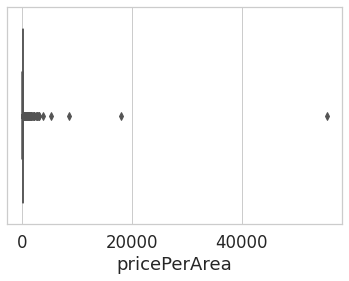

In [ ]:
sns.boxplot(x=result['pricePerArea'][result['type']=='căn hộ, chung cư'])

In [ ]:
Q1 = result['pricePerArea'][result['type']=='căn hộ, chung cư'].quantile(0.25)
Q3 = result['pricePerArea'][result['type']=='căn hộ, chung cư'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
result.drop(result[result['type']=='căn hộ, chung cư'][(result['pricePerArea'] < (Q1 - 1.5 * IQR))| (result['pricePerArea'] > (Q3 + 1.5 * IQR))].index, inplace=True)
result.reset_index(drop=True, inplace=True)

36.860520094562645


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
result['type'].unique()

array(['căn hộ, chung cư', 'nhà mặt phố',
       'biệt thự, liền kề ', 'hẻm'], dtype=object)

In [ ]:
Q1 = result['pricePerArea'][result['type']=='nhà mặt phố'].quantile(0.25)
Q3 = result['pricePerArea'][result['type']=='nhà mặt phố'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
result.drop(result[result['type']=='nhà mặt phố'][(result['pricePerArea'] < (Q1 - 1.5 * IQR))| (result['pricePerArea'] > (Q3 + 1.5 * IQR))].index, inplace=True)
result.reset_index(drop=True, inplace=True)

Q1 = result['pricePerArea'][result['type']=='biệt thự, liền kề '].quantile(0.25)
Q3 = result['pricePerArea'][result['type']=='biệt thự, liền kề '].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
result.drop(result[result['type']=='biệt thự, liền kề '][(result['pricePerArea'] < (Q1 - 1.5 * IQR))| (result['pricePerArea'] > (Q3 + 1.5 * IQR))].index, inplace=True)
result.reset_index(drop=True, inplace=True)

Q1 = result['pricePerArea'][result['type']=='hẻm'].quantile(0.25)
Q3 = result['pricePerArea'][result['type']=='hẻm'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
result[result['type']=='hẻm'][(result['pricePerArea'] < (Q1 - 1.5 * IQR))| (result['pricePerArea'] > (Q3 + 1.5 * IQR))]
result.drop(result[result['type']=='hẻm'][(result['pricePerArea'] < (Q1 - 1.5 * IQR))].index, inplace=True)
result.reset_index(drop=True, inplace=True)

79.35242839352429
77.36097620203982


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


39.0625


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
result['type'].unique()

array(['căn hộ, chung cư', 'nhà mặt phố',
       'biệt thự, liền kề ', 'đất', 'hẻm'], dtype=object)

In [ ]:
result['floor'][result['type']=='căn hộ, chung cư'].unique()

array([   0,   10,   20,    5,    6,    1,   17,   13,    4,    9,   19,
         18,    3,   16,    7,    2,    8,   11,   25,   21,   23,   34,
         15,   14,   12,   31,   26,   35,   38,   24,   30,   22,   40,
         32,   28,   27,   29,   43,   44,   37,   33,   39,   42,   45,
         36,  123,   50,  103,   47,   41,  678,  225,   48,  956,  806,
       1810,  100,   72,   54, 1106,  915,  815,  204,  306,   70,  150,
         52,  633, 2601,   46,   82,  155,   90, 1406], dtype=int32)

In [ ]:
result['floor'][result['type']=='căn hộ, chung cư']=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
result['floor'].value_counts()

5      60613
0      58203
1      55660
4      47187
3      14660
       ...  
40         1
422        1
37         1
36         1
30         1
Name: floor, Length: 62, dtype: int64

In [ ]:
i = 0
for idx in result[(result['floor']>6) | (result['floor']==0)].index:
    item = item = str(result['description'][idx]).lower()+" "+str(result['title'][idx]).lower()
    match = re.search('(\d+\s*?(tầng|tang)\W)',item) # viet sai 230t (230 ty), doi dien toa nha 108 tang,...
    if match:
        result['floor'][idx]=int(re.search('\d+',match.group()).group())
        i+=1
        # print(match.group(),'----',int(re.search('\d+',match.group()).group()))
        continue
    else:
        # print(result['description'][idx].lower())
        pass
i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


57457

In [ ]:
result['floor'].unique()

array([   1,    4,    3,    9,    6,    8,    2,    0,    5,    7,   27,
         10,   22,   12,   26,   11,   43,   68,   15,   72, 1804,   56,
         13,   50,   21,   45,   35,   30,   34,   39,   25,   40,  312,
         20,   16,   14,   44,  100,   23,  427,   33,   54,   36,   19,
         65,   17,   18,  108,   29,   38,   61,   75], dtype=int32)

In [ ]:
result[(result['floor']>10) & (result['price']<2000)]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year,pricePerArea
137,30.0,0.0,+ Dự án NOXH IEC Thanh Trì với tổng di...,"đông, bắc",thanh trì,NaN,27,1560.0,tứ hiệp,2020-02-12 05:05:55+00:00,"KIOT, SHOP HOUSE DỰ ÁN NOXH IEC TỨ HIỆP...",0.0,"biệt thự, liền kề",tứ hiệp,batdongsan321.com,2.0,2020,52.000000
36163,240.0,10.0,"diện tích 240m2 x 11 tầng, mặt tiền 1...",None,hà đông,NaN,11,440.0,phùng hưng,2020-08-23 00:00:00+00:00,"nhà phùng hưng 240m2x11t, mt 12m 112 pn. th...",6.0,nhà mặt phố,phú la,chotot.com,8.0,2020,1.833333
54138,190.0,12.0,"['Bán tòa nhà mặt phố Bà Triệu, Phư...",None,hai bà trưng,NaN,12,500.0,bà triệu,2020-02-21 00:00:00+00:00,Bán tòa nhà 12 tầng mặt phố Bà Triẹ...,12.0,nhà mặt phố,bùi thị xuân,abz,2.0,2020,2.631579
54578,200.0,0.0,['Quỹ căn biệt thự 200m cho nhà đầu t...,None,đan phượng,NaN,13,300.0,32,2019-06-18 00:00:00+00:00,Quỹ căn biệt thự 200m cho nhà đầu tư...,0.0,"biệt thự, liền kề",đan phượng,abz,6.0,2019,1.500000
56343,300.0,0.0,['Chính chủ bán gấp căn biệt thự hư...,None,đan phượng,NaN,13,300.0,32,2019-06-21 00:00:00+00:00,chính chủ bán gấp căn biệt thự hươ...,0.0,"biệt thự, liền kề",đan phượng,abz,6.0,2019,1.000000
66487,71.0,3.0,"['Chung cư TSG Lotus Sài Đồng, Giá 23.5tr...",None,long biên,NaN,25,1668.5,5,2019-07-05 00:00:00+00:00,Nhận đặt chỗ chung cư TSG Lotus Sài Đo...,0.0,"biệt thự, liền kề",sài đồng,abz,7.0,2019,23.500000
93669,212.0,20.0,['- Vị trí gần TTTM Vincom Bà Triệu va...,None,hai bà trưng,16m,11,1000.0,thái phiên,2020-09-25 00:00:00+00:00,"Bán nhà mặt phố Cổ, kinh doanh sầm u...",0.0,nhà mặt phố,lê đại hành,alonhadat,9.0,2020,4.716981
106272,93.0,2.0,['- Đổi nhà to hơn cần bán lại căn ho...,None,hà đông,8m,14,1750.0,quang trung,2020-08-31 00:00:00+00:00,"Bán Căn hộ tại phố Quang Trung, Hà Đô...",0.0,hẻm,quang trung,alonhadat,8.0,2020,18.817204
153356,250.0,50.0,"['+ Khách sạn gồm 50 phòng, mặt tiền ...",None,hoàn kiếm,10m,11,850.0,hàng buồm,2020-09-25 00:00:00+00:00,"CHỦ NHỜ BÁN KHÁCH SẠN 250M2, MẶT PHỐ...",0.0,nhà mặt phố,hàng bồ,alonhadat,9.0,2020,3.400000
158447,62.0,2.0,"['Bán căn hộ hộ 62m2, 2PN ngay Vinhomes ...",None,hà đông,50m,35,1240.0,lê trọng tấn,2020-09-17 00:00:00+00:00,"Bán căn hộ hộ 62m2, 2PN ngay Vinhomes Sm...",0.0,hẻm,dương nội,alonhadat,9.0,2020,20.000000


In [ ]:
import random as rd
result['floor'][(result['floor']>10) & (result['price']<2000)] = rd.randint(2,5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
result[(result['floor']>10)]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year,pricePerArea
2639,80.0,3.0,Căn 2 phòng ngủ siêu đẹp và thoáng toà...,"đông, nam",gia lâm,NaN,22,2600.0,a,2019-09-18 07:34:56+00:00,BÁN CĂN 2 PN +1TÒA S1.09 VIEW SÔNG THOÁNG...,2.0,"biệt thự, liền kề",đa tốn,batdongsan321.com,9.0,2019,32.500000
5738,180.0,0.0,Bán nhà mặt phố Triệu Việt Vương: ...,None,hai bà trưng,NaN,12,125000.0,triệu việt vương,2020-07-26 08:45:11+00:00,Bán nhà mặt phố Triệu Việt Vương: ...,0.0,nhà mặt phố,NaN,batdongsan321.com,7.0,2020,694.444444
8463,67.2,0.0,Do cần xoay vòng vốn nên tôi bán gấp...,None,hoàng mai,6 m,26,10500.0,định công,2020-09-24 00:00:00+00:00,Cần tiền bán gấp shophouse SH 06 T&T Co...,0.0,"biệt thự, liền kề",định công,dothi,9.0,2020,156.250000
8471,206.0,54.0,Cần bán khách sạn 3 sao phố Cửa Bắc...,None,ba đình,7 m,11,98000.0,cửa bắc,2020-09-24 00:00:00+00:00,"Bán nhà mặt phố Cửa Bắc, khách sạn...",0.0,nhà mặt phố,trúc bạch,dothi,9.0,2020,475.728155
9935,60.0,10.0,+ nhà nằm trên mặt phố nguyễn hoàng...,None,nam từ liêm,NaN,11,18200.0,nguyễn hoàng,2020-08-27 00:00:00+00:00,"mặt phố nguyễn hoàng, mặt tiền rộ...",6.0,nhà mặt phố,mỹ đình 1,chotot.com,8.0,2020,303.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257377,220.0,0.0,"Cần bán nhà mặt Hồ Trúc Bạch, Ba Đì...",None,ba đình,NaN,11,88000.0,trúc bạch,2020-09-26 00:00:00+00:00,"Bán nhà mặt Hồ Trúc Bạch, Ba Đình, di...",0.0,nhà mặt phố,trúc bạch,muaban,9.0,2020,400.000000
257384,170.0,0.0,"+ 46.5 tỷ khách sạn 11 tầng Đống Đa, 40...",None,đống đa,NaN,11,46500.0,láng,2020-09-25 00:00:00+00:00,"46 tỷ KS 11 tầng Đống Đa, 40 phòng, 170m...",0.0,nhà mặt phố,láng thượng,muaban,9.0,2020,273.529412
257546,206.0,0.0,"Mô tả:\nDiện tích 205,88m2 X11 tầng Gia...",None,ba đình,NaN,11,98000.0,cửa bắc,2020-09-26 00:00:00+00:00,"Siêu Hiếm MP Hàng Than,11t 2 thang máy,mt...",0.0,nhà mặt phố,liễu giai,muaban,9.0,2020,475.728155
259981,160.0,0.0,Bán biệt thự Hateco Apollo Xuân Phương...,nam,nam từ liêm,NaN,25,17000.0,trần hữu dực,2020-09-14 00:00:00+00:00,Còn duy nhất 5 căn biệt thự đẹp long...,0.0,"biệt thự, liền kề",xuân phương,rongbay,9.0,2020,106.250000


In [ ]:
##############################

In [ ]:
result['floor'][(result['floor']>=10) & (result['pricePerArea']<100)] =1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
result[(result['floor']>=50) & (result['pricePerArea']<500)]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year,pricePerArea
19351,29.0,4.0,"bán nhà phố văn cao , 2 mặt ngõ có th...",None,ba đình,NaN,68,3150.0,văn cao,2020-08-19 00:00:00+00:00,"bán nhà phố văn cao, phường liễu gia...",3.0,nhà mặt phố,liễu giai,chotot.com,8.0,2020,108.620690
32839,28.0,1.0,"bán nhà ô tô đỗ cửa, mặt tiền kinh...",None,ba đình,NaN,68,3400.0,lý thường kiệt,2020-08-20 00:00:00+00:00,"bán nhà ngõ 409 kim mã, ô tô đỗ cửa,...",1.0,nhà mặt phố,ngọc khánh,chotot.com,8.0,2020,121.428571
43452,180.0,3.0,biệt thự kđt nam cường dien tích 1804t...,"nam, tây",hà đông,NaN,1804,30000.0,tố hữu||1896,2020-09-05 00:00:00+00:00,biệt thự kđt nam cường 1804lau đang kí...,3.0,"biệt thự, liền kề",dương nội,chotot.com,9.0,2020,166.666667
44411,41.0,5.0,"nhà mặt phố đình thôn, kinh doanh, ô t...",None,nam từ liêm,NaN,56,9550.0,đình thôn,2020-09-18 00:00:00+00:00,"nhà mặt phố đình thôn, kinh doanh, ô t...",0.0,nhà mặt phố,mỹ đình 1,chotot.com,9.0,2020,232.926829
47690,46.0,5.0,"* nhà trần phú – hà đông, diện tích ...",None,hà đông,NaN,50,4950.0,trần phú,2020-09-06 00:00:00+00:00,"bán nhà lô góc, thông số đẹp, mặt ti...",4.0,nhà mặt phố,mộ lao,chotot.com,9.0,2020,107.608696
185453,57.0,0.0,"['Thông tin mô tả', 'Bán shophouse liền ...",None,hoàng mai,NaN,65,14000.0,nguyễn xiển,2020-09-21 00:00:00+00:00,Bán shophouse The Manor Nguyễn Xiển chiê...,0.0,"biệt thự, liền kề",đại kim,batdongsan,9.0,2020,245.614035
192634,57.0,0.0,"['Thông tin mô tả', 'Dự án The Manor Cen...",None,hoàng mai,NaN,65,15000.0,nguyễn xiển,2020-09-22 00:00:00+00:00,096 1010 665 bán BT The Manor Central Park 75...,0.0,"biệt thự, liền kề",đại kim,batdongsan,9.0,2020,263.157895
198923,57.0,0.0,"['Thông tin mô tả', 'Bán shophouse liền ...",None,hoàng mai,NaN,65,17000.0,nguyễn xiển,2020-09-25 00:00:00+00:00,Bán shophouse The Manor Nguyễn Xiển chiê...,0.0,"biệt thự, liền kề",đại kim,batdongsan,9.0,2020,298.245614
202095,57.0,0.0,"['Thông tin mô tả', 'Bán shophouse liền ...",None,hoàng mai,NaN,65,16000.0,nguyễn xiển,2020-09-22 00:00:00+00:00,Bán shophouse The Manor Nguyễn Xiển chiê...,0.0,"biệt thự, liền kề",đại kim,batdongsan,9.0,2020,280.701754
205707,57.0,0.0,"['Thông tin mô tả', 'Dự án The Manor Cen...",None,hoàng mai,NaN,65,17500.0,nguyễn xiển,2020-09-26 00:00:00+00:00,0961010665 cần bán căn shophouse 99m2 The ...,0.0,"biệt thự, liền kề",đại kim,batdongsan,9.0,2020,307.017544


In [ ]:
import random
result['floor'][(result['floor']>=50) & (result['pricePerArea']<500)] = random.randint(3,5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for idx in result['floor'][(result['floor']>=20)].index:
    print(result['description'][idx])

Do cần xoay vòng vốn nên tôi bán gấp căn shophouse SH06 dự án T&T Complex 120 Định Công.
Dự án gồm 32 lô SH mà 1 tòa chung cư cao 26 tầng, tiếp giáp với đường 2.5 giao với đường Định Công (đường 2.5 đã Giải Phóng mặt bằng đoạn từ sông ra đường Kim Đồng).
DT 67.2m2 mặt tiền 6m xây thô hoàn thiện mặt ngoài (đã nhận bàn giao) mặt hướng vào chung cư và gần ngã 4 đường 2.5, vỉa hè rộng 5m, khoảng cách đến chung cư 30m rất tốt để kinh doanh và đầu tư.
Giá 10,5 tỷ bao phí sang tên.
Anh chị nào có nhu cầu liên hệ: 0916045581.

biệt thự lâu đài phố the jade orchid là dự án biệt thự thương mại  trong lòng khu đô thị xanh cổ nhuế - chèm.

vị trí xây dựng: the jade orchid nằm trên mặt đường nguyễn đình tứ tiếp giáp đường phạm văn đồng, kết nối đường vành đai 3, đường hoàng quốc việt, dẫn ra khu vực phía

In [ ]:
result['floor'][(result['floor']>=20)] = random.randint(3,5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
result['floor'].value_counts()

5     84373
4     63721
1     57789
0     33622
3     19751
6     13562
2      6157
7      5155
8      2121
9      1051
10      468
11      105
12       34
13        6
15        6
14        5
16        2
19        1
Name: floor, dtype: int64

In [ ]:
result.drop(result[(result['floor']==0) | (result['floor']>10)].index, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
result['pricePerArea'].max(), result['pricePerArea'].min()

(55555.555555555555, 3.0)

In [ ]:
result[result['pricePerArea']<10]

,area,bedroom,description,direction,district,facade,floor,price,street,time,title,toilet,type,ward,web,month,year,pricePerArea
136,62.0,2.0,Bán Nhà phố Ngọc Lâm\nmặt ngõ to như...,None,long biên,5.0,1,204.6,long biên,2020-02-12 08:40:06+00:00,Bán nhà phố ngọc lâm. Nhà mặt ngõ to...,1.0,nhà mặt phố,long biên,batdongsan321.com,2,2020,3.300000
144,80.0,6.0,Bán nhà phố Ngọc thụy. mặt ngõ ô tô...,None,long biên,5.0,5,544.0,long biên,2020-02-12 04:36:08+00:00,"Bán nhà phố Ngọc thụy,mặt ngõ ô tô ...",5.0,nhà mặt phố,long biên,batdongsan321.com,2,2020,6.800000
177,54.0,0.0,"Bán shop kinh doanh, ki ốt, shophouse chân...",None,nam từ liêm,5.0,1,324.0,đại lộ thăng long,2020-02-09 07:50:26+00:00,[Lê Thương] Bán shop kinh doanh chân đế...,0.0,"căn hộ, chung cư",tây mỗ,batdongsan321.com,2,2020,6.000000
387,83.0,3.0,"Chung cư Le Grand Jardin NO15, NO16 Sài Đồ...",nam,long biên,NaN,1,249.0,5,2020-01-07 05:11:41+00:00,Bán căn hộ chung cư cao cấp Le Grand Ja...,2.0,"căn hộ, chung cư",long biên,batdongsan321.com,1,2020,3.000000
567,108.0,3.0,Chính thức mở bán chung cư cao cấp Mi...,None,cầu giấy,NaN,1,432.0,xuân thủy,2019-12-27 08:11:53+00:00,Mở bán căn hộ chung cư cao cấp Mipec ...,2.0,"căn hộ, chung cư",xuân thủy,batdongsan321.com,12,2019,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253317,80.0,2.0,CHỈ 435 TRIỆU (30%) SỞ HỮU NGAY CĂN HO...,None,hoàng mai,NaN,1,430.0,trần thủ độ,2020-08-09 00:00:00+00:00,Chỉ 430 triệu sở hữu ngay căn hộ sie...,0.0,"căn hộ, chung cư",NaN,rongbay,8,2020,5.375000
253321,83.0,2.0,Chủ đầu tư thông báo căn cuối cùng đ...,None,cầu giấy,NaN,1,373.5,cầu giấy,2020-08-09 00:00:00+00:00,Căn ngoại giao mipec rubik 360 nhận thô g...,0.0,"căn hộ, chung cư",xuân thủy,rongbay,8,2020,4.500000
253322,83.0,2.0,"Cần bán căn hộ tại D. A Mipec Rubik360,...",None,cầu giấy,NaN,1,373.5,cầu giấy,2020-08-09 00:00:00+00:00,Mua nhà trúng ô tô MEC E200 tại dự án ...,0.0,"căn hộ, chung cư",xuân thủy,rongbay,8,2020,4.500000
253506,59.0,0.0,KHÔNG LO TÀI CHÍNH - XÚNG XÍNH NHẬN NHA...,None,thạch thất,NaN,1,180.0,đại lộ thăng long,2020-07-09 00:00:00+00:00,Không lo tài chính - Xúng xính nhận nha...,0.0,"căn hộ, chung cư",thạch hòa,rongbay,7,2020,3.050847


In [ ]:
result['description'][177]

'Bán shop kinh doanh, ki ốt, shophouse chân đế tầng 1, 2 chung cư dự án Vinhomes Smart City.\nHiện tại em đang 1 số lô shop vị trí đẹp, mặt đường, mặt sảnh tòa S1.05, S1.06, S2.01, S1.01, S2.05. S2.03\nS1.05 - 09 - 66.9m2 (shop 2 tầng): Giá gốc 6,4 tỷ.\nS1.05 - 10 - 35m2 (shop 1 tầng): Giá gốc 2,25 tỷ.\nS1.05 - 08A - 84m2 (shop 2 tầng: Giá gốc 7.7 tỷ.\nS1.06 03 - 54m2 (shop 2 tầng): Giá gốc 6.2 tỷ.\nS1.06 12 - 54m2 (shop 2 tầng): Giá gốc 5 tỷ.\nS2.01 -17 - 43m2: Giá gốc 2.76 tỷ.\nS2.01 - 15A - 54m2: Giá gốc 5.46 tỷ.\nNgoài ra còn rất nhiều lô shop view nội khu, view đẹp thuận tiện kinh doanh.\n'

In [ ]:
remove_idx = []
patt = unicodedata.normalize("NFD",'(\d+(\.|,){0,1}\d*\s*(tỷ|tỉ|tr|triệu)/{0})')
ty = []
for i in ['tỷ', 'tỉ']:
    ty.append(unicodedata.normalize("NFD",i))
for idx in result[(result['pricePerArea']<10)].index:
    item = str(result['title'][idx]).lower()+" "+result['description'][idx].lower()
    item = unicodedata.normalize("NFD", item)
    match = re.search(patt,item)
    
    if match:
        price = 0
        if (ty[0] in match.group()) or (ty[1] in match.group()):
            price = float(re.search('\d+(\.|,)*\d*', match.group()).group().replace(",",".").strip())*1000
        else:
            price = float(re.search('\d+(\.|,)*\d*', match.group()).group().replace(",",".").strip())
        print(idx, match.group(), price)

        result['price'][idx] = price
    else:
        remove_idx.append(idx)
# result.drop(index=remove_idx, inplace=True)
# result.reset_index(drop=True, inplace=True)

In [ ]:
result['pricePerArea'][result['pricePerArea']<10] = result['price']/result['area']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
result[result['pricePerArea']<20]

In [ ]:
result.groupby(['month','type']).size().unstack()

type,"biệt thự, liền kề","căn hộ, chung cư",hẻm,nhà mặt phố,đất
month,,,,,
1,206,830,217,1328,122
2,168,749,372,1417,134
3,249,1251,421,1800,141
4,189,1159,379,1912,161
5,297,1164,428,2289,174
6,958,4024,609,10241,672
7,473,1746,2063,4505,716
8,1695,8700,11044,16583,1994
9,7827,24357,61736,49458,5092


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243788 entries, 0 to 243787
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          243788 non-null  float64
 1   bedroom       243788 non-null  float64
 2   description   243788 non-null  object 
 3   direction     19640 non-null   object 
 4   district      243787 non-null  object 
 5   facade        110999 non-null  object 
 6   floor         243788 non-null  int32  
 7   price         243788 non-null  float64
 8   street        242476 non-null  object 
 9   time          243788 non-null  object 
 10  title         243788 non-null  object 
 11  toilet        243788 non-null  float64
 12  type          243788 non-null  object 
 13  ward          231061 non-null  object 
 14  web           243788 non-null  object 
 15  month         243788 non-null  int32  
 16  year          243788 non-null  int32  
 17  pricePerArea  243788 non-null  float64
dtypes: f

In [ ]:
result.drop(result[result['district'].isnull()].index, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
remove_idx = []
for idx, item in result['ward'].items():
    if item not in address[result['district'][idx]]['ward']:
        text = result['title'][idx].lower()+" . "+ result['description'][idx].lower()
        check = True
        for ward in address[result['district'][idx]]['ward']:
            if ward in text:
                result['ward'][idx] = ward 
                check = False
                break
        if check:
            remove_idx.append(idx)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
len(remove_idx)

14157

In [ ]:
result.drop(index=remove_idx, inplace=True)
result.reset_index(drop=True, inplace=True)

In [ ]:
result = pd.read_csv("../Clean1/resu.csv", encoding='utf8')

In [ ]:
result['time'] = pd.to_datetime(result['time'], infer_datetime_format=True)


In [ ]:
result['quarter'] = result['time'].dt.to_period('Q').dt.quarter

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
result.to_csv("../Clean1/resultFinall.csv", encoding='utf-8', index=False)

In [ ]:
result['bedroom'].unique()

array([3.00e+00, 0.00e+00, 4.00e+00, 2.00e+00, 1.00e+01, 5.00e+00,
       8.00e+00, 6.00e+00, 1.00e+00, 2.00e+01, 7.00e+00, 9.00e+00,
       1.20e+01, 1.10e+01, 1.80e+01, 2.10e+01, 1.60e+01, 6.50e+01,
       3.60e+01, 1.30e+01, 1.40e+01, 1.50e+01, 3.00e+01, 9.10e+01,
       1.70e+01, 2.80e+01, 5.00e+01, 2.90e+01, 4.50e+01, 2.20e+01,
       2.70e+01, 4.00e+01, 3.40e+01, 3.20e+01, 1.90e+01, 5.80e+01,
       3.50e+01, 1.45e+02, 2.40e+01, 3.70e+01, 6.75e+02, 1.90e+02,
       2.50e+01, 4.40e+01, 4.20e+01, 2.30e+01, 3.30e+01, 1.12e+02,
       5.20e+01, 2.60e+01, 1.22e+02, 6.00e+01, 3.90e+01, 3.80e+01,
       1.00e+02, 4.30e+01, 4.37e+02, 1.05e+02, 4.80e+01, 4.60e+01,
       5.50e+01, 5.60e+01, 4.15e+03, 3.10e+01, 9.60e+01, 8.60e+01,
       6.20e+01, 6.70e+01, 3.00e+02, 1.20e+02, 1.09e+02, 4.66e+02,
       8.50e+01, 6.30e+01, 4.10e+01, 5.90e+01, 1.01e+02, 1.60e+02,
       5.40e+01, 2.88e+02, 2.16e+02, 2.15e+02])

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229630 entries, 0 to 229629
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   area          229630 non-null  float64            
 1   bedroom       229630 non-null  float64            
 2   description   229630 non-null  object             
 3   direction     18870 non-null   object             
 4   district      229630 non-null  object             
 5   facade        108956 non-null  object             
 6   floor         229630 non-null  int32              
 7   price         229630 non-null  float64            
 8   street        229104 non-null  object             
 9   time          229630 non-null  datetime64[ns, UTC]
 10  title         229630 non-null  object             
 11  toilet        229630 non-null  float64            
 12  type          229630 non-null  object             
 13  ward          229630 non-null  object       

In [ ]:
result['quarter'].unique()

array([1, 3, 4, 2])

In [ ]:
result.to_csv("../Clean1/resultFinall.csv", encoding='utf-8', index=False)

In [ ]:
result['year'].value_counts()

2020    198992
2019     15571
2018     15067
Name: year, dtype: int64

## Model

In [ ]:
address1 = json.load(open("../../address.txt","r", encoding="utf8"))
address = dict()
for district in address1.keys():
    address[unicodedata.normalize("NFD",district)]=dict()
    for key in address1[district].keys():
        address[unicodedata.normalize("NFD",district)][unicodedata.normalize("NFD",key)]=[unicodedata.normalize("NFD",item) for item in address1[district][key]]

address['thanh oai']['ward'].append(unicodedata.normalize("NFD","thụy khuê"))
address['hoàn kiếm']['street'].append(unicodedata.normalize("NFD","láng"))
address['đống đa']['street'].append(unicodedata.normalize("NFD","nguyễn huy tưởng"))
address['hà đông']['ward'].append(unicodedata.normalize("NFD","mỗ lao"))
address['hai bà trưng']['ward'].append(unicodedata.normalize("NFD","vân hồ 3"))

for district in address.keys():
    district = unicodedata.normalize("NFD",district)
    for key in address[district].keys():
        key = unicodedata.normalize("NFD",key)
        address[district][key] = {unicodedata.normalize("NFD",value) for value in address[district][key]}

In [ ]:
data = pd.read_csv("../Clean1/resultFinall.csv", encoding='utf8')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229630 entries, 0 to 229629
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          229630 non-null  float64
 1   bedroom       229630 non-null  float64
 2   description   229630 non-null  object 
 3   direction     18870 non-null   object 
 4   district      229630 non-null  object 
 5   facade        108956 non-null  object 
 6   floor         229630 non-null  int64  
 7   price         229630 non-null  float64
 8   street        229104 non-null  object 
 9   time          229630 non-null  object 
 10  title         229629 non-null  object 
 11  toilet        229630 non-null  float64
 12  type          229630 non-null  object 
 13  ward          229630 non-null  object 
 14  web           229630 non-null  object 
 15  month         229630 non-null  int64  
 16  year          229630 non-null  int64  
 17  pricePerArea  229630 non-null  float64
 18  quar

In [ ]:
data['title'].fillna("", inplace=True)
data['description'].fillna("", inplace=True)

In [ ]:
data['title'] = data['title'].str.normalize("NFD")
data['description'] = data['description'].str.normalize("NFD")
data['street'] = data['street'].str.normalize("NFD")
data['ward'] = data['ward'].str.normalize("NFD")
data['district'] = data['district'].str.normalize("NFD")
data['type'] = data['type'].str.normalize("NFD")

In [ ]:
data.drop(data[data['year']!=2020].index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data['quarter'].value_counts()

3    185542
2      6956
1      4596
4      1898
Name: quarter, dtype: int64

In [ ]:
data['type'].value_counts()

hẻm                          76155
nhà mặt phố              71080
căn hộ, chung cư          34496
biệt thự, liền kề      9688
đất                          7573
Name: type, dtype: int64

In [ ]:
data['district'].value_counts()

đống đa           28361
thanh xuân         28066
hoàng mai          23376
hà đông           20852
hai bà trưng      19224
cầu giấy        18765
long biên          13543
ba đình            11236
nam từ liêm      10978
tây hồ            9027
bắc từ liêm     6410
thanh trì           3275
hoài đức          1729
gia lâm             1694
hoàn kiếm         1160
đông anh             585
chương mỹ          120
đan phượng         119
sóc sơn             103
thanh oai              95
quốc oai             60
mê linh               60
thạch thất          51
sơn tây              43
thường tín         41
ba vì                  8
phú xuyên             5
phúc thọ              4
ứng hòa              2
Name: district, dtype: int64

In [ ]:
data['district'].value_counts().keys()[:6]

Index(['đống đa', 'thanh xuân', 'hoàng mai', 'hà đông', 'hai bà trưng',
       'cầu giấy'],
      dtype='object')

In [ ]:
data = data[data['district'].isin(['đống đa', 'thanh xuân', 'hoàng mai', 'cầu giấy', 'hà đông',
       'hai bà trưng'
    #    , 'ba đình', 'long biên', 'nam từ liêm',
    #    'tây hồ', 'bắc từ liêm'
       ])]

In [ ]:
data['district'].value_counts()

đống đa         28361
thanh xuân       28066
hoàng mai        23376
hà đông         20852
hai bà trưng    19224
cầu giấy      18765
Name: district, dtype: int64

In [ ]:
sum_wards = 0
for district in data['district'].unique():
    sum_wards += len(address[district]['ward'])
sum_wards
# co tong 156 phuong thuoc 6 quan

97

In [ ]:
remove_idx = []
for idx, item in data['ward'].items():
    if item not in address[data['district'][idx]]['ward']:
        text = data['title'][idx].lower()+" . "+ data['description'][idx].lower()
        check = True
        for ward in address[data['district'][idx]]['ward']:
            if ward in text:
                data['ward'][idx] = ward 
                check = False
                break
        if check:
            remove_idx.append(idx)

In [ ]:
len(remove_idx)

0

In [ ]:
data.drop(index=remove_idx, inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data2 = data.copy()

In [ ]:
data = data2.copy()

In [ ]:
data.drop(data[(data['pricePerArea']<10)].index, inplace=True)

In [ ]:
data.drop(data[(data['pricePerArea']>1000) & (data['floor']<4)].index, inplace=True)

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data['description'][122936]

'- Lý do: Chủ nhà mua nhà mặt phố cần bán bán nhà Chính Kinh 38m2 5 tầng\n- Đường trước nhà 2 xe tránh nhau,cách 100m ra phố chính Kinh.\n- Phố Chính Kinh thông ra Nguyễn Trãi, Quan Nhân, gần trường Đại học Đại Nam, Tiểu học Nhân Chính, THCS Phan Đình Giót, lại ngay gần trung tâm thương mại Royal City, gần chợ thuận tiện cho việc sinh hoạt của các gia đình.\n- Khu dân trí cao, an ninh đảm bảo\nThiết kế:\n+ T1 chỗ để xe, 1 phòng ngủ,\n+ T2:2 phòng WC chung\n+ T3:2 phòng WC riêng\n+ T4 :2 phòng WC riêng\n+ T5 : 2 phòng WC chung\n+ Tum: bếp và sân phơi\nSổ đỏ chính chủ, pháp lý rõ ràng\nGiá: 3.4 tỷ\n( hỗ trợ tư vấn xem nhà 24/24)\n( miễn trung gian)'

In [ ]:
data.groupby(['district','quarter']).size().unstack()

quarter,1,2,3,4
district,,,,
cầu giấy,397,585,17560,180
hai bà trưng,467,785,17762,199
hà đông,392,381,19905,130
hoàng mai,465,905,21694,279
thanh xuân,547,1054,26206,248
đống đa,735,1277,26018,310


In [ ]:
data.groupby(['type','quarter','district']).size().unstack()

district                            cầu giấy  ...  đống đa
type                       quarter                ...           
biệt thự, liền kề  1                  10  ...         17
                           2                  31  ...         44
                           3                 729  ...        544
                           4                   3  ...         11
căn hộ, chung cư       1                 103  ...         54
                           2                 100  ...         99
                           3                2423  ...       1567
                           4                  37  ...         14
hẻm                       1                  42  ...        154
                           2                  71  ...        229
                           3                7372  ...      13384
                           4                  45  ...         92
nhà mặt phố           1                 219  ...        483
                           2                 357  ...        855
                           3                6378  ...       9710
                           4                  84  ...        183
đất                      1                  23  ...         27
                           2                  26  ...         50
                           3                 658  ...        813
                           4                  11  ...         10

[20 rows x 6 columns]

In [ ]:
data.groupby("district")['pricePerArea'].describe()

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
cầu giấy,18722.0,122.540989,65.789814,10.0,81.578947,110.000000,162.500000,1444.444444
hai bà trưng,19213.0,103.154124,61.666825,10.0,70.000000,90.000000,118.750000,2900.000000
hà đông,20808.0,76.702531,61.588311,10.0,40.625000,70.937500,100.000000,2550.000000
hoàng mai,23343.0,79.780871,51.028794,10.0,58.532999,75.581395,95.000000,2500.000000
thanh xuân,28055.0,99.698177,57.620173,10.0,73.000000,91.228070,116.129032,2450.000000
đống đa,28340.0,124.043636,70.364349,10.0,85.294118,107.142857,151.111111,2800.000000


In [ ]:
data = data[['area','month','price','quarter','type','district','ward','floor','pricePerArea']]

In [ ]:
data['type'].unique()

array(['biệt thự, liền kề ', 'nhà mặt phố',
       'căn hộ, chung cư', 'đất', 'hẻm'], dtype=object)

In [ ]:
data.drop(data[data['type']=='đất'].index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133524 entries, 0 to 133523
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          133524 non-null  float64
 1   month         133524 non-null  int64  
 2   price         133524 non-null  float64
 3   quarter       133524 non-null  int64  
 4   type          133524 non-null  object 
 5   district      133524 non-null  object 
 6   ward          133524 non-null  object 
 7   floor         133524 non-null  int64  
 8   pricePerArea  133524 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 9.2+ MB


In [ ]:
# cols = ['pricePerArea','quarter','district','area','type']
# sns.pairplot(data[cols], size = 4)

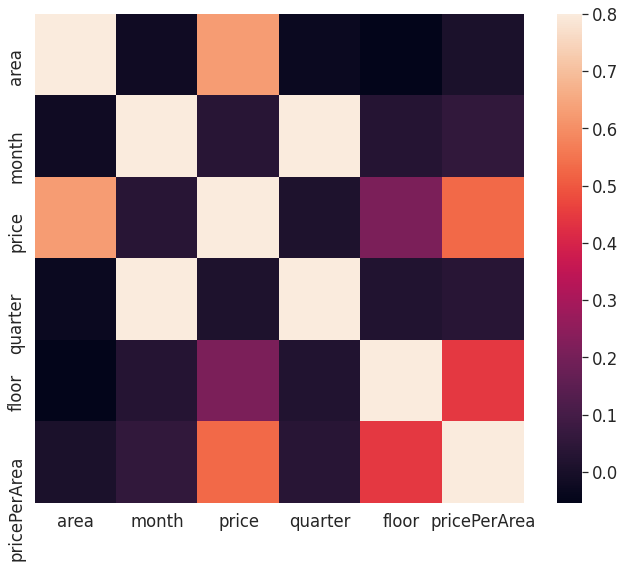

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

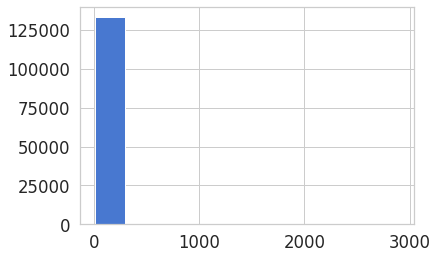

In [ ]:
data['pricePerArea'].hist()

In [ ]:
data['type'].unique()

array(['biệt thự, liền kề ', 'nhà mặt phố',
       'căn hộ, chung cư', 'hẻm'], dtype=object)

In [ ]:
data.drop(data[data['ward'].isnull()].index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data['district'].unique()

array(['hà đông', 'thanh xuân', 'hoàng mai', 'cầu giấy',
       'đống đa', 'hai bà trưng'], dtype=object)

In [ ]:
wards_of_districts = []
for district in data['district'].unique():
    wards_of_districts.append(set(data['ward'][data['district']==district].unique()))

In [ ]:
sum_wards = 0
unique_wards = set()
list_wards = []
for wards in wards_of_districts:
    print(len(wards))
    unique_wards.update(wards)
    sum_wards+=len(wards)
    list_wards.extend(list(wards))
print(sum_wards, len(unique_wards), list_wards)

18
13
14
10
21
21
97 95 ['mộ lao', 'đồng mai', 'mỗ lao', 'kiến hưng', 'văn quán', 'phú la', 'vạn phúc', 'biên giang', 'quang trung', 'phú lãm', 'yên nghĩa', 'yết kiêu', 'dương nội', 'phú lương', 'la khê', 'phúc la', 'hà cầu', 'nguyễn trãi', 'phương liệt', 'hạ đình', 'thượng đình', 'khương trung', 'khương mai', 'thanh xuân bắc', 'thanh xuân nam', 'khương đình', 'khương hạ', 'kim giang', 'thanh xuân trung', 'nhân chính', 'phương mai', 'đại kim', 'vĩnh hưng', 'trần phú', 'tân mai', 'lĩnh nam', 'tương mai', 'định công', 'thanh trì', 'thịnh liệt', 'giáp bát', 'mai động', 'hoàng liệt', 'yên sở', 'hoàng văn thụ', 'yên hòa', 'quan hoa', 'pháo đài láng', 'dịch vọng', 'trung hòa', 'xuân thủy', 'mai dịch', 'nghĩa đô', 'dịch vọng hậu', 'nghĩa tân', 'láng thượng', 'quang trung', 'văn chương', 'văn miếu', 'cát linh', 'phương mai', 'thổ quan', 'nam đồng', 'trung phụng', 

In [ ]:
for district in data['district'].unique():
    print(district, len(address[district]['ward']))

hà đông 18
thanh xuân 13
hoàng mai 14
cầu giấy 10
đống đa 21
hai bà trưng 21


In [ ]:
df = pd.DataFrame({'ward':list_wards})
df.value_counts()

ward             
phương mai         2
quang trung          2
đống mác          1
mộ lao             1
la khê              1
                    ..
thanh xuân trung    1
thịnh liệt        1
thịnh quang         1
thổ quan           1
bách khoa           1
Length: 95, dtype: int64

In [ ]:
data['district'][data['ward']=='minh khai'].unique()

array(['hai bà trưng'], dtype=object)

In [ ]:
list_ward_district = []
for district in data['district'].unique():
    for ward in address[district]['ward']:
        list_ward_district.append(ward.strip()+", "+district.strip()) # chuan hoa ddeer deex trong qua trinh test thuwr vi du
len(list_ward_district)#, list_ward_district

97

In [ ]:
dict_type = dict(zip(list(data['type'].unique()), [i for i in range(1, len(data['type'].unique())+1)]))
dict_district = dict(zip(list(data['district'].unique()), [i for i in range(1, len(data['district'].unique())+1)]))
dict_ward = dict(zip(list_ward_district, [i for i in range(1, len(list_ward_district)+1)]))

In [ ]:
dict_type

{'biệt thự, liền kề ': 1,
 'căn hộ, chung cư': 3,
 'hẻm': 4,
 'nhà mặt phố': 2}

In [ ]:
data['ward, district'] = None
data['En_district'] = None

for idx in range(len(data)):
    try:
        data['En_district'][idx] = dict_district[data['district'][idx]]
        data['type'][idx] = dict_type[data['type'][idx]]
        data['ward, district'][idx] = dict_ward[data['ward'][idx].strip()+", "+data['district'][idx].strip()]
    except:
        print(data['ward'][idx].strip()+", "+data['district'][idx].strip())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data['ward, district'].unique()

array([14, 25, 10, 34, 17, 38, 50, 63, 70, 36, 3, 97, 28, 18, 83, 7, 4,
       68, 53, 16, 51, 56, 5, 41, 1, 54, 43, 74, 55, 49, 87, 21, 23, 35,
       29, 65, 76, 27, 24, 39, 48, 11, 75, 45, 31, 67, 15, 32, 88, 33, 26,
       19, 96, 78, 69, 52, 42, 86, 60, 66, 22, 2, 77, 58, 81, 30, 73, 71,
       46, 44, 93, 62, 59, 8, 64, 20, 85, 80, 57, 13, 37, 72, 12, 95, 89,
       92, 9, 84, 40, 94, 82, 90, 61, 6, 79, 91, 47], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from joblib import dump, load
import random as rd
np.random.seed(40)

In [ ]:
data1 = data.copy()

In [ ]:
data = data1.copy()

In [ ]:
data = data[(data['month']==9)]

In [ ]:
data.to_csv("dataPredict.csv", encoding='utf8', sep=',', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96479 entries, 9 to 133685
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            96479 non-null  float64
 1   month           96479 non-null  int64  
 2   price           96479 non-null  float64
 3   quarter         96479 non-null  int64  
 4   type            96479 non-null  object 
 5   district        96479 non-null  object 
 6   ward            96479 non-null  object 
 7   toilet          96479 non-null  float64
 8   bedroom         96479 non-null  float64
 9   floor           96479 non-null  int64  
 10  pricePerArea    96479 non-null  float64
 11  ward, district  96479 non-null  object 
 12  En_district     96479 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 10.3+ MB


In [ ]:
data.groupby('type').size()

type
1     4434
2    34000
3    12260
4    45679
dtype: int64

In [ ]:
def split_train_test(Xy, test_size=0.2):
    list_data_train, list_data_test = list(), list()

    for i, (_, values) in enumerate(Xy.groupby(['type',"ward, district"])):
        n_rows = len(values)
        
        n_data_test = int(n_rows*test_size)
        if n_data_test > 0:
            row = np.zeros(n_rows, dtype='bool')
            row[np.random.choice(n_rows, size=n_data_test, replace=False).astype('int64')] = True
            list_data_test.append(values[row])
            list_data_train.append(values[np.logical_not(row)])

    data_train = pd.concat(list_data_train)
    data_test = pd.concat(list_data_test)
    return data_train, data_test

data_train, data_test = split_train_test(data[['type', 'area','En_district', 'ward, district', 'floor', 'pricePerArea']])

X_train, X_test, y_train, y_test = data_train.iloc[:, :-1], data_test.iloc[:, :-1], data_train.iloc[:, -1], data_test.iloc[:, -1]
X_train = pd.get_dummies(X_train, columns=['type','En_district','ward, district'])
X_test = pd.get_dummies(X_test, columns=['type','En_district','ward, district'])
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

print(X_train.shape, X_test.shape , y_train.shape, y_test.shape)
reg = LinearRegression(normalize=True) #  If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.
reg.fit(X_train, y_train)

(77216, 108) (19114, 108) (77216,) (19114,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
y_pred = reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 31.703820229994662
Mean Squared Error: 3140.4913675621137
Root Mean Squared Error: 56.04008714805959


In [ ]:
# reg.coef_

In [ ]:
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

,Actual,Predicted
0,104.444444,115.677734
1,94.047619,138.677734
2,228.070175,141.927734
3,203.508772,130.427734
4,110.526316,141.927734
...,...,...
19109,70.000000,90.896484
19110,125.000000,102.599609
19111,56.666667,79.458984
19112,98.750000,102.552734


In [ ]:
dump(reg, '../reg.joblib')

['../reg.joblib']

In [ ]:
reg = load('../reg.joblib')

In [ ]:
dict_type

{'biệt thự, liền kề ': 1,
 'căn hộ, chung cư': 3,
 'hẻm': 4,
 'nhà mặt phố': 2}

In [ ]:
def input_pred():
    house = np.ones(data_train.shape[1])
    type_house = int(input("""Loai bat dong san : \n
                            1. biệt thự, liền kề  \n
                            2. nhà mặt phố\n
                            3. căn hộ, chung cư\n
                            4. hẻm\n """))
    area = float(input("Dien tich(m2): "))
    floor = int(input("So tang: "))
    district = int(input("""Quận/huyện/thị xã:\n
                        1. hà đông\n
                        2. thanh xuân\n
                        3. hoàng mai\n
                        4. cầu giấy\n
                        5. đống đa\n
                        6. hai bà trưng\n"""))
    district_name = None
    for dis in dict_district.keys():
        if dict_district[dis] == district:
            district_name = dis
            break
    ward = unicodedata.normalize("NFD", input("Phường/xã/thị trấn: "+str(address[district_name]['ward'])+"\n").strip())

    ward_district = dict_ward[ward+", "+district_name]

    data_test1 = data_test.copy()
    df = pd.DataFrame([[type_house, area, district, ward_district, floor]], columns = ['type','area','En_district', 'ward, district', 'floor'])
    data_test_df = data_test1.iloc[:, :-1].append(df, ignore_index=True)

    en_data_test_df = pd.get_dummies(data_test_df, columns=['type','En_district','ward, district'])
    test = en_data_test_df.iloc[-1, :].values

    print("Price: "+str(reg.predict(test.reshape(1, -1))[0]*area))
input_pred()

Loai bat dong san : 

                            1. biệt thự, liền kề  

                            2. nhà mặt phố

                            3. căn hộ, chung cư

                            4. hẻm
 1
Dien tich(m2): 30
So tang: 5
quận/huyện/thị xã:

                        1. hà đông

                        2. thanh xuân

                        3. hoàng mai

                        4. cầu giấy

                        5. đống đa

                        6. hai bà trưng
3
phường/xã/thị trấn: {'giáp bát', 'tương mai', 'đại kim', 'lĩnh nam', 'định công', 'mai động', 'tân mai', 'thanh trì', 'trần phú', 'yên sở', 'hoàng liệt', 'thịnh liệt', 'hoàng văn thụ', 'vĩnh hưng'}
giáp bát
Price: 4012.5


################################################################################################

In [ ]:
s = pd.Series([2, 1, 4, 3, 3, 2])
pd.get_dummies(s)

,1,2,3,4
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
5,0,1,0,0
